In [77]:
import numpy as np
import matplotlib.pyplot as plt
def get_spiral():
    # Idea: radius -> low...high
    #           (don't start at 0, otherwise points will be "mushed" at origin)
    #       angle = low...high proportional to radius
    #               [0, 2pi/6, 4pi/6, ..., 10pi/6] --> [pi/2, pi/3 + pi/2, ..., ]
    # x = rcos(theta), y = rsin(theta) as usual

    radius = np.linspace(1, 10, 100)
    thetas = np.empty((6, 100))
    for i in range(6):
        start_angle = np.pi*i / 3.0
        end_angle = start_angle + np.pi / 2
        points = np.linspace(start_angle, end_angle, 100)
        thetas[i] = points

    # convert into cartesian coordinates
    x1 = np.empty((6, 100))
    x2 = np.empty((6, 100))
    for i in range(6):
        x1[i] = radius * np.cos(thetas[i])
        x2[i] = radius * np.sin(thetas[i])

    # inputs
    X = np.empty((600, 2))
    X[:,0] = x1.flatten()
    X[:,1] = x2.flatten()

    # add noise
    X += np.random.randn(600, 2)*0.5

    # targets
    Y = np.array([0]*100 + [1]*100 + [0]*100 + [1]*100 + [0]*100 + [1]*100)
    return X, Y

In [78]:
X,y=get_spiral()

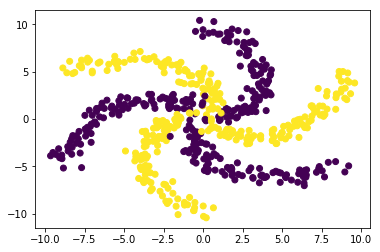

In [79]:
plt.scatter(X[:,0],X[:,1],c=y)

In [80]:
import theano
from theano import tensor as T

In [81]:
def one_hot_encoder(X):
    N=X.shape[0]
    K=len(np.unique(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=X[i]
        Z[i,c]=1
    return Z
    

In [82]:
y_i=one_hot_encoder(y)

In [83]:
N,D=X.shape
K=y_i.shape[1]
M=20

In [84]:
thX=T.matrix('X')
thY=T.matrix('y')
def init_weights(shape,stddev=0.01):
    return np.random.randn(shape[0],shape[1])*stddev
W1_init=init_weights([D,M],stddev=np.sqrt(D))
W2_init=init_weights([M,K],stddev=np.sqrt(M))
b1_init=init_weights([1,M]).reshape(M,)
b2_init=init_weights([1,K]).reshape(K,)

In [85]:
W1=theano.shared(W1_init,'W1')
W2=theano.shared(W2_init,'W2')
b1=theano.shared(b1_init,'b1')
b2=theano.shared(b2_init,'b2')

In [86]:
def forward(X,W1,b1,W2,b2):
    z=T.nnet.relu(X.dot(W1)+b1)
    return T.nnet.softmax(z.dot(W2)+b2)
y_p=forward(thX,W1,b1,W2,b2)
lr=0.01

In [87]:
cost=-(thY*T.log(y_p)).mean()
W1_up=W1-lr*T.grad(cost,W1)
b1_up=b1-lr*T.grad(cost,b1)
W2_up=W2-lr*T.grad(cost,W2)
b2_up=b2-lr*T.grad(cost,b2)

In [88]:
train=theano.function(inputs=[thX,thY],updates=[(W1,W1_up),(b1,b1_up),(W2,W2_up),(b2,b2_up)])

In [89]:
pred=T.argmax(y_p,axis=1)
get_pred=theano.function(inputs=[thX,thY],outputs=[cost,pred])

In [90]:
c=
for i in range(100000):
    train(X,y_i)
    c, pred = get_pred(X, y_i)
    print('Epoch {2} Cost {0} ClassRate {1}'.format(c,np.mean(y==pred),i))

Epoch 0 Cost 23.273927116633242 ClassRate 0.5233333333333333
Epoch 1 Cost 21.315138918943788 ClassRate 0.525
Epoch 2 Cost 19.361945999976363 ClassRate 0.5283333333333333
Epoch 3 Cost 17.43018307243178 ClassRate 0.5416666666666666
Epoch 4 Cost 15.559618068495444 ClassRate 0.555
Epoch 5 Cost 13.753900499223194 ClassRate 0.555
Epoch 6 Cost 12.001232442245733 ClassRate 0.5533333333333333
Epoch 7 Cost 10.312422410402023 ClassRate 0.555
Epoch 8 Cost 8.683631873195345 ClassRate 0.54
Epoch 9 Cost 7.154123648089862 ClassRate 0.535
Epoch 10 Cost 5.680025625137915 ClassRate 0.5333333333333333
Epoch 11 Cost 4.3513527609087355 ClassRate 0.5316666666666666
Epoch 12 Cost 3.228627430953075 ClassRate 0.555
Epoch 13 Cost 2.718963720527322 ClassRate 0.595
Epoch 14 Cost 2.3211962346730455 ClassRate 0.495
Epoch 15 Cost 2.151530033481723 ClassRate 0.58
Epoch 16 Cost 1.9373753234686353 ClassRate 0.49
Epoch 17 Cost 1.8332853253989625 ClassRate 0.57
Epoch 18 Cost 1.733068180312162 ClassRate 0.48833333333333334

Epoch 253 Cost 0.8372024744154852 ClassRate 0.565
Epoch 254 Cost 0.7262947074512353 ClassRate 0.515
Epoch 255 Cost 0.835933018022383 ClassRate 0.565
Epoch 256 Cost 0.7246918886141605 ClassRate 0.5133333333333333
Epoch 257 Cost 0.8349984366572973 ClassRate 0.5666666666666667
Epoch 258 Cost 0.7227910296245623 ClassRate 0.5133333333333333
Epoch 259 Cost 0.8336949194670142 ClassRate 0.5666666666666667
Epoch 260 Cost 0.7203796877551987 ClassRate 0.5116666666666667
Epoch 261 Cost 0.8322926033519722 ClassRate 0.5666666666666667
Epoch 262 Cost 0.7186272910800762 ClassRate 0.5133333333333333
Epoch 263 Cost 0.8306034866146816 ClassRate 0.5666666666666667
Epoch 264 Cost 0.7171876793601567 ClassRate 0.5133333333333333
Epoch 265 Cost 0.8296807087110646 ClassRate 0.57
Epoch 266 Cost 0.7153282561714625 ClassRate 0.5116666666666667
Epoch 267 Cost 0.8281584380659514 ClassRate 0.57
Epoch 268 Cost 0.7135558010936448 ClassRate 0.515
Epoch 269 Cost 0.8269664056566044 ClassRate 0.57
Epoch 270 Cost 0.7119426

Epoch 511 Cost 0.6653131293589386 ClassRate 0.595
Epoch 512 Cost 0.598062696386753 ClassRate 0.5366666666666666
Epoch 513 Cost 0.6649783152336359 ClassRate 0.595
Epoch 514 Cost 0.596720456351409 ClassRate 0.5383333333333333
Epoch 515 Cost 0.6636750208990628 ClassRate 0.595
Epoch 516 Cost 0.5949145694387298 ClassRate 0.54
Epoch 517 Cost 0.6626228064019367 ClassRate 0.5933333333333334
Epoch 518 Cost 0.5939828120904338 ClassRate 0.54
Epoch 519 Cost 0.6613777715765004 ClassRate 0.5916666666666667
Epoch 520 Cost 0.592176822478212 ClassRate 0.5433333333333333
Epoch 521 Cost 0.6605553457580298 ClassRate 0.595
Epoch 522 Cost 0.5913496811751867 ClassRate 0.5433333333333333
Epoch 523 Cost 0.6604545423028112 ClassRate 0.5916666666666667
Epoch 524 Cost 0.5902156583428386 ClassRate 0.5433333333333333
Epoch 525 Cost 0.6591194436268476 ClassRate 0.5816666666666667
Epoch 526 Cost 0.5897967147805516 ClassRate 0.555
Epoch 527 Cost 0.6595619203943233 ClassRate 0.58
Epoch 528 Cost 0.5901327590533286 Class

Epoch 782 Cost 0.5289667716788808 ClassRate 0.615
Epoch 783 Cost 0.5352557967334531 ClassRate 0.575
Epoch 784 Cost 0.5289399400752299 ClassRate 0.615
Epoch 785 Cost 0.5359218053591698 ClassRate 0.5733333333333334
Epoch 786 Cost 0.5288422793918897 ClassRate 0.615
Epoch 787 Cost 0.5348636682469965 ClassRate 0.575
Epoch 788 Cost 0.5277558163700121 ClassRate 0.6166666666666667
Epoch 789 Cost 0.5341520037335646 ClassRate 0.575
Epoch 790 Cost 0.5272922655840279 ClassRate 0.6166666666666667
Epoch 791 Cost 0.5332925156869678 ClassRate 0.575
Epoch 792 Cost 0.5265939704247056 ClassRate 0.6166666666666667
Epoch 793 Cost 0.5332363813288739 ClassRate 0.575
Epoch 794 Cost 0.5264510516120974 ClassRate 0.6166666666666667
Epoch 795 Cost 0.5335301419401834 ClassRate 0.575
Epoch 796 Cost 0.5258541263515885 ClassRate 0.6183333333333333
Epoch 797 Cost 0.5325409510309395 ClassRate 0.575
Epoch 798 Cost 0.5253357451629312 ClassRate 0.6183333333333333
Epoch 799 Cost 0.5311421436277427 ClassRate 0.575
Epoch 800

Epoch 1017 Cost 0.47324481505920296 ClassRate 0.59
Epoch 1018 Cost 0.46917026014956975 ClassRate 0.63
Epoch 1019 Cost 0.4732259397763684 ClassRate 0.5916666666666667
Epoch 1020 Cost 0.46841683362047765 ClassRate 0.63
Epoch 1021 Cost 0.47254812804231466 ClassRate 0.5916666666666667
Epoch 1022 Cost 0.46739010401327863 ClassRate 0.63
Epoch 1023 Cost 0.47217212682051485 ClassRate 0.5916666666666667
Epoch 1024 Cost 0.4668452209164266 ClassRate 0.63
Epoch 1025 Cost 0.4721074874275912 ClassRate 0.5916666666666667
Epoch 1026 Cost 0.4668108064117313 ClassRate 0.63
Epoch 1027 Cost 0.4720372051651657 ClassRate 0.5916666666666667
Epoch 1028 Cost 0.46616037658243054 ClassRate 0.63
Epoch 1029 Cost 0.47119132094840827 ClassRate 0.5916666666666667
Epoch 1030 Cost 0.4651939397716247 ClassRate 0.63
Epoch 1031 Cost 0.47071787573755436 ClassRate 0.5916666666666667
Epoch 1032 Cost 0.46475597835462007 ClassRate 0.63
Epoch 1033 Cost 0.4704594389260608 ClassRate 0.5916666666666667
Epoch 1034 Cost 0.4647509338

Epoch 1201 Cost 0.36787899629426735 ClassRate 0.6866666666666666
Epoch 1202 Cost 0.4732833906646904 ClassRate 0.6383333333333333
Epoch 1203 Cost 0.36751460385707396 ClassRate 0.6866666666666666
Epoch 1204 Cost 0.4732836389577969 ClassRate 0.6383333333333333
Epoch 1205 Cost 0.3674776552164403 ClassRate 0.6866666666666666
Epoch 1206 Cost 0.4723868724537253 ClassRate 0.6383333333333333
Epoch 1207 Cost 0.36717287908863644 ClassRate 0.6866666666666666
Epoch 1208 Cost 0.47221276152117136 ClassRate 0.6383333333333333
Epoch 1209 Cost 0.3672263983082939 ClassRate 0.6866666666666666
Epoch 1210 Cost 0.4723251051505657 ClassRate 0.6383333333333333
Epoch 1211 Cost 0.3668990305217055 ClassRate 0.6883333333333334
Epoch 1212 Cost 0.4714837240298275 ClassRate 0.6383333333333333
Epoch 1213 Cost 0.3667093479561712 ClassRate 0.6883333333333334
Epoch 1214 Cost 0.4703609266323749 ClassRate 0.64
Epoch 1215 Cost 0.3662534900661761 ClassRate 0.6866666666666666
Epoch 1216 Cost 0.4699905531907311 ClassRate 0.641

Epoch 1405 Cost 0.34842581227554376 ClassRate 0.695
Epoch 1406 Cost 0.43164473849998947 ClassRate 0.6766666666666666
Epoch 1407 Cost 0.34802907419971457 ClassRate 0.695
Epoch 1408 Cost 0.4305454034136132 ClassRate 0.6766666666666666
Epoch 1409 Cost 0.34756599822900286 ClassRate 0.6966666666666667
Epoch 1410 Cost 0.42987156194466297 ClassRate 0.6783333333333333
Epoch 1411 Cost 0.34709884529735113 ClassRate 0.6966666666666667
Epoch 1412 Cost 0.4290736052056974 ClassRate 0.6783333333333333
Epoch 1413 Cost 0.3468326447967629 ClassRate 0.6966666666666667
Epoch 1414 Cost 0.428859692651268 ClassRate 0.6783333333333333
Epoch 1415 Cost 0.34643576301650697 ClassRate 0.6966666666666667
Epoch 1416 Cost 0.4283462444904225 ClassRate 0.6783333333333333
Epoch 1417 Cost 0.3460996933404299 ClassRate 0.6983333333333334
Epoch 1418 Cost 0.4277860146533571 ClassRate 0.6783333333333333
Epoch 1419 Cost 0.34602682153178116 ClassRate 0.6966666666666667
Epoch 1420 Cost 0.42758679350159556 ClassRate 0.67833333333

Epoch 1601 Cost 0.32214572326351626 ClassRate 0.7033333333333334
Epoch 1602 Cost 0.39413050977470593 ClassRate 0.6983333333333334
Epoch 1603 Cost 0.3219766867264444 ClassRate 0.7033333333333334
Epoch 1604 Cost 0.39367944411631606 ClassRate 0.7016666666666667
Epoch 1605 Cost 0.32160036416093885 ClassRate 0.7033333333333334
Epoch 1606 Cost 0.3933076011098764 ClassRate 0.7016666666666667
Epoch 1607 Cost 0.3213943798803658 ClassRate 0.705
Epoch 1608 Cost 0.39293772195229976 ClassRate 0.7016666666666667
Epoch 1609 Cost 0.3210420007475103 ClassRate 0.705
Epoch 1610 Cost 0.3926157957829311 ClassRate 0.7016666666666667
Epoch 1611 Cost 0.3209501585183008 ClassRate 0.705
Epoch 1612 Cost 0.3921612059037734 ClassRate 0.7016666666666667
Epoch 1613 Cost 0.32073153890015105 ClassRate 0.7066666666666667
Epoch 1614 Cost 0.3920270190405826 ClassRate 0.7016666666666667
Epoch 1615 Cost 0.3206032668803537 ClassRate 0.7066666666666667
Epoch 1616 Cost 0.3914829574496327 ClassRate 0.7033333333333334
Epoch 161

Epoch 1756 Cost 0.3638129027725175 ClassRate 0.7183333333333334
Epoch 1757 Cost 0.3066411236437343 ClassRate 0.715
Epoch 1758 Cost 0.3633716357698242 ClassRate 0.7183333333333334
Epoch 1759 Cost 0.30640191168138825 ClassRate 0.715
Epoch 1760 Cost 0.36315435942536894 ClassRate 0.7183333333333334
Epoch 1761 Cost 0.3061569612655124 ClassRate 0.715
Epoch 1762 Cost 0.3628413855010078 ClassRate 0.7183333333333334
Epoch 1763 Cost 0.305944668792793 ClassRate 0.715
Epoch 1764 Cost 0.36255819009862406 ClassRate 0.7183333333333334
Epoch 1765 Cost 0.3057829815211579 ClassRate 0.715
Epoch 1766 Cost 0.3622460730937915 ClassRate 0.72
Epoch 1767 Cost 0.30552586286365796 ClassRate 0.715
Epoch 1768 Cost 0.3618752925364052 ClassRate 0.72
Epoch 1769 Cost 0.3053208553502281 ClassRate 0.715
Epoch 1770 Cost 0.3615800796953344 ClassRate 0.7216666666666667
Epoch 1771 Cost 0.3050468183741628 ClassRate 0.715
Epoch 1772 Cost 0.36136068280738265 ClassRate 0.72
Epoch 1773 Cost 0.3054941327254002 ClassRate 0.715
Epo

Epoch 1961 Cost 0.287967433273853 ClassRate 0.74
Epoch 1962 Cost 0.33155849398939435 ClassRate 0.7466666666666667
Epoch 1963 Cost 0.28761351060457785 ClassRate 0.74
Epoch 1964 Cost 0.33096753955222735 ClassRate 0.7466666666666667
Epoch 1965 Cost 0.2872631281484583 ClassRate 0.7433333333333333
Epoch 1966 Cost 0.33036842409911854 ClassRate 0.7466666666666667
Epoch 1967 Cost 0.2875292999465471 ClassRate 0.7433333333333333
Epoch 1968 Cost 0.33081014849148666 ClassRate 0.7466666666666667
Epoch 1969 Cost 0.28706667417780113 ClassRate 0.7433333333333333
Epoch 1970 Cost 0.3305261581000144 ClassRate 0.7466666666666667
Epoch 1971 Cost 0.2866522970398334 ClassRate 0.7433333333333333
Epoch 1972 Cost 0.3302680015389713 ClassRate 0.7466666666666667
Epoch 1973 Cost 0.28692851376217593 ClassRate 0.7433333333333333
Epoch 1974 Cost 0.33030762089186144 ClassRate 0.7466666666666667
Epoch 1975 Cost 0.28624327560950447 ClassRate 0.7433333333333333
Epoch 1976 Cost 0.3298150935760143 ClassRate 0.7466666666666

Epoch 2163 Cost 0.27178225721579036 ClassRate 0.76
Epoch 2164 Cost 0.3045016281809581 ClassRate 0.77
Epoch 2165 Cost 0.2720359033713772 ClassRate 0.76
Epoch 2166 Cost 0.30458114088121585 ClassRate 0.77
Epoch 2167 Cost 0.27213164378161603 ClassRate 0.76
Epoch 2168 Cost 0.3046449236420929 ClassRate 0.7666666666666667
Epoch 2169 Cost 0.2721403139135165 ClassRate 0.76
Epoch 2170 Cost 0.30460630523348814 ClassRate 0.7683333333333333
Epoch 2171 Cost 0.2720077781968088 ClassRate 0.76
Epoch 2172 Cost 0.3046724479889207 ClassRate 0.7683333333333333
Epoch 2173 Cost 0.27174384710576843 ClassRate 0.7583333333333333
Epoch 2174 Cost 0.3045059594011523 ClassRate 0.7683333333333333
Epoch 2175 Cost 0.27144846179438853 ClassRate 0.7583333333333333
Epoch 2176 Cost 0.304548490966371 ClassRate 0.7683333333333333
Epoch 2177 Cost 0.2711482787641528 ClassRate 0.7583333333333333
Epoch 2178 Cost 0.3044321637678659 ClassRate 0.7683333333333333
Epoch 2179 Cost 0.27072907856142236 ClassRate 0.76
Epoch 2180 Cost 0.

Epoch 2367 Cost 0.2596921498736338 ClassRate 0.7833333333333333
Epoch 2368 Cost 0.2892693236700382 ClassRate 0.785
Epoch 2369 Cost 0.25486192684837666 ClassRate 0.7883333333333333
Epoch 2370 Cost 0.2858758042241568 ClassRate 0.7866666666666666
Epoch 2371 Cost 0.25203328852822937 ClassRate 0.7966666666666666
Epoch 2372 Cost 0.28284648339844437 ClassRate 0.7883333333333333
Epoch 2373 Cost 0.2505597263092339 ClassRate 0.7983333333333333
Epoch 2374 Cost 0.2801689406331419 ClassRate 0.7933333333333333
Epoch 2375 Cost 0.24995665862684324 ClassRate 0.7983333333333333
Epoch 2376 Cost 0.2777712964344276 ClassRate 0.7966666666666666
Epoch 2377 Cost 0.24987042085251773 ClassRate 0.7966666666666666
Epoch 2378 Cost 0.27545503456507375 ClassRate 0.7966666666666666
Epoch 2379 Cost 0.2502273477653269 ClassRate 0.795
Epoch 2380 Cost 0.27359827324520575 ClassRate 0.7983333333333333
Epoch 2381 Cost 0.25107291687993266 ClassRate 0.7966666666666666
Epoch 2382 Cost 0.2722873280652767 ClassRate 0.79833333333

Epoch 2570 Cost 0.27188739169862736 ClassRate 0.7983333333333333
Epoch 2571 Cost 0.25105953534768316 ClassRate 0.8066666666666666
Epoch 2572 Cost 0.2639884231546796 ClassRate 0.805
Epoch 2573 Cost 0.24051503854541068 ClassRate 0.8116666666666666
Epoch 2574 Cost 0.2572195857280729 ClassRate 0.8083333333333333
Epoch 2575 Cost 0.23424932984564284 ClassRate 0.8183333333333334
Epoch 2576 Cost 0.25186781046599055 ClassRate 0.8083333333333333
Epoch 2577 Cost 0.23084410546464607 ClassRate 0.82
Epoch 2578 Cost 0.2478197964690241 ClassRate 0.8116666666666666
Epoch 2579 Cost 0.22884319462916347 ClassRate 0.8216666666666667
Epoch 2580 Cost 0.24467786700190033 ClassRate 0.8183333333333334
Epoch 2581 Cost 0.22780104891325223 ClassRate 0.8233333333333334
Epoch 2582 Cost 0.24244511051139492 ClassRate 0.82
Epoch 2583 Cost 0.22764923668838316 ClassRate 0.825
Epoch 2584 Cost 0.2412270356179111 ClassRate 0.82
Epoch 2585 Cost 0.22843039517198965 ClassRate 0.825
Epoch 2586 Cost 0.24111695065333735 ClassRate

Epoch 2795 Cost 0.24190209661793485 ClassRate 0.8066666666666666
Epoch 2796 Cost 0.2708844269542996 ClassRate 0.7966666666666666
Epoch 2797 Cost 0.2475802335040349 ClassRate 0.7933333333333333
Epoch 2798 Cost 0.27859961223880525 ClassRate 0.7866666666666666
Epoch 2799 Cost 0.25536835584023626 ClassRate 0.7833333333333333
Epoch 2800 Cost 0.2877854990488924 ClassRate 0.7766666666666666
Epoch 2801 Cost 0.2643413948701522 ClassRate 0.7616666666666667
Epoch 2802 Cost 0.2980022604571538 ClassRate 0.76
Epoch 2803 Cost 0.2747432097853005 ClassRate 0.7516666666666667
Epoch 2804 Cost 0.3076097518321596 ClassRate 0.7533333333333333
Epoch 2805 Cost 0.2857369372315465 ClassRate 0.7433333333333333
Epoch 2806 Cost 0.3152916460338055 ClassRate 0.7466666666666667
Epoch 2807 Cost 0.2966104409277475 ClassRate 0.735
Epoch 2808 Cost 0.3203075193437076 ClassRate 0.7483333333333333
Epoch 2809 Cost 0.3062027034624407 ClassRate 0.725
Epoch 2810 Cost 0.32221235756052563 ClassRate 0.7383333333333333
Epoch 2811 C

Epoch 3008 Cost 0.21723892768042527 ClassRate 0.8366666666666667
Epoch 3009 Cost 0.2159433116963688 ClassRate 0.8516666666666667
Epoch 3010 Cost 0.2114280222908195 ClassRate 0.8366666666666667
Epoch 3011 Cost 0.20974822213390432 ClassRate 0.8516666666666667
Epoch 3012 Cost 0.20837798790121284 ClassRate 0.8333333333333334
Epoch 3013 Cost 0.20644210882565106 ClassRate 0.855
Epoch 3014 Cost 0.20784553604074318 ClassRate 0.84
Epoch 3015 Cost 0.20538042722898148 ClassRate 0.855
Epoch 3016 Cost 0.2090824565495426 ClassRate 0.8416666666666667
Epoch 3017 Cost 0.20570833091006235 ClassRate 0.85
Epoch 3018 Cost 0.2115209692458767 ClassRate 0.84
Epoch 3019 Cost 0.2069835703773933 ClassRate 0.8516666666666667
Epoch 3020 Cost 0.21486092200498072 ClassRate 0.8383333333333334
Epoch 3021 Cost 0.20890252314121477 ClassRate 0.845
Epoch 3022 Cost 0.21869997603616573 ClassRate 0.8333333333333334
Epoch 3023 Cost 0.21120095726434296 ClassRate 0.8383333333333334
Epoch 3024 Cost 0.22274123066677223 ClassRate 

Epoch 3203 Cost 0.22304185504068438 ClassRate 0.835
Epoch 3204 Cost 0.22998560900087706 ClassRate 0.8233333333333334
Epoch 3205 Cost 0.2219803209152472 ClassRate 0.8366666666666667
Epoch 3206 Cost 0.22862502015037772 ClassRate 0.825
Epoch 3207 Cost 0.22180733795806687 ClassRate 0.8383333333333334
Epoch 3208 Cost 0.22823122001029494 ClassRate 0.825
Epoch 3209 Cost 0.22245814618197599 ClassRate 0.8366666666666667
Epoch 3210 Cost 0.228646022083095 ClassRate 0.8266666666666667
Epoch 3211 Cost 0.2238169488210383 ClassRate 0.835
Epoch 3212 Cost 0.22980240130783833 ClassRate 0.8216666666666667
Epoch 3213 Cost 0.2258088583756933 ClassRate 0.8316666666666667
Epoch 3214 Cost 0.23162472012115462 ClassRate 0.8183333333333334
Epoch 3215 Cost 0.22834887844483787 ClassRate 0.83
Epoch 3216 Cost 0.23402863573801966 ClassRate 0.82
Epoch 3217 Cost 0.2313140488283388 ClassRate 0.825
Epoch 3218 Cost 0.2369062453633934 ClassRate 0.82
Epoch 3219 Cost 0.23448654626539214 ClassRate 0.8216666666666667
Epoch 322

Epoch 3493 Cost 0.20655984105695097 ClassRate 0.8533333333333334
Epoch 3494 Cost 0.21025090244503292 ClassRate 0.8466666666666667
Epoch 3495 Cost 0.2069588662253555 ClassRate 0.8516666666666667
Epoch 3496 Cost 0.2105784002829165 ClassRate 0.845
Epoch 3497 Cost 0.20812182875749582 ClassRate 0.8516666666666667
Epoch 3498 Cost 0.2117332177522024 ClassRate 0.845
Epoch 3499 Cost 0.2098901670259789 ClassRate 0.8533333333333334
Epoch 3500 Cost 0.21353696622741727 ClassRate 0.8416666666666667
Epoch 3501 Cost 0.212160337239227 ClassRate 0.85
Epoch 3502 Cost 0.2158940971977842 ClassRate 0.84
Epoch 3503 Cost 0.2149062747621495 ClassRate 0.85
Epoch 3504 Cost 0.21869176901726253 ClassRate 0.8383333333333334
Epoch 3505 Cost 0.2179602497544167 ClassRate 0.8483333333333334
Epoch 3506 Cost 0.2217658625959958 ClassRate 0.835
Epoch 3507 Cost 0.22106154718875345 ClassRate 0.8416666666666667
Epoch 3508 Cost 0.2244594304346417 ClassRate 0.8333333333333334
Epoch 3509 Cost 0.22391678295787007 ClassRate 0.8383

Epoch 3705 Cost 0.21803961134598585 ClassRate 0.8433333333333334
Epoch 3706 Cost 0.22560086188255282 ClassRate 0.8316666666666667
Epoch 3707 Cost 0.21948757561459128 ClassRate 0.84
Epoch 3708 Cost 0.22773800860476612 ClassRate 0.8316666666666667
Epoch 3709 Cost 0.22100994493969078 ClassRate 0.8333333333333334
Epoch 3710 Cost 0.2300816862032432 ClassRate 0.8316666666666667
Epoch 3711 Cost 0.2225786314937315 ClassRate 0.83
Epoch 3712 Cost 0.23260881261661234 ClassRate 0.8283333333333334
Epoch 3713 Cost 0.22419981222645038 ClassRate 0.8283333333333334
Epoch 3714 Cost 0.23530459931889317 ClassRate 0.825
Epoch 3715 Cost 0.2258934074353042 ClassRate 0.8216666666666667
Epoch 3716 Cost 0.23815658062295328 ClassRate 0.8233333333333334
Epoch 3717 Cost 0.22768380679305147 ClassRate 0.815
Epoch 3718 Cost 0.24110406722779895 ClassRate 0.8183333333333334
Epoch 3719 Cost 0.22956117343595228 ClassRate 0.8083333333333333
Epoch 3720 Cost 0.24405540960478553 ClassRate 0.8116666666666666
Epoch 3721 Cost 0

Epoch 3965 Cost 0.21478160577392244 ClassRate 0.8483333333333334
Epoch 3966 Cost 0.22113362137790565 ClassRate 0.835
Epoch 3967 Cost 0.21487378708574723 ClassRate 0.8483333333333334
Epoch 3968 Cost 0.22134993521434812 ClassRate 0.8333333333333334
Epoch 3969 Cost 0.21508306925859016 ClassRate 0.8466666666666667
Epoch 3970 Cost 0.22177002344899227 ClassRate 0.8333333333333334
Epoch 3971 Cost 0.2154212630985748 ClassRate 0.8466666666666667
Epoch 3972 Cost 0.22236530660671364 ClassRate 0.8316666666666667
Epoch 3973 Cost 0.21587807032961748 ClassRate 0.8433333333333334
Epoch 3974 Cost 0.22312632781069727 ClassRate 0.8316666666666667
Epoch 3975 Cost 0.21644191630208354 ClassRate 0.8433333333333334
Epoch 3976 Cost 0.2240117908021343 ClassRate 0.83
Epoch 3977 Cost 0.21707447565008617 ClassRate 0.8416666666666667
Epoch 3978 Cost 0.22501003480636905 ClassRate 0.8266666666666667
Epoch 3979 Cost 0.21778913231098207 ClassRate 0.8383333333333334
Epoch 3980 Cost 0.2260708578029516 ClassRate 0.825
Epo

Epoch 4159 Cost 0.2129848412583061 ClassRate 0.845
Epoch 4160 Cost 0.2167030886108355 ClassRate 0.835
Epoch 4161 Cost 0.21272711609109818 ClassRate 0.8466666666666667
Epoch 4162 Cost 0.2164380219119389 ClassRate 0.835
Epoch 4163 Cost 0.21252456948782275 ClassRate 0.8466666666666667
Epoch 4164 Cost 0.21626522765595274 ClassRate 0.835
Epoch 4165 Cost 0.21239553907264094 ClassRate 0.8466666666666667
Epoch 4166 Cost 0.21617848754479502 ClassRate 0.835
Epoch 4167 Cost 0.21233901036992145 ClassRate 0.8466666666666667
Epoch 4168 Cost 0.21617446874365182 ClassRate 0.835
Epoch 4169 Cost 0.21234276249109457 ClassRate 0.845
Epoch 4170 Cost 0.21626672817775874 ClassRate 0.835
Epoch 4171 Cost 0.21242666327853288 ClassRate 0.845
Epoch 4172 Cost 0.21643675565305762 ClassRate 0.835
Epoch 4173 Cost 0.21256532637693212 ClassRate 0.845
Epoch 4174 Cost 0.2167220268256541 ClassRate 0.835
Epoch 4175 Cost 0.21278083470250775 ClassRate 0.845
Epoch 4176 Cost 0.21740696708070004 ClassRate 0.835
Epoch 4177 Cost 

Epoch 4446 Cost 0.21242470571640457 ClassRate 0.8383333333333334
Epoch 4447 Cost 0.20925388117853752 ClassRate 0.845
Epoch 4448 Cost 0.212254762931777 ClassRate 0.8383333333333334
Epoch 4449 Cost 0.20916045730164248 ClassRate 0.845
Epoch 4450 Cost 0.21218735224231977 ClassRate 0.8383333333333334
Epoch 4451 Cost 0.20911695169844358 ClassRate 0.845
Epoch 4452 Cost 0.2123007353207963 ClassRate 0.8383333333333334
Epoch 4453 Cost 0.2093444282276599 ClassRate 0.845
Epoch 4454 Cost 0.2124089234076285 ClassRate 0.8383333333333334
Epoch 4455 Cost 0.20950916524501997 ClassRate 0.845
Epoch 4456 Cost 0.2124115874740806 ClassRate 0.8383333333333334
Epoch 4457 Cost 0.20952750747537366 ClassRate 0.845
Epoch 4458 Cost 0.2123924460890079 ClassRate 0.8383333333333334
Epoch 4459 Cost 0.2095254695840113 ClassRate 0.845
Epoch 4460 Cost 0.21235112694123823 ClassRate 0.8383333333333334
Epoch 4461 Cost 0.20944278871542027 ClassRate 0.845
Epoch 4462 Cost 0.2122984463167166 ClassRate 0.8383333333333334
Epoch 44

Epoch 4658 Cost 0.21160581543912388 ClassRate 0.84
Epoch 4659 Cost 0.20799142326527909 ClassRate 0.8466666666666667
Epoch 4660 Cost 0.2115736338149376 ClassRate 0.84
Epoch 4661 Cost 0.2079324214958838 ClassRate 0.8466666666666667
Epoch 4662 Cost 0.21156056576474686 ClassRate 0.84
Epoch 4663 Cost 0.20788267984086878 ClassRate 0.8466666666666667
Epoch 4664 Cost 0.2114923540891918 ClassRate 0.84
Epoch 4665 Cost 0.20783176276828116 ClassRate 0.8466666666666667
Epoch 4666 Cost 0.2114618280819021 ClassRate 0.84
Epoch 4667 Cost 0.20774692203830203 ClassRate 0.8483333333333334
Epoch 4668 Cost 0.2116543470285146 ClassRate 0.84
Epoch 4669 Cost 0.20798438905102606 ClassRate 0.8466666666666667
Epoch 4670 Cost 0.21169934927016276 ClassRate 0.84
Epoch 4671 Cost 0.20806271999003803 ClassRate 0.8466666666666667
Epoch 4672 Cost 0.21163464492548692 ClassRate 0.84
Epoch 4673 Cost 0.2080085182575525 ClassRate 0.8466666666666667
Epoch 4674 Cost 0.21155343989605765 ClassRate 0.84
Epoch 4675 Cost 0.207934800

Epoch 4887 Cost 0.20457440309307637 ClassRate 0.8533333333333334
Epoch 4888 Cost 0.2075712034873621 ClassRate 0.8416666666666667
Epoch 4889 Cost 0.20455561980527578 ClassRate 0.8533333333333334
Epoch 4890 Cost 0.20737003393408332 ClassRate 0.8416666666666667
Epoch 4891 Cost 0.20448832588963844 ClassRate 0.8516666666666667
Epoch 4892 Cost 0.2072554695014295 ClassRate 0.8416666666666667
Epoch 4893 Cost 0.20444770507258486 ClassRate 0.8516666666666667
Epoch 4894 Cost 0.20712457851572177 ClassRate 0.8416666666666667
Epoch 4895 Cost 0.2043990334088267 ClassRate 0.85
Epoch 4896 Cost 0.20707624028460297 ClassRate 0.8416666666666667
Epoch 4897 Cost 0.20438653326149114 ClassRate 0.85
Epoch 4898 Cost 0.20701387731142237 ClassRate 0.8416666666666667
Epoch 4899 Cost 0.20434762702946604 ClassRate 0.8516666666666667
Epoch 4900 Cost 0.20723887227012486 ClassRate 0.8416666666666667
Epoch 4901 Cost 0.20458909728060767 ClassRate 0.85
Epoch 4902 Cost 0.20739047077323233 ClassRate 0.8433333333333334
Epoch

Epoch 5153 Cost 0.20090840970277507 ClassRate 0.86
Epoch 5154 Cost 0.20377695502461818 ClassRate 0.85
Epoch 5155 Cost 0.20104135127790962 ClassRate 0.86
Epoch 5156 Cost 0.20399466379522332 ClassRate 0.85
Epoch 5157 Cost 0.20110051527943082 ClassRate 0.8583333333333333
Epoch 5158 Cost 0.20438985017413464 ClassRate 0.8516666666666667
Epoch 5159 Cost 0.2014694036821141 ClassRate 0.8583333333333333
Epoch 5160 Cost 0.20468665224957816 ClassRate 0.85
Epoch 5161 Cost 0.20169257454949224 ClassRate 0.8566666666666667
Epoch 5162 Cost 0.20489235009225837 ClassRate 0.85
Epoch 5163 Cost 0.20179033322125944 ClassRate 0.8566666666666667
Epoch 5164 Cost 0.20499452262922502 ClassRate 0.85
Epoch 5165 Cost 0.20184804225387581 ClassRate 0.8566666666666667
Epoch 5166 Cost 0.2050463930096854 ClassRate 0.85
Epoch 5167 Cost 0.20184566722765 ClassRate 0.8566666666666667
Epoch 5168 Cost 0.20500454604783358 ClassRate 0.85
Epoch 5169 Cost 0.2017671408608253 ClassRate 0.8566666666666667
Epoch 5170 Cost 0.204925429

Epoch 5319 Cost 0.1976254763286238 ClassRate 0.87
Epoch 5320 Cost 0.19497376381754986 ClassRate 0.8566666666666667
Epoch 5321 Cost 0.19802176889652587 ClassRate 0.8733333333333333
Epoch 5322 Cost 0.19486905945098054 ClassRate 0.8566666666666667
Epoch 5323 Cost 0.19854765529782667 ClassRate 0.8733333333333333
Epoch 5324 Cost 0.19484358684408462 ClassRate 0.855
Epoch 5325 Cost 0.1993323081995269 ClassRate 0.8716666666666667
Epoch 5326 Cost 0.19501412058706327 ClassRate 0.8533333333333334
Epoch 5327 Cost 0.20057797973076907 ClassRate 0.87
Epoch 5328 Cost 0.19554595873996766 ClassRate 0.855
Epoch 5329 Cost 0.20254179588967394 ClassRate 0.87
Epoch 5330 Cost 0.19673471515499738 ClassRate 0.8516666666666667
Epoch 5331 Cost 0.20566481166176095 ClassRate 0.8633333333333333
Epoch 5332 Cost 0.19911075832174024 ClassRate 0.8466666666666667
Epoch 5333 Cost 0.2106712469791402 ClassRate 0.8566666666666667
Epoch 5334 Cost 0.20355031665522175 ClassRate 0.8433333333333334
Epoch 5335 Cost 0.2187194269957

Epoch 5542 Cost 0.23408721106888605 ClassRate 0.7783333333333333
Epoch 5543 Cost 0.24152142613806238 ClassRate 0.8333333333333334
Epoch 5544 Cost 0.22193085882496444 ClassRate 0.7983333333333333
Epoch 5545 Cost 0.22697982612472947 ClassRate 0.84
Epoch 5546 Cost 0.21031096547537462 ClassRate 0.8216666666666667
Epoch 5547 Cost 0.21361507440155697 ClassRate 0.8583333333333333
Epoch 5548 Cost 0.20020554384646336 ClassRate 0.845
Epoch 5549 Cost 0.20232913996217794 ClassRate 0.8716666666666667
Epoch 5550 Cost 0.19209204700313 ClassRate 0.8633333333333333
Epoch 5551 Cost 0.1936539881368801 ClassRate 0.875
Epoch 5552 Cost 0.1866795558000875 ClassRate 0.8733333333333333
Epoch 5553 Cost 0.1882972098030982 ClassRate 0.8816666666666667
Epoch 5554 Cost 0.18307858792114626 ClassRate 0.8766666666666667
Epoch 5555 Cost 0.18464005601732644 ClassRate 0.89
Epoch 5556 Cost 0.18084042538332243 ClassRate 0.88
Epoch 5557 Cost 0.1822703606340791 ClassRate 0.895
Epoch 5558 Cost 0.17956086568371832 ClassRate 0.

Epoch 5738 Cost 0.19252641365322126 ClassRate 0.8716666666666667
Epoch 5739 Cost 0.19192381283517168 ClassRate 0.8716666666666667
Epoch 5740 Cost 0.19253961411205534 ClassRate 0.8716666666666667
Epoch 5741 Cost 0.19194177890555322 ClassRate 0.8716666666666667
Epoch 5742 Cost 0.1925163457042643 ClassRate 0.8716666666666667
Epoch 5743 Cost 0.1919263463737969 ClassRate 0.8716666666666667
Epoch 5744 Cost 0.19248579806481608 ClassRate 0.8716666666666667
Epoch 5745 Cost 0.19189835227552254 ClassRate 0.8733333333333333
Epoch 5746 Cost 0.1924495677602181 ClassRate 0.8716666666666667
Epoch 5747 Cost 0.19185848379198403 ClassRate 0.8733333333333333
Epoch 5748 Cost 0.19240801402205612 ClassRate 0.8716666666666667
Epoch 5749 Cost 0.19181357421199713 ClassRate 0.8733333333333333
Epoch 5750 Cost 0.19236671634009528 ClassRate 0.8716666666666667
Epoch 5751 Cost 0.19177024559032724 ClassRate 0.8733333333333333
Epoch 5752 Cost 0.1923359587680631 ClassRate 0.8716666666666667
Epoch 5753 Cost 0.19173628332

Epoch 5962 Cost 0.1915741605446497 ClassRate 0.8766666666666667
Epoch 5963 Cost 0.19054198128575495 ClassRate 0.8783333333333333
Epoch 5964 Cost 0.19160249676774313 ClassRate 0.875
Epoch 5965 Cost 0.19055030329138337 ClassRate 0.8783333333333333
Epoch 5966 Cost 0.1918444007245686 ClassRate 0.875
Epoch 5967 Cost 0.1907821515584756 ClassRate 0.8783333333333333
Epoch 5968 Cost 0.19196232252074208 ClassRate 0.8766666666666667
Epoch 5969 Cost 0.19087652474425268 ClassRate 0.8783333333333333
Epoch 5970 Cost 0.19205973039351507 ClassRate 0.875
Epoch 5971 Cost 0.1909542460414072 ClassRate 0.8783333333333333
Epoch 5972 Cost 0.19214233839572797 ClassRate 0.875
Epoch 5973 Cost 0.19097496582108314 ClassRate 0.8783333333333333
Epoch 5974 Cost 0.19221506297902502 ClassRate 0.875
Epoch 5975 Cost 0.19100664516044194 ClassRate 0.8783333333333333
Epoch 5976 Cost 0.1922875562457066 ClassRate 0.875
Epoch 5977 Cost 0.1909992714114586 ClassRate 0.8783333333333333
Epoch 5978 Cost 0.19237284626015425 ClassRat

Epoch 6178 Cost 0.19174341015521065 ClassRate 0.8716666666666667
Epoch 6179 Cost 0.19059456258955892 ClassRate 0.875
Epoch 6180 Cost 0.19158443020529758 ClassRate 0.8716666666666667
Epoch 6181 Cost 0.19050580438537287 ClassRate 0.875
Epoch 6182 Cost 0.19140307569459783 ClassRate 0.8716666666666667
Epoch 6183 Cost 0.19046008699310843 ClassRate 0.875
Epoch 6184 Cost 0.1912310559884267 ClassRate 0.8716666666666667
Epoch 6185 Cost 0.1903887517784829 ClassRate 0.8766666666666667
Epoch 6186 Cost 0.1910823382310271 ClassRate 0.87
Epoch 6187 Cost 0.19036348749027782 ClassRate 0.8783333333333333
Epoch 6188 Cost 0.1909409784939099 ClassRate 0.8716666666666667
Epoch 6189 Cost 0.19033573746532922 ClassRate 0.8783333333333333
Epoch 6190 Cost 0.1908107904043686 ClassRate 0.8716666666666667
Epoch 6191 Cost 0.1903490474786226 ClassRate 0.8783333333333333
Epoch 6192 Cost 0.190699235779516 ClassRate 0.8716666666666667
Epoch 6193 Cost 0.19032402735212725 ClassRate 0.8783333333333333
Epoch 6194 Cost 0.190

Epoch 6413 Cost 0.19144047457667004 ClassRate 0.8833333333333333
Epoch 6414 Cost 0.18737091090709818 ClassRate 0.8683333333333333
Epoch 6415 Cost 0.19354119386936133 ClassRate 0.8816666666666667
Epoch 6416 Cost 0.18884723183079172 ClassRate 0.865
Epoch 6417 Cost 0.19663755223308052 ClassRate 0.875
Epoch 6418 Cost 0.191344735298957 ClassRate 0.86
Epoch 6419 Cost 0.2012673622859168 ClassRate 0.8666666666666667
Epoch 6420 Cost 0.19548883405277961 ClassRate 0.85
Epoch 6421 Cost 0.20823317369224917 ClassRate 0.865
Epoch 6422 Cost 0.20208783219383086 ClassRate 0.83
Epoch 6423 Cost 0.21856771777944536 ClassRate 0.85
Epoch 6424 Cost 0.21216313963987551 ClassRate 0.815
Epoch 6425 Cost 0.23342526908347816 ClassRate 0.8233333333333334
Epoch 6426 Cost 0.2267131358697617 ClassRate 0.795
Epoch 6427 Cost 0.25350225138305643 ClassRate 0.7816666666666666
Epoch 6428 Cost 0.2456394422557508 ClassRate 0.775
Epoch 6429 Cost 0.2769480205893895 ClassRate 0.7466666666666667
Epoch 6430 Cost 0.264746575594402 C

Epoch 6653 Cost 0.1814100075515268 ClassRate 0.89
Epoch 6654 Cost 0.18398406793656621 ClassRate 0.88
Epoch 6655 Cost 0.1823748564950824 ClassRate 0.8883333333333333
Epoch 6656 Cost 0.18532602070686402 ClassRate 0.8816666666666667
Epoch 6657 Cost 0.18322277129003087 ClassRate 0.8883333333333333
Epoch 6658 Cost 0.18650542879562457 ClassRate 0.8783333333333333
Epoch 6659 Cost 0.18393745116925245 ClassRate 0.8866666666666667
Epoch 6660 Cost 0.18749374543334363 ClassRate 0.8766666666666667
Epoch 6661 Cost 0.18451031771172435 ClassRate 0.885
Epoch 6662 Cost 0.18827325731373257 ClassRate 0.8766666666666667
Epoch 6663 Cost 0.18493873297662922 ClassRate 0.885
Epoch 6664 Cost 0.18883291837880203 ClassRate 0.875
Epoch 6665 Cost 0.18522481395685575 ClassRate 0.885
Epoch 6666 Cost 0.18917102818327225 ClassRate 0.875
Epoch 6667 Cost 0.18529308900283237 ClassRate 0.885
Epoch 6668 Cost 0.18890343357720873 ClassRate 0.8766666666666667
Epoch 6669 Cost 0.18511915647696744 ClassRate 0.885
Epoch 6670 Cost 

Epoch 6897 Cost 0.18398775230028028 ClassRate 0.8833333333333333
Epoch 6898 Cost 0.18335068611502928 ClassRate 0.88
Epoch 6899 Cost 0.18443158438245458 ClassRate 0.8816666666666667
Epoch 6900 Cost 0.18352883836405698 ClassRate 0.8783333333333333
Epoch 6901 Cost 0.1848324130328428 ClassRate 0.8816666666666667
Epoch 6902 Cost 0.18363916823237236 ClassRate 0.8783333333333333
Epoch 6903 Cost 0.18519808776349475 ClassRate 0.88
Epoch 6904 Cost 0.18371507950093702 ClassRate 0.875
Epoch 6905 Cost 0.18559779319587705 ClassRate 0.88
Epoch 6906 Cost 0.18380526151878335 ClassRate 0.8766666666666667
Epoch 6907 Cost 0.18594084500600608 ClassRate 0.8816666666666667
Epoch 6908 Cost 0.1838285137061649 ClassRate 0.8766666666666667
Epoch 6909 Cost 0.18632535114992133 ClassRate 0.8816666666666667
Epoch 6910 Cost 0.18387520231446355 ClassRate 0.8783333333333333
Epoch 6911 Cost 0.18681374495800276 ClassRate 0.8833333333333333
Epoch 6912 Cost 0.18397590896272983 ClassRate 0.8783333333333333
Epoch 6913 Cost 0

Epoch 7152 Cost 0.1860670768430604 ClassRate 0.88
Epoch 7153 Cost 0.18320954350854288 ClassRate 0.8916666666666667
Epoch 7154 Cost 0.18594262398058195 ClassRate 0.88
Epoch 7155 Cost 0.18307949464251352 ClassRate 0.8916666666666667
Epoch 7156 Cost 0.1857131734939555 ClassRate 0.8816666666666667
Epoch 7157 Cost 0.18289488644467028 ClassRate 0.8916666666666667
Epoch 7158 Cost 0.1854120627001772 ClassRate 0.8816666666666667
Epoch 7159 Cost 0.18282129492097635 ClassRate 0.89
Epoch 7160 Cost 0.18511336714560508 ClassRate 0.8816666666666667
Epoch 7161 Cost 0.18261182372266355 ClassRate 0.89
Epoch 7162 Cost 0.18470487234435173 ClassRate 0.8816666666666667
Epoch 7163 Cost 0.1824861767282908 ClassRate 0.8916666666666667
Epoch 7164 Cost 0.18434263959653735 ClassRate 0.8816666666666667
Epoch 7165 Cost 0.18239294297904482 ClassRate 0.8933333333333333
Epoch 7166 Cost 0.1839749195048543 ClassRate 0.8833333333333333
Epoch 7167 Cost 0.18230073315082612 ClassRate 0.8933333333333333
Epoch 7168 Cost 0.183

Epoch 7370 Cost 0.20441742355683346 ClassRate 0.83
Epoch 7371 Cost 0.21802816611684273 ClassRate 0.8466666666666667
Epoch 7372 Cost 0.20762142491094362 ClassRate 0.8233333333333334
Epoch 7373 Cost 0.2214357928271066 ClassRate 0.8416666666666667
Epoch 7374 Cost 0.21041403815043244 ClassRate 0.8216666666666667
Epoch 7375 Cost 0.22421028242310068 ClassRate 0.8366666666666667
Epoch 7376 Cost 0.21258933301812355 ClassRate 0.8166666666666667
Epoch 7377 Cost 0.2264768244189913 ClassRate 0.83
Epoch 7378 Cost 0.21415881396743291 ClassRate 0.8133333333333334
Epoch 7379 Cost 0.22741353365626882 ClassRate 0.83
Epoch 7380 Cost 0.21454992629233763 ClassRate 0.81
Epoch 7381 Cost 0.22711254928124883 ClassRate 0.8283333333333334
Epoch 7382 Cost 0.21385250634652275 ClassRate 0.81
Epoch 7383 Cost 0.22559305989272596 ClassRate 0.8283333333333334
Epoch 7384 Cost 0.21218269952928887 ClassRate 0.815
Epoch 7385 Cost 0.22238019797215225 ClassRate 0.835
Epoch 7386 Cost 0.2092444893735964 ClassRate 0.81833333333

Epoch 7647 Cost 0.17787542532771722 ClassRate 0.8983333333333333
Epoch 7648 Cost 0.1792106971230732 ClassRate 0.8916666666666667
Epoch 7649 Cost 0.17794356150679105 ClassRate 0.8983333333333333
Epoch 7650 Cost 0.17927643258412876 ClassRate 0.8916666666666667
Epoch 7651 Cost 0.17800201328717005 ClassRate 0.8983333333333333
Epoch 7652 Cost 0.17933533598589446 ClassRate 0.8916666666666667
Epoch 7653 Cost 0.17805790791839105 ClassRate 0.8983333333333333
Epoch 7654 Cost 0.17939088675015713 ClassRate 0.89
Epoch 7655 Cost 0.17810789213360437 ClassRate 0.8983333333333333
Epoch 7656 Cost 0.17943270340124073 ClassRate 0.89
Epoch 7657 Cost 0.17815237749690174 ClassRate 0.8983333333333333
Epoch 7658 Cost 0.1794752293222948 ClassRate 0.89
Epoch 7659 Cost 0.17818627255499475 ClassRate 0.8983333333333333
Epoch 7660 Cost 0.1795096437448293 ClassRate 0.89
Epoch 7661 Cost 0.17822146090834182 ClassRate 0.8983333333333333
Epoch 7662 Cost 0.17954332904505685 ClassRate 0.89
Epoch 7663 Cost 0.178247084034234

Epoch 7893 Cost 0.17598485315989434 ClassRate 0.9
Epoch 7894 Cost 0.17555553427324624 ClassRate 0.8933333333333333
Epoch 7895 Cost 0.1763149193749985 ClassRate 0.8983333333333333
Epoch 7896 Cost 0.1760471699818513 ClassRate 0.8916666666666667
Epoch 7897 Cost 0.17660607811144102 ClassRate 0.8983333333333333
Epoch 7898 Cost 0.17649571055854862 ClassRate 0.89
Epoch 7899 Cost 0.1768497307952519 ClassRate 0.8983333333333333
Epoch 7900 Cost 0.1769001094514395 ClassRate 0.8883333333333333
Epoch 7901 Cost 0.17703229459458955 ClassRate 0.8966666666666666
Epoch 7902 Cost 0.1772660257941549 ClassRate 0.89
Epoch 7903 Cost 0.17716837625387688 ClassRate 0.8966666666666666
Epoch 7904 Cost 0.17758616538270358 ClassRate 0.89
Epoch 7905 Cost 0.17726280229918243 ClassRate 0.895
Epoch 7906 Cost 0.17783729964845119 ClassRate 0.89
Epoch 7907 Cost 0.17727595599669255 ClassRate 0.895
Epoch 7908 Cost 0.17805409781597267 ClassRate 0.8883333333333333
Epoch 7909 Cost 0.17726458619327679 ClassRate 0.895
Epoch 7910

Epoch 8150 Cost 0.1763615132495415 ClassRate 0.8933333333333333
Epoch 8151 Cost 0.17616500713787137 ClassRate 0.895
Epoch 8152 Cost 0.1763978070388146 ClassRate 0.8933333333333333
Epoch 8153 Cost 0.1761577842819285 ClassRate 0.895
Epoch 8154 Cost 0.17643223776228553 ClassRate 0.8933333333333333
Epoch 8155 Cost 0.17615235402232776 ClassRate 0.895
Epoch 8156 Cost 0.17646528421326482 ClassRate 0.8933333333333333
Epoch 8157 Cost 0.1761460588496472 ClassRate 0.895
Epoch 8158 Cost 0.17649018120483037 ClassRate 0.8916666666666667
Epoch 8159 Cost 0.176150146772391 ClassRate 0.895
Epoch 8160 Cost 0.17651139671968308 ClassRate 0.8916666666666667
Epoch 8161 Cost 0.17615421893676428 ClassRate 0.895
Epoch 8162 Cost 0.17652937929105963 ClassRate 0.8916666666666667
Epoch 8163 Cost 0.17615546331590748 ClassRate 0.895
Epoch 8164 Cost 0.17653093078364138 ClassRate 0.8916666666666667
Epoch 8165 Cost 0.17616208394244653 ClassRate 0.895
Epoch 8166 Cost 0.17653194726027563 ClassRate 0.8916666666666667
Epoch

Epoch 8489 Cost 0.19289485141422097 ClassRate 0.8766666666666667
Epoch 8490 Cost 0.18602875808153913 ClassRate 0.8633333333333333
Epoch 8491 Cost 0.1923018662856255 ClassRate 0.8766666666666667
Epoch 8492 Cost 0.18554235628331855 ClassRate 0.865
Epoch 8493 Cost 0.19150601963463992 ClassRate 0.8766666666666667
Epoch 8494 Cost 0.18489547509518864 ClassRate 0.8683333333333333
Epoch 8495 Cost 0.1907634032041265 ClassRate 0.88
Epoch 8496 Cost 0.18426737426460577 ClassRate 0.8666666666666667
Epoch 8497 Cost 0.18977333060505108 ClassRate 0.88
Epoch 8498 Cost 0.1834739126035611 ClassRate 0.87
Epoch 8499 Cost 0.1887842550502689 ClassRate 0.8833333333333333
Epoch 8500 Cost 0.18272274662186164 ClassRate 0.8716666666666667
Epoch 8501 Cost 0.18772220982717716 ClassRate 0.8833333333333333
Epoch 8502 Cost 0.18189828971371969 ClassRate 0.8733333333333333
Epoch 8503 Cost 0.18671352427203217 ClassRate 0.8866666666666667
Epoch 8504 Cost 0.1811380722991736 ClassRate 0.8733333333333333
Epoch 8505 Cost 0.18

Epoch 8714 Cost 0.18189249635414492 ClassRate 0.8733333333333333
Epoch 8715 Cost 0.1871482904354061 ClassRate 0.89
Epoch 8716 Cost 0.18156621806930795 ClassRate 0.875
Epoch 8717 Cost 0.18672295470303582 ClassRate 0.89
Epoch 8718 Cost 0.18121231877619243 ClassRate 0.875
Epoch 8719 Cost 0.18623953743546584 ClassRate 0.8916666666666667
Epoch 8720 Cost 0.180842653028471 ClassRate 0.8766666666666667
Epoch 8721 Cost 0.18565809358931168 ClassRate 0.8916666666666667
Epoch 8722 Cost 0.18038656562059724 ClassRate 0.8783333333333333
Epoch 8723 Cost 0.1851179047240194 ClassRate 0.8933333333333333
Epoch 8724 Cost 0.17998975913725968 ClassRate 0.8783333333333333
Epoch 8725 Cost 0.18451261090628748 ClassRate 0.895
Epoch 8726 Cost 0.17952893652007573 ClassRate 0.88
Epoch 8727 Cost 0.18393209256920387 ClassRate 0.8966666666666666
Epoch 8728 Cost 0.17911293541129275 ClassRate 0.8816666666666667
Epoch 8729 Cost 0.18339647726761862 ClassRate 0.8966666666666666
Epoch 8730 Cost 0.17873220099659648 ClassRate

Epoch 9067 Cost 0.17943554207426604 ClassRate 0.8966666666666666
Epoch 9068 Cost 0.17605295320780406 ClassRate 0.89
Epoch 9069 Cost 0.17954599174329322 ClassRate 0.8966666666666666
Epoch 9070 Cost 0.17609837262763947 ClassRate 0.89
Epoch 9071 Cost 0.17958698692686337 ClassRate 0.8983333333333333
Epoch 9072 Cost 0.17613535229391725 ClassRate 0.89
Epoch 9073 Cost 0.1797102042827576 ClassRate 0.8983333333333333
Epoch 9074 Cost 0.17620755169404972 ClassRate 0.89
Epoch 9075 Cost 0.17974713354823565 ClassRate 0.8983333333333333
Epoch 9076 Cost 0.17622697342388544 ClassRate 0.89
Epoch 9077 Cost 0.1798366713862397 ClassRate 0.8983333333333333
Epoch 9078 Cost 0.17627391730544897 ClassRate 0.89
Epoch 9079 Cost 0.17988099423206078 ClassRate 0.8983333333333333
Epoch 9080 Cost 0.1763159765889512 ClassRate 0.89
Epoch 9081 Cost 0.1799598693161493 ClassRate 0.8983333333333333
Epoch 9082 Cost 0.17634118867658702 ClassRate 0.89
Epoch 9083 Cost 0.17996385882059288 ClassRate 0.8983333333333333
Epoch 9084 

Epoch 9231 Cost 0.17817271161318737 ClassRate 0.8983333333333333
Epoch 9232 Cost 0.17513610784608788 ClassRate 0.8933333333333333
Epoch 9233 Cost 0.17817951243875288 ClassRate 0.8983333333333333
Epoch 9234 Cost 0.1751251344877655 ClassRate 0.8933333333333333
Epoch 9235 Cost 0.17819733613272012 ClassRate 0.8983333333333333
Epoch 9236 Cost 0.17516642485279538 ClassRate 0.8933333333333333
Epoch 9237 Cost 0.17826403586420536 ClassRate 0.8983333333333333
Epoch 9238 Cost 0.17518655569104824 ClassRate 0.8933333333333333
Epoch 9239 Cost 0.17826692087552146 ClassRate 0.8983333333333333
Epoch 9240 Cost 0.17519574632550972 ClassRate 0.8933333333333333
Epoch 9241 Cost 0.17834514156586745 ClassRate 0.8983333333333333
Epoch 9242 Cost 0.17524268118977787 ClassRate 0.8933333333333333
Epoch 9243 Cost 0.17835091895253508 ClassRate 0.8983333333333333
Epoch 9244 Cost 0.1752346055091302 ClassRate 0.8916666666666667
Epoch 9245 Cost 0.17840249749181067 ClassRate 0.8983333333333333
Epoch 9246 Cost 0.175265950

Epoch 9435 Cost 0.1777998086580976 ClassRate 0.9
Epoch 9436 Cost 0.1747360387124982 ClassRate 0.8933333333333333
Epoch 9437 Cost 0.1777622770410206 ClassRate 0.9
Epoch 9438 Cost 0.1747333434840188 ClassRate 0.8933333333333333
Epoch 9439 Cost 0.17774654435297896 ClassRate 0.9
Epoch 9440 Cost 0.17472695803485772 ClassRate 0.8933333333333333
Epoch 9441 Cost 0.17780388681739423 ClassRate 0.9
Epoch 9442 Cost 0.17475710695544164 ClassRate 0.8933333333333333
Epoch 9443 Cost 0.17777896931901407 ClassRate 0.9
Epoch 9444 Cost 0.17473584078389956 ClassRate 0.8916666666666667
Epoch 9445 Cost 0.1778107345499851 ClassRate 0.9
Epoch 9446 Cost 0.17473945867076465 ClassRate 0.8933333333333333
Epoch 9447 Cost 0.17777668483888687 ClassRate 0.9
Epoch 9448 Cost 0.1747383255183466 ClassRate 0.8916666666666667
Epoch 9449 Cost 0.17780751876325832 ClassRate 0.9
Epoch 9450 Cost 0.17474961317829485 ClassRate 0.8933333333333333
Epoch 9451 Cost 0.17779981250896132 ClassRate 0.9
Epoch 9452 Cost 0.17474294101266263 

Epoch 9647 Cost 0.17657075524588892 ClassRate 0.9016666666666666
Epoch 9648 Cost 0.17388803739902228 ClassRate 0.8933333333333333
Epoch 9649 Cost 0.17658995364084254 ClassRate 0.9033333333333333
Epoch 9650 Cost 0.17394070934167144 ClassRate 0.8933333333333333
Epoch 9651 Cost 0.17669879918170614 ClassRate 0.9033333333333333
Epoch 9652 Cost 0.17400602331731072 ClassRate 0.8933333333333333
Epoch 9653 Cost 0.17675880465778726 ClassRate 0.9033333333333333
Epoch 9654 Cost 0.17406260877201463 ClassRate 0.8933333333333333
Epoch 9655 Cost 0.17688808757515723 ClassRate 0.9033333333333333
Epoch 9656 Cost 0.1741514407580614 ClassRate 0.8933333333333333
Epoch 9657 Cost 0.17694980591140982 ClassRate 0.9033333333333333
Epoch 9658 Cost 0.1742177178706096 ClassRate 0.8933333333333333
Epoch 9659 Cost 0.17708536322752272 ClassRate 0.9033333333333333
Epoch 9660 Cost 0.17430439947754098 ClassRate 0.8933333333333333
Epoch 9661 Cost 0.17719663883412315 ClassRate 0.9033333333333333
Epoch 9662 Cost 0.174369207

Epoch 9969 Cost 0.1757986750703175 ClassRate 0.9033333333333333
Epoch 9970 Cost 0.17300984038544112 ClassRate 0.8933333333333333
Epoch 9971 Cost 0.17572081582416407 ClassRate 0.9033333333333333
Epoch 9972 Cost 0.17296422964189348 ClassRate 0.8933333333333333
Epoch 9973 Cost 0.17569202976976314 ClassRate 0.9033333333333333
Epoch 9974 Cost 0.17293805835458842 ClassRate 0.8933333333333333
Epoch 9975 Cost 0.17560949959545277 ClassRate 0.9033333333333333
Epoch 9976 Cost 0.17288788402405159 ClassRate 0.8933333333333333
Epoch 9977 Cost 0.175534089601165 ClassRate 0.9033333333333333
Epoch 9978 Cost 0.17285115019140893 ClassRate 0.8933333333333333
Epoch 9979 Cost 0.17551046035443543 ClassRate 0.9033333333333333
Epoch 9980 Cost 0.17283675129138512 ClassRate 0.8933333333333333
Epoch 9981 Cost 0.17544116006555888 ClassRate 0.9033333333333333
Epoch 9982 Cost 0.1727977927822937 ClassRate 0.8933333333333333
Epoch 9983 Cost 0.17542082491073013 ClassRate 0.9033333333333333
Epoch 9984 Cost 0.17278071308

Epoch 10146 Cost 0.17213356029595067 ClassRate 0.8883333333333333
Epoch 10147 Cost 0.17503649305764304 ClassRate 0.9033333333333333
Epoch 10148 Cost 0.17214274948853578 ClassRate 0.8883333333333333
Epoch 10149 Cost 0.17501095147181353 ClassRate 0.9033333333333333
Epoch 10150 Cost 0.17212699789284341 ClassRate 0.8883333333333333
Epoch 10151 Cost 0.17504083850246105 ClassRate 0.9033333333333333
Epoch 10152 Cost 0.17212075016479425 ClassRate 0.8883333333333333
Epoch 10153 Cost 0.17499687126265565 ClassRate 0.9033333333333333
Epoch 10154 Cost 0.1721317154468468 ClassRate 0.8883333333333333
Epoch 10155 Cost 0.17502844066159887 ClassRate 0.9033333333333333
Epoch 10156 Cost 0.17211734448606988 ClassRate 0.8883333333333333
Epoch 10157 Cost 0.17499398102424707 ClassRate 0.9033333333333333
Epoch 10158 Cost 0.1721133790937409 ClassRate 0.8883333333333333
Epoch 10159 Cost 0.1750141481338215 ClassRate 0.9033333333333333
Epoch 10160 Cost 0.1721225065447267 ClassRate 0.8883333333333333
Epoch 10161 Co

Epoch 10466 Cost 0.17136846240077414 ClassRate 0.89
Epoch 10467 Cost 0.17408469481569783 ClassRate 0.9033333333333333
Epoch 10468 Cost 0.17136454442941737 ClassRate 0.89
Epoch 10469 Cost 0.17411913389718342 ClassRate 0.9033333333333333
Epoch 10470 Cost 0.17137065907690188 ClassRate 0.89
Epoch 10471 Cost 0.1741009435653512 ClassRate 0.9033333333333333
Epoch 10472 Cost 0.17136946866267302 ClassRate 0.89
Epoch 10473 Cost 0.17413536576124863 ClassRate 0.9033333333333333
Epoch 10474 Cost 0.17138230048413766 ClassRate 0.89
Epoch 10475 Cost 0.17411330711366851 ClassRate 0.9033333333333333
Epoch 10476 Cost 0.1713814591638501 ClassRate 0.89
Epoch 10477 Cost 0.17415614810244304 ClassRate 0.9033333333333333
Epoch 10478 Cost 0.17138773402326207 ClassRate 0.89
Epoch 10479 Cost 0.17413833061904357 ClassRate 0.9033333333333333
Epoch 10480 Cost 0.17139094805687483 ClassRate 0.89
Epoch 10481 Cost 0.1741751819156012 ClassRate 0.9033333333333333
Epoch 10482 Cost 0.1713946687502084 ClassRate 0.89
Epoch 10

Epoch 10696 Cost 0.17130644462201042 ClassRate 0.8866666666666667
Epoch 10697 Cost 0.17425905489442436 ClassRate 0.9033333333333333
Epoch 10698 Cost 0.1713042695758746 ClassRate 0.8866666666666667
Epoch 10699 Cost 0.1742796853711338 ClassRate 0.9033333333333333
Epoch 10700 Cost 0.17129575416335968 ClassRate 0.8866666666666667
Epoch 10701 Cost 0.1742422501749206 ClassRate 0.9033333333333333
Epoch 10702 Cost 0.17128475587196085 ClassRate 0.8866666666666667
Epoch 10703 Cost 0.174252808471257 ClassRate 0.9033333333333333
Epoch 10704 Cost 0.1712791369496641 ClassRate 0.8866666666666667
Epoch 10705 Cost 0.1742143129578703 ClassRate 0.9033333333333333
Epoch 10706 Cost 0.17124821249951067 ClassRate 0.8866666666666667
Epoch 10707 Cost 0.17417731082147928 ClassRate 0.9033333333333333
Epoch 10708 Cost 0.17123599102769752 ClassRate 0.8866666666666667
Epoch 10709 Cost 0.17418523169341282 ClassRate 0.9033333333333333
Epoch 10710 Cost 0.17122852178852366 ClassRate 0.8883333333333333
Epoch 10711 Cost 

Epoch 10988 Cost 0.17009109290612826 ClassRate 0.8866666666666667
Epoch 10989 Cost 0.17272056168334649 ClassRate 0.9033333333333333
Epoch 10990 Cost 0.17007930966028711 ClassRate 0.8866666666666667
Epoch 10991 Cost 0.17273673580507837 ClassRate 0.9033333333333333
Epoch 10992 Cost 0.17008175055560001 ClassRate 0.8866666666666667
Epoch 10993 Cost 0.17271738402220957 ClassRate 0.9033333333333333
Epoch 10994 Cost 0.17006679417532886 ClassRate 0.8866666666666667
Epoch 10995 Cost 0.17270473170803297 ClassRate 0.9033333333333333
Epoch 10996 Cost 0.17007212620521392 ClassRate 0.8866666666666667
Epoch 10997 Cost 0.17273669923674473 ClassRate 0.9033333333333333
Epoch 10998 Cost 0.17005686922047727 ClassRate 0.8866666666666667
Epoch 10999 Cost 0.1726776763398675 ClassRate 0.9033333333333333
Epoch 11000 Cost 0.1700465717586785 ClassRate 0.8866666666666667
Epoch 11001 Cost 0.17269536927925774 ClassRate 0.9033333333333333
Epoch 11002 Cost 0.17004543942716355 ClassRate 0.8866666666666667
Epoch 11003 

Epoch 11256 Cost 0.1694957915544716 ClassRate 0.8883333333333333
Epoch 11257 Cost 0.17199837806500473 ClassRate 0.9033333333333333
Epoch 11258 Cost 0.16948887211958485 ClassRate 0.8883333333333333
Epoch 11259 Cost 0.1720008377700694 ClassRate 0.9033333333333333
Epoch 11260 Cost 0.16948754801839103 ClassRate 0.8883333333333333
Epoch 11261 Cost 0.171987195739211 ClassRate 0.9033333333333333
Epoch 11262 Cost 0.16947888179776405 ClassRate 0.8883333333333333
Epoch 11263 Cost 0.1719797472583866 ClassRate 0.9033333333333333
Epoch 11264 Cost 0.16947577073259848 ClassRate 0.8883333333333333
Epoch 11265 Cost 0.1719838365372947 ClassRate 0.9033333333333333
Epoch 11266 Cost 0.16946798802899624 ClassRate 0.8883333333333333
Epoch 11267 Cost 0.1719660486966376 ClassRate 0.9033333333333333
Epoch 11268 Cost 0.16947500492032813 ClassRate 0.8883333333333333
Epoch 11269 Cost 0.17200594110769007 ClassRate 0.9033333333333333
Epoch 11270 Cost 0.16947149820679294 ClassRate 0.8883333333333333
Epoch 11271 Cost 

Epoch 11601 Cost 0.17144428090240632 ClassRate 0.9033333333333333
Epoch 11602 Cost 0.16904577307697088 ClassRate 0.8883333333333333
Epoch 11603 Cost 0.17147697684541405 ClassRate 0.9033333333333333
Epoch 11604 Cost 0.16904699619193725 ClassRate 0.8883333333333333
Epoch 11605 Cost 0.1714450383118337 ClassRate 0.9033333333333333
Epoch 11606 Cost 0.16902868718290995 ClassRate 0.8883333333333333
Epoch 11607 Cost 0.1714353872556893 ClassRate 0.9033333333333333
Epoch 11608 Cost 0.16903648384234127 ClassRate 0.8883333333333333
Epoch 11609 Cost 0.17148044606823934 ClassRate 0.9033333333333333
Epoch 11610 Cost 0.16903635009676818 ClassRate 0.8883333333333333
Epoch 11611 Cost 0.1714385511755091 ClassRate 0.9033333333333333
Epoch 11612 Cost 0.16903499497703633 ClassRate 0.8883333333333333
Epoch 11613 Cost 0.17147335913053813 ClassRate 0.9033333333333333
Epoch 11614 Cost 0.16902877051096937 ClassRate 0.8883333333333333
Epoch 11615 Cost 0.17143201122420013 ClassRate 0.9033333333333333
Epoch 11616 C

Epoch 11865 Cost 0.17120616068043412 ClassRate 0.9033333333333333
Epoch 11866 Cost 0.16880994414119865 ClassRate 0.8883333333333333
Epoch 11867 Cost 0.17124716267375628 ClassRate 0.9033333333333333
Epoch 11868 Cost 0.16881228369469614 ClassRate 0.8883333333333333
Epoch 11869 Cost 0.1712490995623249 ClassRate 0.9033333333333333
Epoch 11870 Cost 0.16880004655803887 ClassRate 0.8883333333333333
Epoch 11871 Cost 0.17121053624828472 ClassRate 0.9033333333333333
Epoch 11872 Cost 0.16881304085768659 ClassRate 0.8883333333333333
Epoch 11873 Cost 0.17125579608007063 ClassRate 0.9033333333333333
Epoch 11874 Cost 0.1687986946364293 ClassRate 0.8883333333333333
Epoch 11875 Cost 0.17121245067117152 ClassRate 0.9033333333333333
Epoch 11876 Cost 0.16878551670646966 ClassRate 0.8883333333333333
Epoch 11877 Cost 0.17120298451506688 ClassRate 0.9033333333333333
Epoch 11878 Cost 0.1687899841608501 ClassRate 0.8883333333333333
Epoch 11879 Cost 0.1712163698770906 ClassRate 0.9033333333333333
Epoch 11880 Co

Epoch 12143 Cost 0.17092406461311135 ClassRate 0.9033333333333333
Epoch 12144 Cost 0.16852332815365806 ClassRate 0.8883333333333333
Epoch 12145 Cost 0.17091822705312523 ClassRate 0.9033333333333333
Epoch 12146 Cost 0.1684856779613668 ClassRate 0.8883333333333333
Epoch 12147 Cost 0.17088234937688704 ClassRate 0.9033333333333333
Epoch 12148 Cost 0.1685094208885788 ClassRate 0.8883333333333333
Epoch 12149 Cost 0.17092212776216567 ClassRate 0.9033333333333333
Epoch 12150 Cost 0.16848599624549102 ClassRate 0.8883333333333333
Epoch 12151 Cost 0.1708831774319558 ClassRate 0.9033333333333333
Epoch 12152 Cost 0.16849391569515407 ClassRate 0.8883333333333333
Epoch 12153 Cost 0.170886067125495 ClassRate 0.9033333333333333
Epoch 12154 Cost 0.16849061877447413 ClassRate 0.8883333333333333
Epoch 12155 Cost 0.17089930070190962 ClassRate 0.9033333333333333
Epoch 12156 Cost 0.16848637434991784 ClassRate 0.8883333333333333
Epoch 12157 Cost 0.17088650703274746 ClassRate 0.9033333333333333
Epoch 12158 Cos

Epoch 12475 Cost 0.1705631101439289 ClassRate 0.9033333333333333
Epoch 12476 Cost 0.16816448263765418 ClassRate 0.8883333333333333
Epoch 12477 Cost 0.1705649895511564 ClassRate 0.9033333333333333
Epoch 12478 Cost 0.16818289451467353 ClassRate 0.8883333333333333
Epoch 12479 Cost 0.17056367960430174 ClassRate 0.9033333333333333
Epoch 12480 Cost 0.16816678991524184 ClassRate 0.8883333333333333
Epoch 12481 Cost 0.17053107592560315 ClassRate 0.9033333333333333
Epoch 12482 Cost 0.1681704429850203 ClassRate 0.8883333333333333
Epoch 12483 Cost 0.1705732038293856 ClassRate 0.9033333333333333
Epoch 12484 Cost 0.16816823171837555 ClassRate 0.8883333333333333
Epoch 12485 Cost 0.17054114523903421 ClassRate 0.9033333333333333
Epoch 12486 Cost 0.16815048237387192 ClassRate 0.8883333333333333
Epoch 12487 Cost 0.17052898846010237 ClassRate 0.9033333333333333
Epoch 12488 Cost 0.1681508776103087 ClassRate 0.8883333333333333
Epoch 12489 Cost 0.17053957170903122 ClassRate 0.9033333333333333
Epoch 12490 Cos

Epoch 12765 Cost 0.17028984944579317 ClassRate 0.9033333333333333
Epoch 12766 Cost 0.1678914789135478 ClassRate 0.8916666666666667
Epoch 12767 Cost 0.1703057842106329 ClassRate 0.9033333333333333
Epoch 12768 Cost 0.16788833499585915 ClassRate 0.8916666666666667
Epoch 12769 Cost 0.17029465071167274 ClassRate 0.9033333333333333
Epoch 12770 Cost 0.16788079805527706 ClassRate 0.8916666666666667
Epoch 12771 Cost 0.1702664714492178 ClassRate 0.9033333333333333
Epoch 12772 Cost 0.16789149428647757 ClassRate 0.8916666666666667
Epoch 12773 Cost 0.17030409064855337 ClassRate 0.9033333333333333
Epoch 12774 Cost 0.16788142991639898 ClassRate 0.8916666666666667
Epoch 12775 Cost 0.170267312769995 ClassRate 0.9033333333333333
Epoch 12776 Cost 0.16787572766398395 ClassRate 0.8916666666666667
Epoch 12777 Cost 0.17026839149715425 ClassRate 0.9033333333333333
Epoch 12778 Cost 0.16787351620160162 ClassRate 0.8916666666666667
Epoch 12779 Cost 0.17027388471727187 ClassRate 0.9033333333333333
Epoch 12780 Cos

Epoch 13071 Cost 0.16969955975870424 ClassRate 0.9033333333333333
Epoch 13072 Cost 0.16733576635131533 ClassRate 0.89
Epoch 13073 Cost 0.16969506207899968 ClassRate 0.9033333333333333
Epoch 13074 Cost 0.16732562100259946 ClassRate 0.89
Epoch 13075 Cost 0.16967689532728347 ClassRate 0.9033333333333333
Epoch 13076 Cost 0.1672991644974921 ClassRate 0.89
Epoch 13077 Cost 0.16963083606053922 ClassRate 0.9033333333333333
Epoch 13078 Cost 0.16730365757005977 ClassRate 0.89
Epoch 13079 Cost 0.169662129292675 ClassRate 0.9033333333333333
Epoch 13080 Cost 0.1672878783170916 ClassRate 0.89
Epoch 13081 Cost 0.16962065825782977 ClassRate 0.9033333333333333
Epoch 13082 Cost 0.16727855751765738 ClassRate 0.89
Epoch 13083 Cost 0.1696158454675299 ClassRate 0.9033333333333333
Epoch 13084 Cost 0.16727831058288287 ClassRate 0.89
Epoch 13085 Cost 0.16961575918004818 ClassRate 0.9033333333333333
Epoch 13086 Cost 0.16727153985564022 ClassRate 0.89
Epoch 13087 Cost 0.16960890803149853 ClassRate 0.903333333333

Epoch 13348 Cost 0.16726777688138791 ClassRate 0.8866666666666667
Epoch 13349 Cost 0.1696963325818392 ClassRate 0.9033333333333333
Epoch 13350 Cost 0.16724909652215184 ClassRate 0.8866666666666667
Epoch 13351 Cost 0.16967771170132998 ClassRate 0.9033333333333333
Epoch 13352 Cost 0.1672494879465125 ClassRate 0.8866666666666667
Epoch 13353 Cost 0.16965550994540174 ClassRate 0.9033333333333333
Epoch 13354 Cost 0.16726011748646072 ClassRate 0.8866666666666667
Epoch 13355 Cost 0.1697190062253516 ClassRate 0.9033333333333333
Epoch 13356 Cost 0.167263186231659 ClassRate 0.8866666666666667
Epoch 13357 Cost 0.16967133886827304 ClassRate 0.9033333333333333
Epoch 13358 Cost 0.167252059218838 ClassRate 0.8866666666666667
Epoch 13359 Cost 0.16966576312364556 ClassRate 0.9033333333333333
Epoch 13360 Cost 0.16724686239625733 ClassRate 0.8866666666666667
Epoch 13361 Cost 0.16969883303725072 ClassRate 0.9033333333333333
Epoch 13362 Cost 0.16726092146423654 ClassRate 0.8866666666666667
Epoch 13363 Cost 

Epoch 13640 Cost 0.1668125883127334 ClassRate 0.8883333333333333
Epoch 13641 Cost 0.16920664355035459 ClassRate 0.905
Epoch 13642 Cost 0.16680274493364464 ClassRate 0.8883333333333333
Epoch 13643 Cost 0.16920700752753917 ClassRate 0.905
Epoch 13644 Cost 0.16680079139631634 ClassRate 0.8883333333333333
Epoch 13645 Cost 0.16920997420514414 ClassRate 0.905
Epoch 13646 Cost 0.16679961313742467 ClassRate 0.8883333333333333
Epoch 13647 Cost 0.16919690178448069 ClassRate 0.905
Epoch 13648 Cost 0.16681135139754072 ClassRate 0.8883333333333333
Epoch 13649 Cost 0.1692493519162736 ClassRate 0.905
Epoch 13650 Cost 0.1668221746552205 ClassRate 0.8883333333333333
Epoch 13651 Cost 0.16922764275841867 ClassRate 0.905
Epoch 13652 Cost 0.1667918623977565 ClassRate 0.8883333333333333
Epoch 13653 Cost 0.16918379736434286 ClassRate 0.905
Epoch 13654 Cost 0.16679595510711767 ClassRate 0.8883333333333333
Epoch 13655 Cost 0.16920902504298677 ClassRate 0.905
Epoch 13656 Cost 0.1667989915222778 ClassRate 0.8883

Epoch 13843 Cost 0.1688202195945346 ClassRate 0.905
Epoch 13844 Cost 0.16646598050949157 ClassRate 0.8883333333333333
Epoch 13845 Cost 0.16880515447206193 ClassRate 0.905
Epoch 13846 Cost 0.16647924463572636 ClassRate 0.8883333333333333
Epoch 13847 Cost 0.16883875680934218 ClassRate 0.905
Epoch 13848 Cost 0.16645975710855962 ClassRate 0.8883333333333333
Epoch 13849 Cost 0.16879179817167386 ClassRate 0.905
Epoch 13850 Cost 0.16644450476513917 ClassRate 0.8883333333333333
Epoch 13851 Cost 0.16877922169935097 ClassRate 0.905
Epoch 13852 Cost 0.16645890959541496 ClassRate 0.8883333333333333
Epoch 13853 Cost 0.16881504916263187 ClassRate 0.905
Epoch 13854 Cost 0.1664459104083358 ClassRate 0.8883333333333333
Epoch 13855 Cost 0.16877521487198138 ClassRate 0.905
Epoch 13856 Cost 0.16643227246360037 ClassRate 0.8883333333333333
Epoch 13857 Cost 0.16876073654524093 ClassRate 0.905
Epoch 13858 Cost 0.16644249846238807 ClassRate 0.8883333333333333
Epoch 13859 Cost 0.16878819205554124 ClassRate 0.9

Epoch 14062 Cost 0.16614066998561947 ClassRate 0.8866666666666667
Epoch 14063 Cost 0.1684229188433242 ClassRate 0.905
Epoch 14064 Cost 0.16612047661750548 ClassRate 0.8866666666666667
Epoch 14065 Cost 0.1683890730432039 ClassRate 0.905
Epoch 14066 Cost 0.16613002037289284 ClassRate 0.8866666666666667
Epoch 14067 Cost 0.1684183592946608 ClassRate 0.905
Epoch 14068 Cost 0.1661289132502574 ClassRate 0.8866666666666667
Epoch 14069 Cost 0.16840836110157212 ClassRate 0.905
Epoch 14070 Cost 0.1661032756966202 ClassRate 0.8866666666666667
Epoch 14071 Cost 0.16836396438855505 ClassRate 0.905
Epoch 14072 Cost 0.1661129778563824 ClassRate 0.8866666666666667
Epoch 14073 Cost 0.16839879699515867 ClassRate 0.905
Epoch 14074 Cost 0.16611560195652925 ClassRate 0.8866666666666667
Epoch 14075 Cost 0.16839355000236814 ClassRate 0.905
Epoch 14076 Cost 0.16611385210179874 ClassRate 0.8866666666666667
Epoch 14077 Cost 0.16839511515115396 ClassRate 0.905
Epoch 14078 Cost 0.16611437531985154 ClassRate 0.88666

Epoch 14221 Cost 0.1681413711614588 ClassRate 0.905
Epoch 14222 Cost 0.16590003622588456 ClassRate 0.8866666666666667
Epoch 14223 Cost 0.16814347398862314 ClassRate 0.905
Epoch 14224 Cost 0.1658991830007961 ClassRate 0.8866666666666667
Epoch 14225 Cost 0.16814125379594447 ClassRate 0.905
Epoch 14226 Cost 0.1658870937855291 ClassRate 0.8866666666666667
Epoch 14227 Cost 0.16812145607813805 ClassRate 0.905
Epoch 14228 Cost 0.16587869196951455 ClassRate 0.8866666666666667
Epoch 14229 Cost 0.1681168575218286 ClassRate 0.905
Epoch 14230 Cost 0.16590333450456002 ClassRate 0.8866666666666667
Epoch 14231 Cost 0.16816045203206026 ClassRate 0.905
Epoch 14232 Cost 0.16588630844940094 ClassRate 0.8866666666666667
Epoch 14233 Cost 0.1681197112469696 ClassRate 0.905
Epoch 14234 Cost 0.16587378472400074 ClassRate 0.8866666666666667
Epoch 14235 Cost 0.1681040382428025 ClassRate 0.905
Epoch 14236 Cost 0.16588603618432277 ClassRate 0.8866666666666667
Epoch 14237 Cost 0.1681370020672691 ClassRate 0.905
Ep

Epoch 14472 Cost 0.1655858860567439 ClassRate 0.8866666666666667
Epoch 14473 Cost 0.1677738616499935 ClassRate 0.905
Epoch 14474 Cost 0.16559249309247956 ClassRate 0.8866666666666667
Epoch 14475 Cost 0.16778052517022046 ClassRate 0.905
Epoch 14476 Cost 0.16557999890316386 ClassRate 0.8883333333333333
Epoch 14477 Cost 0.16777507184292315 ClassRate 0.905
Epoch 14478 Cost 0.1655836307015694 ClassRate 0.8866666666666667
Epoch 14479 Cost 0.16778227566200515 ClassRate 0.905
Epoch 14480 Cost 0.1655901097662102 ClassRate 0.8866666666666667
Epoch 14481 Cost 0.16779182362485204 ClassRate 0.905
Epoch 14482 Cost 0.16558961970977046 ClassRate 0.8866666666666667
Epoch 14483 Cost 0.16778419516116277 ClassRate 0.905
Epoch 14484 Cost 0.16558982244278256 ClassRate 0.8866666666666667
Epoch 14485 Cost 0.16776532920825563 ClassRate 0.905
Epoch 14486 Cost 0.1655727621714763 ClassRate 0.8866666666666667
Epoch 14487 Cost 0.16776780532164698 ClassRate 0.905
Epoch 14488 Cost 0.16556954877595256 ClassRate 0.8883

Epoch 14699 Cost 0.16754861971623683 ClassRate 0.905
Epoch 14700 Cost 0.16536585851853872 ClassRate 0.89
Epoch 14701 Cost 0.16753997288367642 ClassRate 0.905
Epoch 14702 Cost 0.16536593734287566 ClassRate 0.8883333333333333
Epoch 14703 Cost 0.1675343379456575 ClassRate 0.905
Epoch 14704 Cost 0.16535551050046307 ClassRate 0.8883333333333333
Epoch 14705 Cost 0.16753702954577668 ClassRate 0.905
Epoch 14706 Cost 0.16535914842565194 ClassRate 0.89
Epoch 14707 Cost 0.16752875689308952 ClassRate 0.905
Epoch 14708 Cost 0.16535739585314496 ClassRate 0.8883333333333333
Epoch 14709 Cost 0.16752216033771195 ClassRate 0.905
Epoch 14710 Cost 0.16534595451121847 ClassRate 0.89
Epoch 14711 Cost 0.16750605768533786 ClassRate 0.905
Epoch 14712 Cost 0.16532978175945814 ClassRate 0.8883333333333333
Epoch 14713 Cost 0.16750659094990566 ClassRate 0.905
Epoch 14714 Cost 0.1653298693208628 ClassRate 0.89
Epoch 14715 Cost 0.16750008799076688 ClassRate 0.905
Epoch 14716 Cost 0.16533341089716108 ClassRate 0.89
E

Epoch 14945 Cost 0.1672308187154031 ClassRate 0.905
Epoch 14946 Cost 0.1650840816608578 ClassRate 0.89
Epoch 14947 Cost 0.16724318172533237 ClassRate 0.905
Epoch 14948 Cost 0.16509448813205096 ClassRate 0.89
Epoch 14949 Cost 0.16723535184634097 ClassRate 0.905
Epoch 14950 Cost 0.16507285647431766 ClassRate 0.89
Epoch 14951 Cost 0.16722565642086734 ClassRate 0.905
Epoch 14952 Cost 0.16508199684964459 ClassRate 0.89
Epoch 14953 Cost 0.16722464577382284 ClassRate 0.905
Epoch 14954 Cost 0.1650771716355536 ClassRate 0.89
Epoch 14955 Cost 0.16723586573525065 ClassRate 0.905
Epoch 14956 Cost 0.1650866457767228 ClassRate 0.89
Epoch 14957 Cost 0.16723689198578226 ClassRate 0.905
Epoch 14958 Cost 0.16507784023771677 ClassRate 0.89
Epoch 14959 Cost 0.16722582079835838 ClassRate 0.905
Epoch 14960 Cost 0.16507940830713516 ClassRate 0.89
Epoch 14961 Cost 0.1672224558289325 ClassRate 0.905
Epoch 14962 Cost 0.1650952979906873 ClassRate 0.8883333333333333
Epoch 14963 Cost 0.16726874826350427 ClassRate 

Epoch 15136 Cost 0.16361782797304233 ClassRate 0.8916666666666667
Epoch 15137 Cost 0.16533616673699933 ClassRate 0.9066666666666666
Epoch 15138 Cost 0.16360178309180656 ClassRate 0.8916666666666667
Epoch 15139 Cost 0.16530611191352124 ClassRate 0.9066666666666666
Epoch 15140 Cost 0.16359342972904414 ClassRate 0.8916666666666667
Epoch 15141 Cost 0.16530533143072837 ClassRate 0.9066666666666666
Epoch 15142 Cost 0.16357663101001865 ClassRate 0.8916666666666667
Epoch 15143 Cost 0.16527499929208725 ClassRate 0.9066666666666666
Epoch 15144 Cost 0.16356831176315242 ClassRate 0.8916666666666667
Epoch 15145 Cost 0.16527486172774677 ClassRate 0.9066666666666666
Epoch 15146 Cost 0.16355217606635447 ClassRate 0.8916666666666667
Epoch 15147 Cost 0.1652467124165393 ClassRate 0.9066666666666666
Epoch 15148 Cost 0.16354558812468709 ClassRate 0.8916666666666667
Epoch 15149 Cost 0.1652411363162022 ClassRate 0.9066666666666666
Epoch 15150 Cost 0.1635240962948621 ClassRate 0.8916666666666667
Epoch 15151 C

Epoch 15379 Cost 0.16493926221065044 ClassRate 0.905
Epoch 15380 Cost 0.16324449285412923 ClassRate 0.8916666666666667
Epoch 15381 Cost 0.16494119882092895 ClassRate 0.905
Epoch 15382 Cost 0.16324757713024554 ClassRate 0.8916666666666667
Epoch 15383 Cost 0.16495442931399706 ClassRate 0.905
Epoch 15384 Cost 0.16323959007292763 ClassRate 0.8916666666666667
Epoch 15385 Cost 0.16493119746183732 ClassRate 0.905
Epoch 15386 Cost 0.16323607313879113 ClassRate 0.8916666666666667
Epoch 15387 Cost 0.16493834800782092 ClassRate 0.905
Epoch 15388 Cost 0.16322525726830434 ClassRate 0.8916666666666667
Epoch 15389 Cost 0.16491278289021727 ClassRate 0.905
Epoch 15390 Cost 0.1632205012314655 ClassRate 0.8916666666666667
Epoch 15391 Cost 0.1649187790725084 ClassRate 0.905
Epoch 15392 Cost 0.16322855704737366 ClassRate 0.8916666666666667
Epoch 15393 Cost 0.1649270817131457 ClassRate 0.905
Epoch 15394 Cost 0.1632154073757461 ClassRate 0.8916666666666667
Epoch 15395 Cost 0.16490869722038343 ClassRate 0.905

Epoch 15535 Cost 0.16482199272356204 ClassRate 0.905
Epoch 15536 Cost 0.16311356582839595 ClassRate 0.89
Epoch 15537 Cost 0.1648277111246691 ClassRate 0.905
Epoch 15538 Cost 0.16311784041077607 ClassRate 0.89
Epoch 15539 Cost 0.16483673969554813 ClassRate 0.905
Epoch 15540 Cost 0.16310540892334466 ClassRate 0.89
Epoch 15541 Cost 0.1648174808253211 ClassRate 0.905
Epoch 15542 Cost 0.16310619764266487 ClassRate 0.89
Epoch 15543 Cost 0.16481828059140255 ClassRate 0.905
Epoch 15544 Cost 0.16310808969494708 ClassRate 0.89
Epoch 15545 Cost 0.16482810825397673 ClassRate 0.905
Epoch 15546 Cost 0.16311682782374032 ClassRate 0.89
Epoch 15547 Cost 0.1648373392569727 ClassRate 0.905
Epoch 15548 Cost 0.1631030110524101 ClassRate 0.89
Epoch 15549 Cost 0.16481837571607635 ClassRate 0.905
Epoch 15550 Cost 0.16310898955894162 ClassRate 0.89
Epoch 15551 Cost 0.1648225407866533 ClassRate 0.905
Epoch 15552 Cost 0.16311032774291065 ClassRate 0.89
Epoch 15553 Cost 0.16483386415078874 ClassRate 0.905
Epoch 1

Epoch 15884 Cost 0.1636273985961116 ClassRate 0.89
Epoch 15885 Cost 0.16567871193277003 ClassRate 0.905
Epoch 15886 Cost 0.16362943252806691 ClassRate 0.89
Epoch 15887 Cost 0.16570020463609222 ClassRate 0.905
Epoch 15888 Cost 0.1636320476175254 ClassRate 0.89
Epoch 15889 Cost 0.1656765416591581 ClassRate 0.905
Epoch 15890 Cost 0.16362437535735577 ClassRate 0.89
Epoch 15891 Cost 0.16567252735522775 ClassRate 0.905
Epoch 15892 Cost 0.16362166242933074 ClassRate 0.89
Epoch 15893 Cost 0.16567184262146187 ClassRate 0.905
Epoch 15894 Cost 0.16362106822018474 ClassRate 0.89
Epoch 15895 Cost 0.16567191709866227 ClassRate 0.905
Epoch 15896 Cost 0.1636205095097386 ClassRate 0.89
Epoch 15897 Cost 0.16567489418498502 ClassRate 0.905
Epoch 15898 Cost 0.1636222993952807 ClassRate 0.89
Epoch 15899 Cost 0.16567861206334983 ClassRate 0.905
Epoch 15900 Cost 0.16360311446017675 ClassRate 0.89
Epoch 15901 Cost 0.16566321299971898 ClassRate 0.905
Epoch 15902 Cost 0.16361551037007105 ClassRate 0.89
Epoch 15

Epoch 16134 Cost 0.1633592748046636 ClassRate 0.89
Epoch 16135 Cost 0.16542889152989843 ClassRate 0.905
Epoch 16136 Cost 0.16335911535298628 ClassRate 0.89
Epoch 16137 Cost 0.1654318851884555 ClassRate 0.905
Epoch 16138 Cost 0.16336244303565983 ClassRate 0.89
Epoch 16139 Cost 0.16543712518940823 ClassRate 0.905
Epoch 16140 Cost 0.16336599362290852 ClassRate 0.89
Epoch 16141 Cost 0.16544259537368422 ClassRate 0.905
Epoch 16142 Cost 0.16336966274183684 ClassRate 0.89
Epoch 16143 Cost 0.16545026073626856 ClassRate 0.905
Epoch 16144 Cost 0.1633540563973013 ClassRate 0.89
Epoch 16145 Cost 0.16541999381533543 ClassRate 0.905
Epoch 16146 Cost 0.16334645423515198 ClassRate 0.89
Epoch 16147 Cost 0.16541367117175082 ClassRate 0.905
Epoch 16148 Cost 0.16334401219149078 ClassRate 0.89
Epoch 16149 Cost 0.16541566901476143 ClassRate 0.905
Epoch 16150 Cost 0.16334672332282726 ClassRate 0.89
Epoch 16151 Cost 0.16541983493439982 ClassRate 0.905
Epoch 16152 Cost 0.16334941328329158 ClassRate 0.89
Epoch 

Epoch 16476 Cost 0.16306141325569334 ClassRate 0.8883333333333333
Epoch 16477 Cost 0.16514299862264734 ClassRate 0.905
Epoch 16478 Cost 0.1630602075680897 ClassRate 0.89
Epoch 16479 Cost 0.16514421197599782 ClassRate 0.905
Epoch 16480 Cost 0.16306201485365465 ClassRate 0.89
Epoch 16481 Cost 0.1651470667094275 ClassRate 0.905
Epoch 16482 Cost 0.16306418673271197 ClassRate 0.8883333333333333
Epoch 16483 Cost 0.16515293720879815 ClassRate 0.905
Epoch 16484 Cost 0.16306862903332126 ClassRate 0.8883333333333333
Epoch 16485 Cost 0.16515810833125377 ClassRate 0.905
Epoch 16486 Cost 0.16307169154418757 ClassRate 0.89
Epoch 16487 Cost 0.16516562940710525 ClassRate 0.905
Epoch 16488 Cost 0.16305599550326527 ClassRate 0.8883333333333333
Epoch 16489 Cost 0.16513508227509793 ClassRate 0.905
Epoch 16490 Cost 0.16304878919849414 ClassRate 0.89
Epoch 16491 Cost 0.1651281455806929 ClassRate 0.905
Epoch 16492 Cost 0.16304595605163422 ClassRate 0.89
Epoch 16493 Cost 0.1651294564368122 ClassRate 0.905
Epo

Epoch 16789 Cost 0.16488769361363068 ClassRate 0.905
Epoch 16790 Cost 0.16280436154235475 ClassRate 0.89
Epoch 16791 Cost 0.16489542582603306 ClassRate 0.905
Epoch 16792 Cost 0.16278810532983162 ClassRate 0.89
Epoch 16793 Cost 0.1648655985115149 ClassRate 0.905
Epoch 16794 Cost 0.16278157108482286 ClassRate 0.89
Epoch 16795 Cost 0.16486093307837077 ClassRate 0.905
Epoch 16796 Cost 0.16278054592990016 ClassRate 0.89
Epoch 16797 Cost 0.164861729863603 ClassRate 0.905
Epoch 16798 Cost 0.1627817065666126 ClassRate 0.89
Epoch 16799 Cost 0.1648695191765011 ClassRate 0.905
Epoch 16800 Cost 0.16278844055254227 ClassRate 0.89
Epoch 16801 Cost 0.16487321566826285 ClassRate 0.905
Epoch 16802 Cost 0.16278987773802325 ClassRate 0.89
Epoch 16803 Cost 0.16488020483858137 ClassRate 0.905
Epoch 16804 Cost 0.16279501577383185 ClassRate 0.89
Epoch 16805 Cost 0.16488723295189744 ClassRate 0.905
Epoch 16806 Cost 0.16279950691593478 ClassRate 0.89
Epoch 16807 Cost 0.16489364017830133 ClassRate 0.905
Epoch 1

Epoch 17132 Cost 0.16242547092435308 ClassRate 0.8883333333333333
Epoch 17133 Cost 0.16452911384435734 ClassRate 0.905
Epoch 17134 Cost 0.16242972189679428 ClassRate 0.8883333333333333
Epoch 17135 Cost 0.16453428566586373 ClassRate 0.905
Epoch 17136 Cost 0.16243106536428364 ClassRate 0.8883333333333333
Epoch 17137 Cost 0.16452902772989977 ClassRate 0.905
Epoch 17138 Cost 0.16242389526392365 ClassRate 0.8883333333333333
Epoch 17139 Cost 0.16452832469666934 ClassRate 0.905
Epoch 17140 Cost 0.16229967974061302 ClassRate 0.8883333333333333
Epoch 17141 Cost 0.16430187575716015 ClassRate 0.905
Epoch 17142 Cost 0.16212014845181594 ClassRate 0.8883333333333333
Epoch 17143 Cost 0.1640333553975326 ClassRate 0.905
Epoch 17144 Cost 0.16189503608816583 ClassRate 0.89
Epoch 17145 Cost 0.16372324455362833 ClassRate 0.905
Epoch 17146 Cost 0.1616835114353936 ClassRate 0.89
Epoch 17147 Cost 0.16345056094443772 ClassRate 0.905
Epoch 17148 Cost 0.16147218152869341 ClassRate 0.89
Epoch 17149 Cost 0.1631746

Epoch 17476 Cost 0.15986732156927577 ClassRate 0.8933333333333333
Epoch 17477 Cost 0.16134305529771514 ClassRate 0.905
Epoch 17478 Cost 0.15985222323158424 ClassRate 0.8933333333333333
Epoch 17479 Cost 0.16132321259060178 ClassRate 0.905
Epoch 17480 Cost 0.15983431186831418 ClassRate 0.8933333333333333
Epoch 17481 Cost 0.16130174982591694 ClassRate 0.905
Epoch 17482 Cost 0.15981674817023686 ClassRate 0.8933333333333333
Epoch 17483 Cost 0.1612800941697255 ClassRate 0.905
Epoch 17484 Cost 0.15979973052508908 ClassRate 0.8933333333333333
Epoch 17485 Cost 0.1612571648569764 ClassRate 0.905
Epoch 17486 Cost 0.15978271225879018 ClassRate 0.8933333333333333
Epoch 17487 Cost 0.16123768176194178 ClassRate 0.905
Epoch 17488 Cost 0.15976628689107183 ClassRate 0.8933333333333333
Epoch 17489 Cost 0.161216992554147 ClassRate 0.905
Epoch 17490 Cost 0.15974895737419373 ClassRate 0.8933333333333333
Epoch 17491 Cost 0.16119816921803912 ClassRate 0.905
Epoch 17492 Cost 0.1597342984466244 ClassRate 0.8933

Epoch 17781 Cost 0.15893434545623625 ClassRate 0.9066666666666666
Epoch 17782 Cost 0.15771664341003858 ClassRate 0.895
Epoch 17783 Cost 0.15891060187144893 ClassRate 0.9066666666666666
Epoch 17784 Cost 0.15769180044306805 ClassRate 0.895
Epoch 17785 Cost 0.15887910528803253 ClassRate 0.9066666666666666
Epoch 17786 Cost 0.15766387085645547 ClassRate 0.895
Epoch 17787 Cost 0.15884841579153403 ClassRate 0.9066666666666666
Epoch 17788 Cost 0.15764578059488465 ClassRate 0.895
Epoch 17789 Cost 0.15882876793045672 ClassRate 0.9066666666666666
Epoch 17790 Cost 0.15762080132591244 ClassRate 0.895
Epoch 17791 Cost 0.15879865613880226 ClassRate 0.9066666666666666
Epoch 17792 Cost 0.15759697159692368 ClassRate 0.895
Epoch 17793 Cost 0.1587695049136895 ClassRate 0.9066666666666666
Epoch 17794 Cost 0.15757156128374766 ClassRate 0.895
Epoch 17795 Cost 0.15874266231260314 ClassRate 0.9066666666666666
Epoch 17796 Cost 0.15755657599807776 ClassRate 0.895
Epoch 17797 Cost 0.1587265781108271 ClassRate 0.9

Epoch 18131 Cost 0.15236541014197877 ClassRate 0.9083333333333333
Epoch 18132 Cost 0.15214244182580855 ClassRate 0.905
Epoch 18133 Cost 0.15226129500477364 ClassRate 0.91
Epoch 18134 Cost 0.15205662580132887 ClassRate 0.9066666666666666
Epoch 18135 Cost 0.15216670935127025 ClassRate 0.91
Epoch 18136 Cost 0.1519779696044104 ClassRate 0.9066666666666666
Epoch 18137 Cost 0.15208012219271652 ClassRate 0.91
Epoch 18138 Cost 0.15190547441419233 ClassRate 0.9066666666666666
Epoch 18139 Cost 0.15200048464695312 ClassRate 0.91
Epoch 18140 Cost 0.15183845907092908 ClassRate 0.9066666666666666
Epoch 18141 Cost 0.15192735268555016 ClassRate 0.91
Epoch 18142 Cost 0.15177655857262082 ClassRate 0.9066666666666666
Epoch 18143 Cost 0.1518599637715473 ClassRate 0.91
Epoch 18144 Cost 0.15171915257754187 ClassRate 0.9083333333333333
Epoch 18145 Cost 0.15179739134761625 ClassRate 0.91
Epoch 18146 Cost 0.15166556005379345 ClassRate 0.9066666666666666
Epoch 18147 Cost 0.1517395773696157 ClassRate 0.91
Epoch 

Epoch 18459 Cost 0.15037243060084685 ClassRate 0.9083333333333333
Epoch 18460 Cost 0.15001874484294017 ClassRate 0.9083333333333333
Epoch 18461 Cost 0.15032140300482452 ClassRate 0.9083333333333333
Epoch 18462 Cost 0.1499793990901461 ClassRate 0.9083333333333333
Epoch 18463 Cost 0.15028128419560038 ClassRate 0.9083333333333333
Epoch 18464 Cost 0.14994199683068168 ClassRate 0.9083333333333333
Epoch 18465 Cost 0.15027869271066485 ClassRate 0.9083333333333333
Epoch 18466 Cost 0.14993491645688228 ClassRate 0.9083333333333333
Epoch 18467 Cost 0.15023092314036882 ClassRate 0.9083333333333333
Epoch 18468 Cost 0.14989876409344896 ClassRate 0.9083333333333333
Epoch 18469 Cost 0.15023161240683386 ClassRate 0.9083333333333333
Epoch 18470 Cost 0.14989150210971122 ClassRate 0.9083333333333333
Epoch 18471 Cost 0.15018371799439584 ClassRate 0.9083333333333333
Epoch 18472 Cost 0.1498498758728902 ClassRate 0.9083333333333333
Epoch 18473 Cost 0.1501404651937144 ClassRate 0.9083333333333333
Epoch 18474 C

Epoch 18756 Cost 0.1475620531304147 ClassRate 0.91
Epoch 18757 Cost 0.14780553784025618 ClassRate 0.9083333333333333
Epoch 18758 Cost 0.14754940246141962 ClassRate 0.91
Epoch 18759 Cost 0.14779236562550616 ClassRate 0.9083333333333333
Epoch 18760 Cost 0.14753604719049346 ClassRate 0.91
Epoch 18761 Cost 0.14777957560606472 ClassRate 0.9083333333333333
Epoch 18762 Cost 0.14752303916102194 ClassRate 0.91
Epoch 18763 Cost 0.1477670431099653 ClassRate 0.9083333333333333
Epoch 18764 Cost 0.14751046422936517 ClassRate 0.91
Epoch 18765 Cost 0.14779433723211738 ClassRate 0.9083333333333333
Epoch 18766 Cost 0.14752312244822108 ClassRate 0.91
Epoch 18767 Cost 0.1477647811038032 ClassRate 0.9083333333333333
Epoch 18768 Cost 0.14750398549824642 ClassRate 0.91
Epoch 18769 Cost 0.1477473499509316 ClassRate 0.9083333333333333
Epoch 18770 Cost 0.14748752683406827 ClassRate 0.91
Epoch 18771 Cost 0.14773273499943562 ClassRate 0.9083333333333333
Epoch 18772 Cost 0.14747278211081039 ClassRate 0.91
Epoch 18

Epoch 19083 Cost 0.14589109692058613 ClassRate 0.9083333333333333
Epoch 19084 Cost 0.1455343782153179 ClassRate 0.9066666666666666
Epoch 19085 Cost 0.14585701415419275 ClassRate 0.9083333333333333
Epoch 19086 Cost 0.14551469129862732 ClassRate 0.9066666666666666
Epoch 19087 Cost 0.145857709853705 ClassRate 0.9083333333333333
Epoch 19088 Cost 0.14550461307251208 ClassRate 0.9066666666666666
Epoch 19089 Cost 0.14582197258965693 ClassRate 0.9083333333333333
Epoch 19090 Cost 0.1454707085641983 ClassRate 0.9066666666666666
Epoch 19091 Cost 0.14578728449663325 ClassRate 0.91
Epoch 19092 Cost 0.14544494236088784 ClassRate 0.9066666666666666
Epoch 19093 Cost 0.1457593993687705 ClassRate 0.91
Epoch 19094 Cost 0.14541086012973944 ClassRate 0.9066666666666666
Epoch 19095 Cost 0.1457248119748195 ClassRate 0.9083333333333333
Epoch 19096 Cost 0.14539050273756532 ClassRate 0.9066666666666666
Epoch 19097 Cost 0.1457014743287988 ClassRate 0.9083333333333333
Epoch 19098 Cost 0.1453559514813079 ClassRate

Epoch 19373 Cost 0.14352652444480973 ClassRate 0.9083333333333333
Epoch 19374 Cost 0.14319871254134386 ClassRate 0.9083333333333333
Epoch 19375 Cost 0.1435023420013157 ClassRate 0.9083333333333333
Epoch 19376 Cost 0.143175393307558 ClassRate 0.9083333333333333
Epoch 19377 Cost 0.14347781103582455 ClassRate 0.9083333333333333
Epoch 19378 Cost 0.14315197294841367 ClassRate 0.9083333333333333
Epoch 19379 Cost 0.14345309851476903 ClassRate 0.9083333333333333
Epoch 19380 Cost 0.1431330028772388 ClassRate 0.9083333333333333
Epoch 19381 Cost 0.1434334220439584 ClassRate 0.9083333333333333
Epoch 19382 Cost 0.14310307998550134 ClassRate 0.9083333333333333
Epoch 19383 Cost 0.14340149797259025 ClassRate 0.9083333333333333
Epoch 19384 Cost 0.14308394151550205 ClassRate 0.9083333333333333
Epoch 19385 Cost 0.14338155296606048 ClassRate 0.9083333333333333
Epoch 19386 Cost 0.14306069789097933 ClassRate 0.9083333333333333
Epoch 19387 Cost 0.14335669219985908 ClassRate 0.9083333333333333
Epoch 19388 Cos

Epoch 19628 Cost 0.14137894140251067 ClassRate 0.9033333333333333
Epoch 19629 Cost 0.14183640277651108 ClassRate 0.91
Epoch 19630 Cost 0.14139680597694473 ClassRate 0.9033333333333333
Epoch 19631 Cost 0.14181810204975168 ClassRate 0.91
Epoch 19632 Cost 0.14135472285501582 ClassRate 0.9033333333333333
Epoch 19633 Cost 0.14182336089178108 ClassRate 0.91
Epoch 19634 Cost 0.14136971704821014 ClassRate 0.9033333333333333
Epoch 19635 Cost 0.1418676001350969 ClassRate 0.91
Epoch 19636 Cost 0.14140932475557347 ClassRate 0.905
Epoch 19637 Cost 0.14188643846207696 ClassRate 0.91
Epoch 19638 Cost 0.14141331771903146 ClassRate 0.905
Epoch 19639 Cost 0.14185118423755452 ClassRate 0.91
Epoch 19640 Cost 0.1413652181895189 ClassRate 0.905
Epoch 19641 Cost 0.1418480713945992 ClassRate 0.91
Epoch 19642 Cost 0.14137229270918567 ClassRate 0.905
Epoch 19643 Cost 0.14188275372703252 ClassRate 0.91
Epoch 19644 Cost 0.14140393079736482 ClassRate 0.905
Epoch 19645 Cost 0.1418878250468409 ClassRate 0.91
Epoch 1

Epoch 19986 Cost 0.13822735934766917 ClassRate 0.9033333333333333
Epoch 19987 Cost 0.13869292013762716 ClassRate 0.9066666666666666
Epoch 19988 Cost 0.1381620349608378 ClassRate 0.9033333333333333
Epoch 19989 Cost 0.13866405710266846 ClassRate 0.9066666666666666
Epoch 19990 Cost 0.1381442206974044 ClassRate 0.9033333333333333
Epoch 19991 Cost 0.13864332727256098 ClassRate 0.9066666666666666
Epoch 19992 Cost 0.1381272574830193 ClassRate 0.9033333333333333
Epoch 19993 Cost 0.1386257588193334 ClassRate 0.9066666666666666
Epoch 19994 Cost 0.13811109375292105 ClassRate 0.9033333333333333
Epoch 19995 Cost 0.13860974985350252 ClassRate 0.9066666666666666
Epoch 19996 Cost 0.13809532500019744 ClassRate 0.9033333333333333
Epoch 19997 Cost 0.13859439614264868 ClassRate 0.9066666666666666
Epoch 19998 Cost 0.13807968035304702 ClassRate 0.9033333333333333
Epoch 19999 Cost 0.13857921321236594 ClassRate 0.9066666666666666
Epoch 20000 Cost 0.13806399208626047 ClassRate 0.9033333333333333
Epoch 20001 Co

Epoch 20310 Cost 0.1363760334140715 ClassRate 0.9033333333333333
Epoch 20311 Cost 0.1369721665010133 ClassRate 0.9066666666666666
Epoch 20312 Cost 0.13635730204433258 ClassRate 0.9033333333333333
Epoch 20313 Cost 0.13696071661410575 ClassRate 0.9066666666666666
Epoch 20314 Cost 0.13634649904478097 ClassRate 0.9033333333333333
Epoch 20315 Cost 0.13694175347542883 ClassRate 0.9066666666666666
Epoch 20316 Cost 0.13632805138222515 ClassRate 0.9033333333333333
Epoch 20317 Cost 0.13692218647856622 ClassRate 0.9066666666666666
Epoch 20318 Cost 0.13630965416544572 ClassRate 0.9033333333333333
Epoch 20319 Cost 0.13691105023973138 ClassRate 0.9066666666666666
Epoch 20320 Cost 0.1362992413983213 ClassRate 0.9033333333333333
Epoch 20321 Cost 0.13689257110977268 ClassRate 0.9066666666666666
Epoch 20322 Cost 0.1362842922060177 ClassRate 0.9033333333333333
Epoch 20323 Cost 0.13687657558642916 ClassRate 0.9066666666666666
Epoch 20324 Cost 0.13626736339487047 ClassRate 0.9033333333333333
Epoch 20325 Co

Epoch 20627 Cost 0.13501328032535537 ClassRate 0.905
Epoch 20628 Cost 0.13446613459741427 ClassRate 0.9083333333333333
Epoch 20629 Cost 0.13500293298642665 ClassRate 0.905
Epoch 20630 Cost 0.13445937397300775 ClassRate 0.9083333333333333
Epoch 20631 Cost 0.1349962983206438 ClassRate 0.905
Epoch 20632 Cost 0.13445371615762697 ClassRate 0.9083333333333333
Epoch 20633 Cost 0.13499152405876375 ClassRate 0.905
Epoch 20634 Cost 0.13444868131676682 ClassRate 0.9083333333333333
Epoch 20635 Cost 0.13498758395806032 ClassRate 0.905
Epoch 20636 Cost 0.13444391891712124 ClassRate 0.9083333333333333
Epoch 20637 Cost 0.1349839281929449 ClassRate 0.905
Epoch 20638 Cost 0.13443919817985245 ClassRate 0.9083333333333333
Epoch 20639 Cost 0.13498025300045144 ClassRate 0.905
Epoch 20640 Cost 0.13443437262869173 ClassRate 0.9083333333333333
Epoch 20641 Cost 0.1349763867595172 ClassRate 0.905
Epoch 20642 Cost 0.1344293603806577 ClassRate 0.9083333333333333
Epoch 20643 Cost 0.13498113054530336 ClassRate 0.905

Epoch 21031 Cost 0.13293255153489328 ClassRate 0.905
Epoch 21032 Cost 0.1324817194303644 ClassRate 0.9116666666666666
Epoch 21033 Cost 0.13287738912852934 ClassRate 0.905
Epoch 21034 Cost 0.13242832115950207 ClassRate 0.9116666666666666
Epoch 21035 Cost 0.13284477517383977 ClassRate 0.905
Epoch 21036 Cost 0.13240839550363587 ClassRate 0.9116666666666666
Epoch 21037 Cost 0.13282049400489748 ClassRate 0.905
Epoch 21038 Cost 0.13239084001882095 ClassRate 0.9116666666666666
Epoch 21039 Cost 0.13279937875283532 ClassRate 0.905
Epoch 21040 Cost 0.13237417225365122 ClassRate 0.9116666666666666
Epoch 21041 Cost 0.13277801984916346 ClassRate 0.905
Epoch 21042 Cost 0.1323580092485973 ClassRate 0.9116666666666666
Epoch 21043 Cost 0.13272936803443133 ClassRate 0.905
Epoch 21044 Cost 0.132310341506739 ClassRate 0.9116666666666666
Epoch 21045 Cost 0.1327070318633353 ClassRate 0.905
Epoch 21046 Cost 0.13229845177116065 ClassRate 0.9116666666666666
Epoch 21047 Cost 0.1326924597690563 ClassRate 0.905
E

Epoch 21401 Cost 0.13218254197748888 ClassRate 0.9033333333333333
Epoch 21402 Cost 0.13149636559680888 ClassRate 0.9083333333333333
Epoch 21403 Cost 0.13219076967330637 ClassRate 0.9033333333333333
Epoch 21404 Cost 0.13149950689862655 ClassRate 0.9083333333333333
Epoch 21405 Cost 0.13215188890446888 ClassRate 0.9033333333333333
Epoch 21406 Cost 0.13145073380519462 ClassRate 0.9083333333333333
Epoch 21407 Cost 0.13212426983254597 ClassRate 0.9033333333333333
Epoch 21408 Cost 0.13144257708282553 ClassRate 0.9083333333333333
Epoch 21409 Cost 0.13211778928928836 ClassRate 0.9033333333333333
Epoch 21410 Cost 0.13143382697123532 ClassRate 0.9083333333333333
Epoch 21411 Cost 0.13211234778177872 ClassRate 0.9033333333333333
Epoch 21412 Cost 0.13143195368371738 ClassRate 0.9083333333333333
Epoch 21413 Cost 0.13211497011957102 ClassRate 0.9033333333333333
Epoch 21414 Cost 0.13142653286973635 ClassRate 0.9083333333333333
Epoch 21415 Cost 0.13206850284372346 ClassRate 0.9033333333333333
Epoch 2141

Epoch 21625 Cost 0.13106299279539574 ClassRate 0.905
Epoch 21626 Cost 0.13040876570620458 ClassRate 0.91
Epoch 21627 Cost 0.13104180451387357 ClassRate 0.905
Epoch 21628 Cost 0.130383970021368 ClassRate 0.91
Epoch 21629 Cost 0.13104418194547784 ClassRate 0.905
Epoch 21630 Cost 0.1303766158567668 ClassRate 0.91
Epoch 21631 Cost 0.13104980316134035 ClassRate 0.905
Epoch 21632 Cost 0.13039133279319198 ClassRate 0.91
Epoch 21633 Cost 0.1310689039969477 ClassRate 0.905
Epoch 21634 Cost 0.1304036942067735 ClassRate 0.91
Epoch 21635 Cost 0.13104280531216658 ClassRate 0.905
Epoch 21636 Cost 0.13036791043834928 ClassRate 0.91
Epoch 21637 Cost 0.13104298271274548 ClassRate 0.905
Epoch 21638 Cost 0.1303794062743028 ClassRate 0.91
Epoch 21639 Cost 0.13105729393655988 ClassRate 0.905
Epoch 21640 Cost 0.13038177831598996 ClassRate 0.91
Epoch 21641 Cost 0.13106467888212217 ClassRate 0.905
Epoch 21642 Cost 0.13039227013237284 ClassRate 0.91
Epoch 21643 Cost 0.1310776800989638 ClassRate 0.905
Epoch 216

Epoch 22015 Cost 0.13020558622003078 ClassRate 0.9066666666666666
Epoch 22016 Cost 0.1294522036867453 ClassRate 0.9116666666666666
Epoch 22017 Cost 0.13018179090081072 ClassRate 0.9066666666666666
Epoch 22018 Cost 0.1294394182673136 ClassRate 0.9116666666666666
Epoch 22019 Cost 0.1302066199015498 ClassRate 0.9066666666666666
Epoch 22020 Cost 0.12945317400607798 ClassRate 0.9116666666666666
Epoch 22021 Cost 0.130171228399241 ClassRate 0.9066666666666666
Epoch 22022 Cost 0.1294257398284194 ClassRate 0.9116666666666666
Epoch 22023 Cost 0.1301949279957225 ClassRate 0.9066666666666666
Epoch 22024 Cost 0.12944030975676116 ClassRate 0.9116666666666666
Epoch 22025 Cost 0.13016973963560952 ClassRate 0.9066666666666666
Epoch 22026 Cost 0.12942431813828578 ClassRate 0.9116666666666666
Epoch 22027 Cost 0.13018387324803127 ClassRate 0.9066666666666666
Epoch 22028 Cost 0.1294293336555061 ClassRate 0.9116666666666666
Epoch 22029 Cost 0.1301592007365164 ClassRate 0.9066666666666666
Epoch 22030 Cost 0.

Epoch 22323 Cost 0.1293828612034652 ClassRate 0.91
Epoch 22324 Cost 0.12866982513134365 ClassRate 0.9183333333333333
Epoch 22325 Cost 0.1293769576191892 ClassRate 0.91
Epoch 22326 Cost 0.1286672499914352 ClassRate 0.9183333333333333
Epoch 22327 Cost 0.12937186723550306 ClassRate 0.91
Epoch 22328 Cost 0.12865760722016675 ClassRate 0.9183333333333333
Epoch 22329 Cost 0.129361987239496 ClassRate 0.91
Epoch 22330 Cost 0.1286542206717887 ClassRate 0.9183333333333333
Epoch 22331 Cost 0.1293451559334594 ClassRate 0.91
Epoch 22332 Cost 0.12863891609315004 ClassRate 0.9183333333333333
Epoch 22333 Cost 0.12933907958837657 ClassRate 0.91
Epoch 22334 Cost 0.12863664277606404 ClassRate 0.9183333333333333
Epoch 22335 Cost 0.12933435956738884 ClassRate 0.91
Epoch 22336 Cost 0.128633389515617 ClassRate 0.9183333333333333
Epoch 22337 Cost 0.12931897230350956 ClassRate 0.91
Epoch 22338 Cost 0.12861265808689543 ClassRate 0.9183333333333333
Epoch 22339 Cost 0.12930840122267878 ClassRate 0.91
Epoch 22340 C

Epoch 22624 Cost 0.12728822204251058 ClassRate 0.9216666666666666
Epoch 22625 Cost 0.12774180692043932 ClassRate 0.9116666666666666
Epoch 22626 Cost 0.12730500398934874 ClassRate 0.9216666666666666
Epoch 22627 Cost 0.12776821519547105 ClassRate 0.9116666666666666
Epoch 22628 Cost 0.12728894106506133 ClassRate 0.9216666666666666
Epoch 22629 Cost 0.12774284051961377 ClassRate 0.9116666666666666
Epoch 22630 Cost 0.12730460118737016 ClassRate 0.9216666666666666
Epoch 22631 Cost 0.12775974140692173 ClassRate 0.9116666666666666
Epoch 22632 Cost 0.12727604088854177 ClassRate 0.9216666666666666
Epoch 22633 Cost 0.1277292612417903 ClassRate 0.9116666666666666
Epoch 22634 Cost 0.12729142437488966 ClassRate 0.9216666666666666
Epoch 22635 Cost 0.12775446475294505 ClassRate 0.9116666666666666
Epoch 22636 Cost 0.12727443942003697 ClassRate 0.9216666666666666
Epoch 22637 Cost 0.12771827254894663 ClassRate 0.9116666666666666
Epoch 22638 Cost 0.1272654107657505 ClassRate 0.9216666666666666
Epoch 22639 

Epoch 22932 Cost 0.1265629245093019 ClassRate 0.9216666666666666
Epoch 22933 Cost 0.126957038975442 ClassRate 0.915
Epoch 22934 Cost 0.1265631895158732 ClassRate 0.9216666666666666
Epoch 22935 Cost 0.1269749651619712 ClassRate 0.915
Epoch 22936 Cost 0.1265636124430476 ClassRate 0.9216666666666666
Epoch 22937 Cost 0.12696572640589707 ClassRate 0.915
Epoch 22938 Cost 0.12655090099985805 ClassRate 0.9216666666666666
Epoch 22939 Cost 0.126938251637995 ClassRate 0.915
Epoch 22940 Cost 0.1265517989840717 ClassRate 0.9216666666666666
Epoch 22941 Cost 0.1269601230599401 ClassRate 0.915
Epoch 22942 Cost 0.1265470899741749 ClassRate 0.9216666666666666
Epoch 22943 Cost 0.12693972924212196 ClassRate 0.915
Epoch 22944 Cost 0.1264960957399586 ClassRate 0.9216666666666666
Epoch 22945 Cost 0.12688841438362974 ClassRate 0.915
Epoch 22946 Cost 0.12652354581553407 ClassRate 0.9216666666666666
Epoch 22947 Cost 0.12692907173451606 ClassRate 0.915
Epoch 22948 Cost 0.1265256959302774 ClassRate 0.921666666666

Epoch 23311 Cost 0.12591822506119085 ClassRate 0.915
Epoch 23312 Cost 0.12556301954482732 ClassRate 0.92
Epoch 23313 Cost 0.12586990093750425 ClassRate 0.915
Epoch 23314 Cost 0.12555187689508418 ClassRate 0.9183333333333333
Epoch 23315 Cost 0.12584549954896876 ClassRate 0.915
Epoch 23316 Cost 0.12555257159834388 ClassRate 0.9183333333333333
Epoch 23317 Cost 0.12585602112960317 ClassRate 0.915
Epoch 23318 Cost 0.12554525485572518 ClassRate 0.9183333333333333
Epoch 23319 Cost 0.12584988297700705 ClassRate 0.915
Epoch 23320 Cost 0.12553918233806993 ClassRate 0.92
Epoch 23321 Cost 0.12583938415714035 ClassRate 0.915
Epoch 23322 Cost 0.12553161534207422 ClassRate 0.92
Epoch 23323 Cost 0.12583597010419564 ClassRate 0.915
Epoch 23324 Cost 0.12552876931518572 ClassRate 0.9183333333333333
Epoch 23325 Cost 0.1258345880471079 ClassRate 0.915
Epoch 23326 Cost 0.12552321334729794 ClassRate 0.9183333333333333
Epoch 23327 Cost 0.1258243155511037 ClassRate 0.915
Epoch 23328 Cost 0.12551003227902408 Cl

Epoch 23622 Cost 0.12443098451118445 ClassRate 0.92
Epoch 23623 Cost 0.12464678261441992 ClassRate 0.915
Epoch 23624 Cost 0.12439173883573171 ClassRate 0.92
Epoch 23625 Cost 0.12459700566633247 ClassRate 0.915
Epoch 23626 Cost 0.12437886770471526 ClassRate 0.92
Epoch 23627 Cost 0.12458722966891195 ClassRate 0.915
Epoch 23628 Cost 0.12440931186402236 ClassRate 0.92
Epoch 23629 Cost 0.12462682904261982 ClassRate 0.915
Epoch 23630 Cost 0.12440777322546026 ClassRate 0.92
Epoch 23631 Cost 0.12461860228817111 ClassRate 0.915
Epoch 23632 Cost 0.12439459276227571 ClassRate 0.92
Epoch 23633 Cost 0.12461033505444367 ClassRate 0.915
Epoch 23634 Cost 0.12439722662757272 ClassRate 0.92
Epoch 23635 Cost 0.12460257562898569 ClassRate 0.915
Epoch 23636 Cost 0.12435540319502782 ClassRate 0.92
Epoch 23637 Cost 0.12456640991866284 ClassRate 0.915
Epoch 23638 Cost 0.12437702029365282 ClassRate 0.92
Epoch 23639 Cost 0.1245883093849474 ClassRate 0.915
Epoch 23640 Cost 0.124369230455527 ClassRate 0.92
Epoch 

Epoch 23944 Cost 0.12349308947127355 ClassRate 0.9166666666666666
Epoch 23945 Cost 0.12367034958063611 ClassRate 0.9133333333333333
Epoch 23946 Cost 0.1234917241730524 ClassRate 0.9166666666666666
Epoch 23947 Cost 0.1236711524883746 ClassRate 0.9133333333333333
Epoch 23948 Cost 0.1234921144415916 ClassRate 0.9166666666666666
Epoch 23949 Cost 0.12366868880396914 ClassRate 0.9133333333333333
Epoch 23950 Cost 0.12346414648036214 ClassRate 0.9166666666666666
Epoch 23951 Cost 0.12364516724244475 ClassRate 0.9133333333333333
Epoch 23952 Cost 0.12347884244733978 ClassRate 0.9166666666666666
Epoch 23953 Cost 0.12365840537128825 ClassRate 0.9133333333333333
Epoch 23954 Cost 0.12348228397326876 ClassRate 0.9166666666666666
Epoch 23955 Cost 0.1236584593726081 ClassRate 0.9133333333333333
Epoch 23956 Cost 0.12345733604384788 ClassRate 0.9166666666666666
Epoch 23957 Cost 0.12363981499063509 ClassRate 0.9133333333333333
Epoch 23958 Cost 0.12346235414714425 ClassRate 0.9166666666666666
Epoch 23959 Co

Epoch 24277 Cost 0.12316243339195457 ClassRate 0.915
Epoch 24278 Cost 0.12294161856509156 ClassRate 0.9166666666666666
Epoch 24279 Cost 0.12317853493370422 ClassRate 0.915
Epoch 24280 Cost 0.12291892597721568 ClassRate 0.9166666666666666
Epoch 24281 Cost 0.12315075226736473 ClassRate 0.915
Epoch 24282 Cost 0.12293079287045018 ClassRate 0.9166666666666666
Epoch 24283 Cost 0.12316692673985609 ClassRate 0.915
Epoch 24284 Cost 0.12293252355961563 ClassRate 0.9166666666666666
Epoch 24285 Cost 0.12316929453238705 ClassRate 0.915
Epoch 24286 Cost 0.122904945118835 ClassRate 0.9166666666666666
Epoch 24287 Cost 0.12313384271154523 ClassRate 0.915
Epoch 24288 Cost 0.12287777450441927 ClassRate 0.9166666666666666
Epoch 24289 Cost 0.12310966501078101 ClassRate 0.915
Epoch 24290 Cost 0.12289201523759052 ClassRate 0.9166666666666666
Epoch 24291 Cost 0.12311882579475035 ClassRate 0.915
Epoch 24292 Cost 0.12288905109146098 ClassRate 0.9166666666666666
Epoch 24293 Cost 0.12312103430100071 ClassRate 0.9

Epoch 24621 Cost 0.12207715091591491 ClassRate 0.9183333333333333
Epoch 24622 Cost 0.12189817659653293 ClassRate 0.9183333333333333
Epoch 24623 Cost 0.12208665703051949 ClassRate 0.9183333333333333
Epoch 24624 Cost 0.12191602506378267 ClassRate 0.9183333333333333
Epoch 24625 Cost 0.12207913496015702 ClassRate 0.9183333333333333
Epoch 24626 Cost 0.12188989129448108 ClassRate 0.9183333333333333
Epoch 24627 Cost 0.12205267500342115 ClassRate 0.9183333333333333
Epoch 24628 Cost 0.12189110736475693 ClassRate 0.9183333333333333
Epoch 24629 Cost 0.12207906728777715 ClassRate 0.9183333333333333
Epoch 24630 Cost 0.1218912531226977 ClassRate 0.9183333333333333
Epoch 24631 Cost 0.12205493337085206 ClassRate 0.9183333333333333
Epoch 24632 Cost 0.12189065651153742 ClassRate 0.9183333333333333
Epoch 24633 Cost 0.12204835519417348 ClassRate 0.9183333333333333
Epoch 24634 Cost 0.12186319189875369 ClassRate 0.9183333333333333
Epoch 24635 Cost 0.1220541009963069 ClassRate 0.9183333333333333
Epoch 24636 

Epoch 25021 Cost 0.1211272801967844 ClassRate 0.9166666666666666
Epoch 25022 Cost 0.12099595288014771 ClassRate 0.92
Epoch 25023 Cost 0.12111705623274441 ClassRate 0.9166666666666666
Epoch 25024 Cost 0.12100083994759352 ClassRate 0.92
Epoch 25025 Cost 0.12112513431576197 ClassRate 0.9166666666666666
Epoch 25026 Cost 0.12099502787629286 ClassRate 0.92
Epoch 25027 Cost 0.12111912866831467 ClassRate 0.9166666666666666
Epoch 25028 Cost 0.12098056796434305 ClassRate 0.92
Epoch 25029 Cost 0.12110514307867513 ClassRate 0.9166666666666666
Epoch 25030 Cost 0.12099539143964219 ClassRate 0.92
Epoch 25031 Cost 0.12111912923958065 ClassRate 0.9166666666666666
Epoch 25032 Cost 0.12097864287862055 ClassRate 0.92
Epoch 25033 Cost 0.12109881351538133 ClassRate 0.9166666666666666
Epoch 25034 Cost 0.12096217715391233 ClassRate 0.92
Epoch 25035 Cost 0.12108471454314436 ClassRate 0.9166666666666666
Epoch 25036 Cost 0.12097653910851378 ClassRate 0.92
Epoch 25037 Cost 0.12110340932746534 ClassRate 0.91666666

Epoch 25333 Cost 0.12046693181569568 ClassRate 0.9183333333333333
Epoch 25334 Cost 0.12035993089922496 ClassRate 0.9216666666666666
Epoch 25335 Cost 0.12045655824077997 ClassRate 0.9183333333333333
Epoch 25336 Cost 0.1203642023814522 ClassRate 0.92
Epoch 25337 Cost 0.12046611039043785 ClassRate 0.9183333333333333
Epoch 25338 Cost 0.12038481513730663 ClassRate 0.92
Epoch 25339 Cost 0.12048308827622177 ClassRate 0.9183333333333333
Epoch 25340 Cost 0.12037158765430933 ClassRate 0.92
Epoch 25341 Cost 0.12046742816979882 ClassRate 0.9183333333333333
Epoch 25342 Cost 0.12035795988442897 ClassRate 0.9216666666666666
Epoch 25343 Cost 0.1204568456533562 ClassRate 0.9183333333333333
Epoch 25344 Cost 0.12036676569175216 ClassRate 0.9216666666666666
Epoch 25345 Cost 0.12046160603485738 ClassRate 0.9183333333333333
Epoch 25346 Cost 0.12035171741796127 ClassRate 0.9216666666666666
Epoch 25347 Cost 0.12044572851000744 ClassRate 0.9183333333333333
Epoch 25348 Cost 0.12033840639096546 ClassRate 0.92166

Epoch 25619 Cost 0.11991563085440642 ClassRate 0.9183333333333333
Epoch 25620 Cost 0.11983575980968875 ClassRate 0.9233333333333333
Epoch 25621 Cost 0.1199135065846069 ClassRate 0.9183333333333333
Epoch 25622 Cost 0.11984615622795326 ClassRate 0.9233333333333333
Epoch 25623 Cost 0.11992137718530195 ClassRate 0.9183333333333333
Epoch 25624 Cost 0.11983481845054528 ClassRate 0.9233333333333333
Epoch 25625 Cost 0.11991000404673656 ClassRate 0.92
Epoch 25626 Cost 0.11982478736928819 ClassRate 0.9233333333333333
Epoch 25627 Cost 0.1198991448230376 ClassRate 0.92
Epoch 25628 Cost 0.11981477042344157 ClassRate 0.9233333333333333
Epoch 25629 Cost 0.11989187204416 ClassRate 0.92
Epoch 25630 Cost 0.11981448915421242 ClassRate 0.9233333333333333
Epoch 25631 Cost 0.11989207094543566 ClassRate 0.9183333333333333
Epoch 25632 Cost 0.11983136015294711 ClassRate 0.9233333333333333
Epoch 25633 Cost 0.11990909808629671 ClassRate 0.9183333333333333
Epoch 25634 Cost 0.11982182291183685 ClassRate 0.92333333

Epoch 25975 Cost 0.11922720829904837 ClassRate 0.9233333333333333
Epoch 25976 Cost 0.11916054473150801 ClassRate 0.9216666666666666
Epoch 25977 Cost 0.11922677114025829 ClassRate 0.9216666666666666
Epoch 25978 Cost 0.11914833683902018 ClassRate 0.9216666666666666
Epoch 25979 Cost 0.11920495532330695 ClassRate 0.9233333333333333
Epoch 25980 Cost 0.11913553554257159 ClassRate 0.9216666666666666
Epoch 25981 Cost 0.11919960650677773 ClassRate 0.9233333333333333
Epoch 25982 Cost 0.11912449390296874 ClassRate 0.9216666666666666
Epoch 25983 Cost 0.11917611843514775 ClassRate 0.9233333333333333
Epoch 25984 Cost 0.11912394386547516 ClassRate 0.9216666666666666
Epoch 25985 Cost 0.11918711431543724 ClassRate 0.9233333333333333
Epoch 25986 Cost 0.11911207709263988 ClassRate 0.9216666666666666
Epoch 25987 Cost 0.11916279371992915 ClassRate 0.9233333333333333
Epoch 25988 Cost 0.11909195470230066 ClassRate 0.9216666666666666
Epoch 25989 Cost 0.11914457373590613 ClassRate 0.9233333333333333
Epoch 2599

Epoch 26335 Cost 0.11828664135204617 ClassRate 0.9233333333333333
Epoch 26336 Cost 0.11825352189103117 ClassRate 0.925
Epoch 26337 Cost 0.11828248756958769 ClassRate 0.9233333333333333
Epoch 26338 Cost 0.11825037270804353 ClassRate 0.925
Epoch 26339 Cost 0.11827733774823936 ClassRate 0.9233333333333333
Epoch 26340 Cost 0.11824462129467106 ClassRate 0.925
Epoch 26341 Cost 0.11827348924117728 ClassRate 0.9233333333333333
Epoch 26342 Cost 0.11823729993784772 ClassRate 0.925
Epoch 26343 Cost 0.11826387413699647 ClassRate 0.9233333333333333
Epoch 26344 Cost 0.11822819067469015 ClassRate 0.925
Epoch 26345 Cost 0.11825446920506363 ClassRate 0.9233333333333333
Epoch 26346 Cost 0.11822321932093982 ClassRate 0.925
Epoch 26347 Cost 0.11824855797515911 ClassRate 0.9233333333333333
Epoch 26348 Cost 0.11821447140436485 ClassRate 0.925
Epoch 26349 Cost 0.11824215369535644 ClassRate 0.9233333333333333
Epoch 26350 Cost 0.11820810521039815 ClassRate 0.925
Epoch 26351 Cost 0.11823343335497266 ClassRate 0

Epoch 26618 Cost 0.11750881369345867 ClassRate 0.9266666666666666
Epoch 26619 Cost 0.11751136193587672 ClassRate 0.925
Epoch 26620 Cost 0.11750430676312744 ClassRate 0.9266666666666666
Epoch 26621 Cost 0.11750555608812507 ClassRate 0.925
Epoch 26622 Cost 0.11749869113518363 ClassRate 0.9266666666666666
Epoch 26623 Cost 0.11749976385365203 ClassRate 0.925
Epoch 26624 Cost 0.11749513166255984 ClassRate 0.9266666666666666
Epoch 26625 Cost 0.11749718075375117 ClassRate 0.925
Epoch 26626 Cost 0.11749039876611413 ClassRate 0.9266666666666666
Epoch 26627 Cost 0.11749133126052028 ClassRate 0.925
Epoch 26628 Cost 0.11748487259949289 ClassRate 0.9266666666666666
Epoch 26629 Cost 0.11748721068373681 ClassRate 0.925
Epoch 26630 Cost 0.11748059508029787 ClassRate 0.9266666666666666
Epoch 26631 Cost 0.11748144308982465 ClassRate 0.925
Epoch 26632 Cost 0.11747506655551557 ClassRate 0.9266666666666666
Epoch 26633 Cost 0.1174759120255458 ClassRate 0.925
Epoch 26634 Cost 0.11746987846382029 ClassRate 0.

Epoch 27021 Cost 0.11662611553283178 ClassRate 0.925
Epoch 27022 Cost 0.1166232255425156 ClassRate 0.9266666666666666
Epoch 27023 Cost 0.11662110334737481 ClassRate 0.925
Epoch 27024 Cost 0.11661840913070179 ClassRate 0.9266666666666666
Epoch 27025 Cost 0.11661634833250625 ClassRate 0.925
Epoch 27026 Cost 0.1166138840167788 ClassRate 0.9266666666666666
Epoch 27027 Cost 0.11661240072184431 ClassRate 0.925
Epoch 27028 Cost 0.1166108414622956 ClassRate 0.9266666666666666
Epoch 27029 Cost 0.11660842235690136 ClassRate 0.925
Epoch 27030 Cost 0.11660561401953544 ClassRate 0.9266666666666666
Epoch 27031 Cost 0.11660342730081673 ClassRate 0.925
Epoch 27032 Cost 0.11660104080948684 ClassRate 0.9266666666666666
Epoch 27033 Cost 0.11659938319355317 ClassRate 0.925
Epoch 27034 Cost 0.11659661028888486 ClassRate 0.9266666666666666
Epoch 27035 Cost 0.11659467760296136 ClassRate 0.925
Epoch 27036 Cost 0.11659268413044979 ClassRate 0.9266666666666666
Epoch 27037 Cost 0.11659035508230924 ClassRate 0.92

Epoch 27363 Cost 0.11594584535484892 ClassRate 0.925
Epoch 27364 Cost 0.11594362913696223 ClassRate 0.9266666666666666
Epoch 27365 Cost 0.11594166845891885 ClassRate 0.925
Epoch 27366 Cost 0.11594010049056774 ClassRate 0.9266666666666666
Epoch 27367 Cost 0.11593799161250852 ClassRate 0.925
Epoch 27368 Cost 0.11593619509355285 ClassRate 0.9266666666666666
Epoch 27369 Cost 0.11593447251689316 ClassRate 0.925
Epoch 27370 Cost 0.11593220279226443 ClassRate 0.9266666666666666
Epoch 27371 Cost 0.115930195727357 ClassRate 0.925
Epoch 27372 Cost 0.11592815226400889 ClassRate 0.9266666666666666
Epoch 27373 Cost 0.11592672075098621 ClassRate 0.925
Epoch 27374 Cost 0.11592453638489487 ClassRate 0.9266666666666666
Epoch 27375 Cost 0.11592256580379293 ClassRate 0.925
Epoch 27376 Cost 0.11592044812730637 ClassRate 0.9266666666666666
Epoch 27377 Cost 0.11591854023111693 ClassRate 0.925
Epoch 27378 Cost 0.11591708161294158 ClassRate 0.9266666666666666
Epoch 27379 Cost 0.11591548783272508 ClassRate 0.9

Epoch 27616 Cost 0.11548216096729429 ClassRate 0.9266666666666666
Epoch 27617 Cost 0.11548051122006188 ClassRate 0.9233333333333333
Epoch 27618 Cost 0.11547850143805642 ClassRate 0.9266666666666666
Epoch 27619 Cost 0.11547659409325985 ClassRate 0.9233333333333333
Epoch 27620 Cost 0.11547469879483235 ClassRate 0.9266666666666666
Epoch 27621 Cost 0.1154727891052668 ClassRate 0.9233333333333333
Epoch 27622 Cost 0.11547125595208357 ClassRate 0.925
Epoch 27623 Cost 0.11546946371743912 ClassRate 0.9233333333333333
Epoch 27624 Cost 0.11546750748962753 ClassRate 0.925
Epoch 27625 Cost 0.11546566886457946 ClassRate 0.9233333333333333
Epoch 27626 Cost 0.11546414634939622 ClassRate 0.9266666666666666
Epoch 27627 Cost 0.11546260078435631 ClassRate 0.9233333333333333
Epoch 27628 Cost 0.11546053891472378 ClassRate 0.925
Epoch 27629 Cost 0.11545863770809864 ClassRate 0.9233333333333333
Epoch 27630 Cost 0.11545672614358549 ClassRate 0.925
Epoch 27631 Cost 0.11545483549414882 ClassRate 0.92333333333333

Epoch 27993 Cost 0.11482903421754173 ClassRate 0.925
Epoch 27994 Cost 0.11482720450628506 ClassRate 0.925
Epoch 27995 Cost 0.11482543004752553 ClassRate 0.925
Epoch 27996 Cost 0.11482367646266693 ClassRate 0.925
Epoch 27997 Cost 0.11482202313083358 ClassRate 0.925
Epoch 27998 Cost 0.11482044730305309 ClassRate 0.925
Epoch 27999 Cost 0.11481859991091076 ClassRate 0.925
Epoch 28000 Cost 0.11481685191748715 ClassRate 0.925
Epoch 28001 Cost 0.11481507904587912 ClassRate 0.925
Epoch 28002 Cost 0.11481348682087715 ClassRate 0.925
Epoch 28003 Cost 0.11481188828770059 ClassRate 0.925
Epoch 28004 Cost 0.11481005167112497 ClassRate 0.925
Epoch 28005 Cost 0.1148082472710212 ClassRate 0.925
Epoch 28006 Cost 0.11480648776696169 ClassRate 0.925
Epoch 28007 Cost 0.1148048325866331 ClassRate 0.925
Epoch 28008 Cost 0.11480322164979324 ClassRate 0.925
Epoch 28009 Cost 0.114801343579789 ClassRate 0.925
Epoch 28010 Cost 0.11479959073444372 ClassRate 0.925
Epoch 28011 Cost 0.11479778692721623 ClassRate 0.9

Epoch 28335 Cost 0.11424590500503505 ClassRate 0.9266666666666666
Epoch 28336 Cost 0.11424409263653594 ClassRate 0.9266666666666666
Epoch 28337 Cost 0.11424233649060977 ClassRate 0.9266666666666666
Epoch 28338 Cost 0.11424036798409766 ClassRate 0.9266666666666666
Epoch 28339 Cost 0.11423869589896218 ClassRate 0.9266666666666666
Epoch 28340 Cost 0.11423673129723828 ClassRate 0.9266666666666666
Epoch 28341 Cost 0.11423485777505256 ClassRate 0.9266666666666666
Epoch 28342 Cost 0.11423342878385666 ClassRate 0.9266666666666666
Epoch 28343 Cost 0.11423159320425841 ClassRate 0.9266666666666666
Epoch 28344 Cost 0.11422975607793134 ClassRate 0.9266666666666666
Epoch 28345 Cost 0.11422798625413634 ClassRate 0.9266666666666666
Epoch 28346 Cost 0.11422612395313828 ClassRate 0.9266666666666666
Epoch 28347 Cost 0.11422439220444187 ClassRate 0.9266666666666666
Epoch 28348 Cost 0.11422250099365973 ClassRate 0.9266666666666666
Epoch 28349 Cost 0.11422084300359958 ClassRate 0.9266666666666666
Epoch 2835

Epoch 28615 Cost 0.11376564763643242 ClassRate 0.9266666666666666
Epoch 28616 Cost 0.11376400405778041 ClassRate 0.9266666666666666
Epoch 28617 Cost 0.11376249527041651 ClassRate 0.9266666666666666
Epoch 28618 Cost 0.11376092595508921 ClassRate 0.9266666666666666
Epoch 28619 Cost 0.11375910241593891 ClassRate 0.9266666666666666
Epoch 28620 Cost 0.11375746353176029 ClassRate 0.9266666666666666
Epoch 28621 Cost 0.1137558185898711 ClassRate 0.9266666666666666
Epoch 28622 Cost 0.11375405763355337 ClassRate 0.9266666666666666
Epoch 28623 Cost 0.1137525017625939 ClassRate 0.9266666666666666
Epoch 28624 Cost 0.11375070504184723 ClassRate 0.9266666666666666
Epoch 28625 Cost 0.11374909641255773 ClassRate 0.9266666666666666
Epoch 28626 Cost 0.11374756415810085 ClassRate 0.9266666666666666
Epoch 28627 Cost 0.11374596820461498 ClassRate 0.9266666666666666
Epoch 28628 Cost 0.11374414468598339 ClassRate 0.9266666666666666
Epoch 28629 Cost 0.11374244093390172 ClassRate 0.9266666666666666
Epoch 28630 

Epoch 28982 Cost 0.11317935030298848 ClassRate 0.9283333333333333
Epoch 28983 Cost 0.11317754279513141 ClassRate 0.9283333333333333
Epoch 28984 Cost 0.1131758034903288 ClassRate 0.9283333333333333
Epoch 28985 Cost 0.11317412984011604 ClassRate 0.9283333333333333
Epoch 28986 Cost 0.11317242871642483 ClassRate 0.9283333333333333
Epoch 28987 Cost 0.11317076313280319 ClassRate 0.9283333333333333
Epoch 28988 Cost 0.11316986114631045 ClassRate 0.9283333333333333
Epoch 28989 Cost 0.11316794287198682 ClassRate 0.9283333333333333
Epoch 28990 Cost 0.11316632133445023 ClassRate 0.9283333333333333
Epoch 28991 Cost 0.11316506479039434 ClassRate 0.9283333333333333
Epoch 28992 Cost 0.11316375755286458 ClassRate 0.9283333333333333
Epoch 28993 Cost 0.11316197084134832 ClassRate 0.9283333333333333
Epoch 28994 Cost 0.11316042193700118 ClassRate 0.9283333333333333
Epoch 28995 Cost 0.11315884875217258 ClassRate 0.9283333333333333
Epoch 28996 Cost 0.11315712727202522 ClassRate 0.9283333333333333
Epoch 28997

Epoch 29346 Cost 0.11263530282885813 ClassRate 0.9283333333333333
Epoch 29347 Cost 0.11263355233201587 ClassRate 0.9283333333333333
Epoch 29348 Cost 0.11263194654678739 ClassRate 0.9283333333333333
Epoch 29349 Cost 0.11263090359291707 ClassRate 0.9283333333333333
Epoch 29350 Cost 0.11262955635534351 ClassRate 0.9283333333333333
Epoch 29351 Cost 0.11262789821887274 ClassRate 0.9283333333333333
Epoch 29352 Cost 0.11262630887022777 ClassRate 0.9283333333333333
Epoch 29353 Cost 0.11262475205537643 ClassRate 0.9283333333333333
Epoch 29354 Cost 0.11262383417672246 ClassRate 0.9283333333333333
Epoch 29355 Cost 0.11262210190729183 ClassRate 0.9283333333333333
Epoch 29356 Cost 0.11262048131285131 ClassRate 0.9283333333333333
Epoch 29357 Cost 0.11261949170822415 ClassRate 0.9283333333333333
Epoch 29358 Cost 0.11261809089582937 ClassRate 0.9283333333333333
Epoch 29359 Cost 0.11261645353387739 ClassRate 0.9283333333333333
Epoch 29360 Cost 0.11261487019913739 ClassRate 0.9283333333333333
Epoch 2936

Epoch 29613 Cost 0.11226329430584232 ClassRate 0.9316666666666666
Epoch 29614 Cost 0.11226241963845693 ClassRate 0.9316666666666666
Epoch 29615 Cost 0.11226072831748257 ClassRate 0.9316666666666666
Epoch 29616 Cost 0.11225918014992364 ClassRate 0.9316666666666666
Epoch 29617 Cost 0.1122582517983468 ClassRate 0.9316666666666666
Epoch 29618 Cost 0.11225692150814202 ClassRate 0.9316666666666666
Epoch 29619 Cost 0.1122553184359042 ClassRate 0.9316666666666666
Epoch 29620 Cost 0.11225376782952613 ClassRate 0.9316666666666666
Epoch 29621 Cost 0.11225232819930465 ClassRate 0.9316666666666666
Epoch 29622 Cost 0.11225142444096446 ClassRate 0.9316666666666666
Epoch 29623 Cost 0.11224977419908545 ClassRate 0.9316666666666666
Epoch 29624 Cost 0.11224833441374085 ClassRate 0.9316666666666666
Epoch 29625 Cost 0.11224742272289899 ClassRate 0.9316666666666666
Epoch 29626 Cost 0.11224610700033329 ClassRate 0.9316666666666666
Epoch 29627 Cost 0.11224452274523815 ClassRate 0.9316666666666666
Epoch 29628 

Epoch 30067 Cost 0.11167194581769058 ClassRate 0.93
Epoch 30068 Cost 0.11167042690741551 ClassRate 0.9316666666666666
Epoch 30069 Cost 0.11166908082495754 ClassRate 0.93
Epoch 30070 Cost 0.11166833928052983 ClassRate 0.9316666666666666
Epoch 30071 Cost 0.11166673824814102 ClassRate 0.93
Epoch 30072 Cost 0.11166536542710981 ClassRate 0.9316666666666666
Epoch 30073 Cost 0.11166450836954352 ClassRate 0.93
Epoch 30074 Cost 0.11166332453023275 ClassRate 0.9316666666666666
Epoch 30075 Cost 0.1116617876481569 ClassRate 0.93
Epoch 30076 Cost 0.11166036375588408 ClassRate 0.9316666666666666
Epoch 30077 Cost 0.1116590585159425 ClassRate 0.93
Epoch 30078 Cost 0.1116582991063045 ClassRate 0.9316666666666666
Epoch 30079 Cost 0.11165662737516653 ClassRate 0.93
Epoch 30080 Cost 0.11165534689478673 ClassRate 0.9316666666666666
Epoch 30081 Cost 0.11165447994861388 ClassRate 0.93
Epoch 30082 Cost 0.11165332312957751 ClassRate 0.9316666666666666
Epoch 30083 Cost 0.11165179878250496 ClassRate 0.93
Epoch 3

Epoch 30396 Cost 0.1112787133076095 ClassRate 0.9316666666666666
Epoch 30397 Cost 0.11127716684063182 ClassRate 0.9316666666666666
Epoch 30398 Cost 0.11127573580534661 ClassRate 0.9316666666666666
Epoch 30399 Cost 0.11127520658801646 ClassRate 0.9316666666666666
Epoch 30400 Cost 0.11127413826331761 ClassRate 0.9316666666666666
Epoch 30401 Cost 0.11127287844628536 ClassRate 0.9316666666666666
Epoch 30402 Cost 0.1112718418654106 ClassRate 0.9316666666666666
Epoch 30403 Cost 0.11127037378481652 ClassRate 0.9316666666666666
Epoch 30404 Cost 0.1112692908673948 ClassRate 0.9316666666666666
Epoch 30405 Cost 0.11126841070008205 ClassRate 0.9316666666666666
Epoch 30406 Cost 0.11126723338507336 ClassRate 0.9316666666666666
Epoch 30407 Cost 0.11126577529125797 ClassRate 0.9316666666666666
Epoch 30408 Cost 0.11126551013038208 ClassRate 0.9316666666666666
Epoch 30409 Cost 0.11126377432637422 ClassRate 0.9316666666666666
Epoch 30410 Cost 0.11126233439325467 ClassRate 0.9316666666666666
Epoch 30411 C

Epoch 30612 Cost 0.11093726959812182 ClassRate 0.9333333333333333
Epoch 30613 Cost 0.11093592379355285 ClassRate 0.9333333333333333
Epoch 30614 Cost 0.11093504112770229 ClassRate 0.9333333333333333
Epoch 30615 Cost 0.11093296401643608 ClassRate 0.9333333333333333
Epoch 30616 Cost 0.11093182731956776 ClassRate 0.9333333333333333
Epoch 30617 Cost 0.11093033669017985 ClassRate 0.9333333333333333
Epoch 30618 Cost 0.11092944531787434 ClassRate 0.9333333333333333
Epoch 30619 Cost 0.11092734769564805 ClassRate 0.9333333333333333
Epoch 30620 Cost 0.11092584625124556 ClassRate 0.9333333333333333
Epoch 30621 Cost 0.11092462800416106 ClassRate 0.9333333333333333
Epoch 30622 Cost 0.11092355462014435 ClassRate 0.9333333333333333
Epoch 30623 Cost 0.1109216258268206 ClassRate 0.9333333333333333
Epoch 30624 Cost 0.11092037090268574 ClassRate 0.9333333333333333
Epoch 30625 Cost 0.11091904018712549 ClassRate 0.9333333333333333
Epoch 30626 Cost 0.11091801559439875 ClassRate 0.9333333333333333
Epoch 30627

Epoch 30993 Cost 0.11042270886358355 ClassRate 0.9333333333333333
Epoch 30994 Cost 0.11042087070655043 ClassRate 0.9333333333333333
Epoch 30995 Cost 0.11042015387870315 ClassRate 0.9333333333333333
Epoch 30996 Cost 0.11041879439473352 ClassRate 0.9333333333333333
Epoch 30997 Cost 0.11041692275753652 ClassRate 0.9333333333333333
Epoch 30998 Cost 0.11041650493959584 ClassRate 0.9333333333333333
Epoch 30999 Cost 0.11041464930957767 ClassRate 0.9333333333333333
Epoch 31000 Cost 0.11041296743160887 ClassRate 0.9333333333333333
Epoch 31001 Cost 0.11041215090303465 ClassRate 0.9333333333333333
Epoch 31002 Cost 0.1104109301722359 ClassRate 0.9333333333333333
Epoch 31003 Cost 0.11040936986276963 ClassRate 0.9333333333333333
Epoch 31004 Cost 0.11040790810691417 ClassRate 0.9333333333333333
Epoch 31005 Cost 0.11040718118921249 ClassRate 0.9333333333333333
Epoch 31006 Cost 0.1104058626424736 ClassRate 0.9333333333333333
Epoch 31007 Cost 0.11040395914171962 ClassRate 0.9333333333333333
Epoch 31008 

Epoch 31330 Cost 0.1099989459399624 ClassRate 0.9333333333333333
Epoch 31331 Cost 0.10999753642264685 ClassRate 0.935
Epoch 31332 Cost 0.10999617909396484 ClassRate 0.9333333333333333
Epoch 31333 Cost 0.10999424802972767 ClassRate 0.935
Epoch 31334 Cost 0.10999338986881528 ClassRate 0.9333333333333333
Epoch 31335 Cost 0.10999121839443167 ClassRate 0.935
Epoch 31336 Cost 0.10998920960851398 ClassRate 0.9333333333333333
Epoch 31337 Cost 0.10998768960339199 ClassRate 0.935
Epoch 31338 Cost 0.10998569606149616 ClassRate 0.9333333333333333
Epoch 31339 Cost 0.10998487188255415 ClassRate 0.935
Epoch 31340 Cost 0.10998307145705792 ClassRate 0.9333333333333333
Epoch 31341 Cost 0.10998154539440823 ClassRate 0.935
Epoch 31342 Cost 0.10998031034547057 ClassRate 0.9333333333333333
Epoch 31343 Cost 0.10997850275828265 ClassRate 0.935
Epoch 31344 Cost 0.10997679669121614 ClassRate 0.9333333333333333
Epoch 31345 Cost 0.10997523286492078 ClassRate 0.935
Epoch 31346 Cost 0.10997409160843587 ClassRate 0.

Epoch 31610 Cost 0.10936542394981297 ClassRate 0.935
Epoch 31611 Cost 0.10936236046857417 ClassRate 0.935
Epoch 31612 Cost 0.1093596438748984 ClassRate 0.935
Epoch 31613 Cost 0.10935652466797305 ClassRate 0.935
Epoch 31614 Cost 0.10935366640250983 ClassRate 0.935
Epoch 31615 Cost 0.10935100444135062 ClassRate 0.935
Epoch 31616 Cost 0.10934827436600546 ClassRate 0.935
Epoch 31617 Cost 0.10934508009955043 ClassRate 0.935
Epoch 31618 Cost 0.10934224104723513 ClassRate 0.935
Epoch 31619 Cost 0.10933945197481597 ClassRate 0.935
Epoch 31620 Cost 0.1093364196036756 ClassRate 0.935
Epoch 31621 Cost 0.10933382192795131 ClassRate 0.935
Epoch 31622 Cost 0.10933077595198827 ClassRate 0.935
Epoch 31623 Cost 0.10932824919722257 ClassRate 0.935
Epoch 31624 Cost 0.10932556733733226 ClassRate 0.935
Epoch 31625 Cost 0.10932244506158469 ClassRate 0.935
Epoch 31626 Cost 0.10931973934239761 ClassRate 0.935
Epoch 31627 Cost 0.10931724529086803 ClassRate 0.935
Epoch 31628 Cost 0.10931417292814999 ClassRate 0

Epoch 32061 Cost 0.10815030907664097 ClassRate 0.935
Epoch 32062 Cost 0.1081465355405185 ClassRate 0.935
Epoch 32063 Cost 0.10814257955733463 ClassRate 0.935
Epoch 32064 Cost 0.10813895790090823 ClassRate 0.935
Epoch 32065 Cost 0.10813492471267751 ClassRate 0.935
Epoch 32066 Cost 0.10813136078962791 ClassRate 0.935
Epoch 32067 Cost 0.10812771876434724 ClassRate 0.935
Epoch 32068 Cost 0.10812362086180848 ClassRate 0.935
Epoch 32069 Cost 0.10811988934559617 ClassRate 0.935
Epoch 32070 Cost 0.10811615644838371 ClassRate 0.935
Epoch 32071 Cost 0.10811228186026589 ClassRate 0.935
Epoch 32072 Cost 0.10810870924232902 ClassRate 0.935
Epoch 32073 Cost 0.10810475389643522 ClassRate 0.935
Epoch 32074 Cost 0.10810126849265915 ClassRate 0.935
Epoch 32075 Cost 0.10809765798261492 ClassRate 0.935
Epoch 32076 Cost 0.10809364507670845 ClassRate 0.935
Epoch 32077 Cost 0.10808999658568612 ClassRate 0.935
Epoch 32078 Cost 0.10808631252390122 ClassRate 0.935
Epoch 32079 Cost 0.10808253926745688 ClassRate 

Epoch 32416 Cost 0.10708719501208913 ClassRate 0.9333333333333333
Epoch 32417 Cost 0.10708454124843719 ClassRate 0.9333333333333333
Epoch 32418 Cost 0.10708218347061947 ClassRate 0.9333333333333333
Epoch 32419 Cost 0.10707960663003595 ClassRate 0.9333333333333333
Epoch 32420 Cost 0.10707748224849158 ClassRate 0.9333333333333333
Epoch 32421 Cost 0.10707489325359835 ClassRate 0.9333333333333333
Epoch 32422 Cost 0.10707277225830616 ClassRate 0.9333333333333333
Epoch 32423 Cost 0.10707050769292795 ClassRate 0.9333333333333333
Epoch 32424 Cost 0.10706785891596397 ClassRate 0.9333333333333333
Epoch 32425 Cost 0.1070655948344171 ClassRate 0.9333333333333333
Epoch 32426 Cost 0.10706324066317298 ClassRate 0.9333333333333333
Epoch 32427 Cost 0.10706087145427572 ClassRate 0.9333333333333333
Epoch 32428 Cost 0.10705859467615983 ClassRate 0.9333333333333333
Epoch 32429 Cost 0.10705615344181145 ClassRate 0.9333333333333333
Epoch 32430 Cost 0.10705395396871234 ClassRate 0.9333333333333333
Epoch 32431

Epoch 32787 Cost 0.10616563095775294 ClassRate 0.935
Epoch 32788 Cost 0.10616343547078036 ClassRate 0.935
Epoch 32789 Cost 0.106161097005544 ClassRate 0.935
Epoch 32790 Cost 0.10615884316458056 ClassRate 0.935
Epoch 32791 Cost 0.10615656195784122 ClassRate 0.935
Epoch 32792 Cost 0.10615427390305339 ClassRate 0.935
Epoch 32793 Cost 0.10615230703415617 ClassRate 0.935
Epoch 32794 Cost 0.10614971135708455 ClassRate 0.935
Epoch 32795 Cost 0.10614748333835274 ClassRate 0.935
Epoch 32796 Cost 0.10614520975200581 ClassRate 0.935
Epoch 32797 Cost 0.10614292553869883 ClassRate 0.935
Epoch 32798 Cost 0.10614070429786987 ClassRate 0.935
Epoch 32799 Cost 0.10613841521488929 ClassRate 0.935
Epoch 32800 Cost 0.10613646292697436 ClassRate 0.935
Epoch 32801 Cost 0.10613389205823799 ClassRate 0.935
Epoch 32802 Cost 0.10613164261672757 ClassRate 0.935
Epoch 32803 Cost 0.10612941474165914 ClassRate 0.935
Epoch 32804 Cost 0.10612712557619021 ClassRate 0.935
Epoch 32805 Cost 0.1061249238825897 ClassRate 0.

Epoch 33108 Cost 0.10556040106336856 ClassRate 0.9366666666666666
Epoch 33109 Cost 0.10555837648087961 ClassRate 0.9366666666666666
Epoch 33110 Cost 0.10555675812400464 ClassRate 0.9366666666666666
Epoch 33111 Cost 0.10555519815835473 ClassRate 0.9366666666666666
Epoch 33112 Cost 0.10555317886747767 ClassRate 0.9366666666666666
Epoch 33113 Cost 0.10555162778923995 ClassRate 0.9366666666666666
Epoch 33114 Cost 0.10555000992152948 ClassRate 0.9366666666666666
Epoch 33115 Cost 0.10554805854759106 ClassRate 0.9366666666666666
Epoch 33116 Cost 0.10554651321229304 ClassRate 0.9366666666666666
Epoch 33117 Cost 0.10554462523592671 ClassRate 0.9366666666666666
Epoch 33118 Cost 0.10554306808403019 ClassRate 0.9366666666666666
Epoch 33119 Cost 0.10554121227526035 ClassRate 0.9366666666666666
Epoch 33120 Cost 0.1055396435714841 ClassRate 0.9366666666666666
Epoch 33121 Cost 0.10553779578381918 ClassRate 0.9366666666666666
Epoch 33122 Cost 0.10553648834435991 ClassRate 0.9366666666666666
Epoch 33123

Epoch 33472 Cost 0.10498197048606497 ClassRate 0.9366666666666666
Epoch 33473 Cost 0.10498014067694106 ClassRate 0.935
Epoch 33474 Cost 0.10497892317900294 ClassRate 0.9366666666666666
Epoch 33475 Cost 0.1049774234744756 ClassRate 0.935
Epoch 33476 Cost 0.10497578340899213 ClassRate 0.935
Epoch 33477 Cost 0.10497468753688394 ClassRate 0.9366666666666666
Epoch 33478 Cost 0.10497287893072015 ClassRate 0.935
Epoch 33479 Cost 0.10497154842364055 ClassRate 0.935
Epoch 33480 Cost 0.10497016695933119 ClassRate 0.935
Epoch 33481 Cost 0.10496845475825284 ClassRate 0.935
Epoch 33482 Cost 0.10496713527466102 ClassRate 0.935
Epoch 33483 Cost 0.10496566979260494 ClassRate 0.935
Epoch 33484 Cost 0.10496446103582747 ClassRate 0.9366666666666666
Epoch 33485 Cost 0.1049626451358703 ClassRate 0.935
Epoch 33486 Cost 0.10496143234764228 ClassRate 0.9366666666666666
Epoch 33487 Cost 0.10495994016511852 ClassRate 0.935
Epoch 33488 Cost 0.10495830305354714 ClassRate 0.935
Epoch 33489 Cost 0.10495719508299249

Epoch 33832 Cost 0.10422994026387843 ClassRate 0.9366666666666666
Epoch 33833 Cost 0.10422700424432656 ClassRate 0.9366666666666666
Epoch 33834 Cost 0.104224423087295 ClassRate 0.9366666666666666
Epoch 33835 Cost 0.1042216094124123 ClassRate 0.9366666666666666
Epoch 33836 Cost 0.1042192591823196 ClassRate 0.9366666666666666
Epoch 33837 Cost 0.10421624523345195 ClassRate 0.9366666666666666
Epoch 33838 Cost 0.10421356128560268 ClassRate 0.9366666666666666
Epoch 33839 Cost 0.10421086874465474 ClassRate 0.9366666666666666
Epoch 33840 Cost 0.10420830093329614 ClassRate 0.9366666666666666
Epoch 33841 Cost 0.10420576028672461 ClassRate 0.9366666666666666
Epoch 33842 Cost 0.10420283338789181 ClassRate 0.9366666666666666
Epoch 33843 Cost 0.1042003510529647 ClassRate 0.9366666666666666
Epoch 33844 Cost 0.10419755425566476 ClassRate 0.9366666666666666
Epoch 33845 Cost 0.10419502795507458 ClassRate 0.9366666666666666
Epoch 33846 Cost 0.104192316936573 ClassRate 0.9366666666666666
Epoch 33847 Cost 

Epoch 34107 Cost 0.10336516367136638 ClassRate 0.9383333333333334
Epoch 34108 Cost 0.10336153261970821 ClassRate 0.9383333333333334
Epoch 34109 Cost 0.10335799341785488 ClassRate 0.9383333333333334
Epoch 34110 Cost 0.10335447689540071 ClassRate 0.9383333333333334
Epoch 34111 Cost 0.10335087643372996 ClassRate 0.9383333333333334
Epoch 34112 Cost 0.10334750894797227 ClassRate 0.9383333333333334
Epoch 34113 Cost 0.10334406812984392 ClassRate 0.9383333333333334
Epoch 34114 Cost 0.1033404045920969 ClassRate 0.9383333333333334
Epoch 34115 Cost 0.10333697570834967 ClassRate 0.9383333333333334
Epoch 34116 Cost 0.10333348746639087 ClassRate 0.9383333333333334
Epoch 34117 Cost 0.10332998571974844 ClassRate 0.9383333333333334
Epoch 34118 Cost 0.10332660583035883 ClassRate 0.9383333333333334
Epoch 34119 Cost 0.10332304860057133 ClassRate 0.9383333333333334
Epoch 34120 Cost 0.10331980055646066 ClassRate 0.9383333333333334
Epoch 34121 Cost 0.1033164051553234 ClassRate 0.9383333333333334
Epoch 34122 

Epoch 34535 Cost 0.10219006685631492 ClassRate 0.9383333333333334
Epoch 34536 Cost 0.10218701395866461 ClassRate 0.9383333333333334
Epoch 34537 Cost 0.1021838205046628 ClassRate 0.9383333333333334
Epoch 34538 Cost 0.1021811302015128 ClassRate 0.9383333333333334
Epoch 34539 Cost 0.10217769896116279 ClassRate 0.9383333333333334
Epoch 34540 Cost 0.10217474070432979 ClassRate 0.9383333333333334
Epoch 34541 Cost 0.10217156573221518 ClassRate 0.9383333333333334
Epoch 34542 Cost 0.10216867341751068 ClassRate 0.9383333333333334
Epoch 34543 Cost 0.10216559226546014 ClassRate 0.9383333333333334
Epoch 34544 Cost 0.10216271876367669 ClassRate 0.9383333333333334
Epoch 34545 Cost 0.1021594856357123 ClassRate 0.9383333333333334
Epoch 34546 Cost 0.10215665251712636 ClassRate 0.9383333333333334
Epoch 34547 Cost 0.10215351460292203 ClassRate 0.9383333333333334
Epoch 34548 Cost 0.10215048556845066 ClassRate 0.9383333333333334
Epoch 34549 Cost 0.10214759821494383 ClassRate 0.9383333333333334
Epoch 34550 C

Epoch 34909 Cost 0.10016356170304826 ClassRate 0.9383333333333334
Epoch 34910 Cost 0.10015740692259631 ClassRate 0.9383333333333334
Epoch 34911 Cost 0.10015138224686926 ClassRate 0.9383333333333334
Epoch 34912 Cost 0.10014518232381114 ClassRate 0.9383333333333334
Epoch 34913 Cost 0.1001392513620378 ClassRate 0.9383333333333334
Epoch 34914 Cost 0.1001332023775017 ClassRate 0.9383333333333334
Epoch 34915 Cost 0.10012718822286258 ClassRate 0.9383333333333334
Epoch 34916 Cost 0.1001212073382217 ClassRate 0.9383333333333334
Epoch 34917 Cost 0.1001150353741464 ClassRate 0.9383333333333334
Epoch 34918 Cost 0.10010799664366152 ClassRate 0.9383333333333334
Epoch 34919 Cost 0.10010075836597594 ClassRate 0.9383333333333334
Epoch 34920 Cost 0.10009380581741012 ClassRate 0.9383333333333334
Epoch 34921 Cost 0.10008670566763968 ClassRate 0.9383333333333334
Epoch 34922 Cost 0.10007975664501222 ClassRate 0.9383333333333334
Epoch 34923 Cost 0.100072746195308 ClassRate 0.9383333333333334
Epoch 34924 Cost

Epoch 35350 Cost 0.09793630387810072 ClassRate 0.94
Epoch 35351 Cost 0.09793184828452137 ClassRate 0.94
Epoch 35352 Cost 0.09792742532478636 ClassRate 0.94
Epoch 35353 Cost 0.09792303489131114 ClassRate 0.94
Epoch 35354 Cost 0.09791866058892132 ClassRate 0.94
Epoch 35355 Cost 0.09791426027010253 ClassRate 0.94
Epoch 35356 Cost 0.09790980873446585 ClassRate 0.94
Epoch 35357 Cost 0.09790546957789678 ClassRate 0.94
Epoch 35358 Cost 0.09790106762318442 ClassRate 0.94
Epoch 35359 Cost 0.0978968029166808 ClassRate 0.94
Epoch 35360 Cost 0.09789235221838001 ClassRate 0.94
Epoch 35361 Cost 0.09788813365711123 ClassRate 0.94
Epoch 35362 Cost 0.09788370392404082 ClassRate 0.94
Epoch 35363 Cost 0.09787958882900671 ClassRate 0.94
Epoch 35364 Cost 0.09787519949791185 ClassRate 0.94
Epoch 35365 Cost 0.09787085481467059 ClassRate 0.94
Epoch 35366 Cost 0.09786661992069193 ClassRate 0.94
Epoch 35367 Cost 0.09786232909837053 ClassRate 0.94
Epoch 35368 Cost 0.09785818171544414 ClassRate 0.94
Epoch 35369 C

Epoch 35605 Cost 0.09704454716518915 ClassRate 0.94
Epoch 35606 Cost 0.0970407349562988 ClassRate 0.94
Epoch 35607 Cost 0.09703695864803161 ClassRate 0.94
Epoch 35608 Cost 0.09703326585864666 ClassRate 0.94
Epoch 35609 Cost 0.09702951795111506 ClassRate 0.94
Epoch 35610 Cost 0.09702582502266573 ClassRate 0.94
Epoch 35611 Cost 0.09702211334051548 ClassRate 0.94
Epoch 35612 Cost 0.09701840674077568 ClassRate 0.94
Epoch 35613 Cost 0.0970147421283031 ClassRate 0.94
Epoch 35614 Cost 0.09701104161619854 ClassRate 0.94
Epoch 35615 Cost 0.09700739976918712 ClassRate 0.94
Epoch 35616 Cost 0.09700379008302087 ClassRate 0.94
Epoch 35617 Cost 0.09700007312541613 ClassRate 0.94
Epoch 35618 Cost 0.09699656504199221 ClassRate 0.94
Epoch 35619 Cost 0.09699277534318315 ClassRate 0.94
Epoch 35620 Cost 0.09698920244995167 ClassRate 0.94
Epoch 35621 Cost 0.09698553351214663 ClassRate 0.94
Epoch 35622 Cost 0.09698200253356638 ClassRate 0.94
Epoch 35623 Cost 0.09697834684614935 ClassRate 0.94
Epoch 35624 Co

Epoch 36057 Cost 0.09586123901838019 ClassRate 0.94
Epoch 36058 Cost 0.09585927135061821 ClassRate 0.94
Epoch 36059 Cost 0.09585752643164347 ClassRate 0.94
Epoch 36060 Cost 0.0958554822350194 ClassRate 0.94
Epoch 36061 Cost 0.09585349469103967 ClassRate 0.94
Epoch 36062 Cost 0.09585178380839504 ClassRate 0.94
Epoch 36063 Cost 0.09584974188476451 ClassRate 0.94
Epoch 36064 Cost 0.09584773308433164 ClassRate 0.94
Epoch 36065 Cost 0.0958459919978131 ClassRate 0.94
Epoch 36066 Cost 0.09584410984092674 ClassRate 0.94
Epoch 36067 Cost 0.09584203032411998 ClassRate 0.94
Epoch 36068 Cost 0.09584023163142763 ClassRate 0.94
Epoch 36069 Cost 0.09583838717737857 ClassRate 0.94
Epoch 36070 Cost 0.09583632242226986 ClassRate 0.94
Epoch 36071 Cost 0.09583450914920759 ClassRate 0.94
Epoch 36072 Cost 0.09583269803390694 ClassRate 0.94
Epoch 36073 Cost 0.09583064040275363 ClassRate 0.94
Epoch 36074 Cost 0.09582879896229979 ClassRate 0.94
Epoch 36075 Cost 0.09582695570823105 ClassRate 0.94
Epoch 36076 Co

Epoch 36435 Cost 0.09525046578014687 ClassRate 0.94
Epoch 36436 Cost 0.0952491436478016 ClassRate 0.94
Epoch 36437 Cost 0.09524779218524904 ClassRate 0.94
Epoch 36438 Cost 0.09524663878833675 ClassRate 0.94
Epoch 36439 Cost 0.09524527899968831 ClassRate 0.94
Epoch 36440 Cost 0.0952439267486619 ClassRate 0.94
Epoch 36441 Cost 0.0952426115213924 ClassRate 0.94
Epoch 36442 Cost 0.09524136746021929 ClassRate 0.94
Epoch 36443 Cost 0.09524005401150556 ClassRate 0.94
Epoch 36444 Cost 0.09523881440496179 ClassRate 0.94
Epoch 36445 Cost 0.09523750931596181 ClassRate 0.94
Epoch 36446 Cost 0.09523614516425472 ClassRate 0.94
Epoch 36447 Cost 0.09523481525880358 ClassRate 0.94
Epoch 36448 Cost 0.09523365228700374 ClassRate 0.94
Epoch 36449 Cost 0.09523235690395647 ClassRate 0.94
Epoch 36450 Cost 0.09523094978361513 ClassRate 0.94
Epoch 36451 Cost 0.0952297659456538 ClassRate 0.94
Epoch 36452 Cost 0.09522839557656006 ClassRate 0.94
Epoch 36453 Cost 0.09522707637395866 ClassRate 0.94
Epoch 36454 Cost

Epoch 36800 Cost 0.09473927516137864 ClassRate 0.94
Epoch 36801 Cost 0.09473789729094863 ClassRate 0.94
Epoch 36802 Cost 0.09473667877441158 ClassRate 0.94
Epoch 36803 Cost 0.09473526644549328 ClassRate 0.94
Epoch 36804 Cost 0.09473395163198423 ClassRate 0.94
Epoch 36805 Cost 0.09473267769438184 ClassRate 0.94
Epoch 36806 Cost 0.09473128545202632 ClassRate 0.94
Epoch 36807 Cost 0.09473002164107766 ClassRate 0.94
Epoch 36808 Cost 0.0947287022587774 ClassRate 0.94
Epoch 36809 Cost 0.09472732429362021 ClassRate 0.94
Epoch 36810 Cost 0.09472608501910508 ClassRate 0.94
Epoch 36811 Cost 0.0947247439299698 ClassRate 0.94
Epoch 36812 Cost 0.09472337851827028 ClassRate 0.94
Epoch 36813 Cost 0.09472217203517164 ClassRate 0.94
Epoch 36814 Cost 0.09472079174231007 ClassRate 0.94
Epoch 36815 Cost 0.09471945293830318 ClassRate 0.94
Epoch 36816 Cost 0.0947182130684158 ClassRate 0.94
Epoch 36817 Cost 0.09471683194912518 ClassRate 0.94
Epoch 36818 Cost 0.0947156307268579 ClassRate 0.94
Epoch 36819 Cost

Epoch 37103 Cost 0.09437149598453655 ClassRate 0.94
Epoch 37104 Cost 0.09437039633992415 ClassRate 0.94
Epoch 37105 Cost 0.0943693300010735 ClassRate 0.94
Epoch 37106 Cost 0.09436815466621387 ClassRate 0.94
Epoch 37107 Cost 0.09436696886408327 ClassRate 0.94
Epoch 37108 Cost 0.09436593769042222 ClassRate 0.94
Epoch 37109 Cost 0.09436478910197502 ClassRate 0.94
Epoch 37110 Cost 0.09436361617457495 ClassRate 0.94
Epoch 37111 Cost 0.09436257019975723 ClassRate 0.94
Epoch 37112 Cost 0.09436144177333225 ClassRate 0.94
Epoch 37113 Cost 0.09436027069103409 ClassRate 0.94
Epoch 37114 Cost 0.09435920433976057 ClassRate 0.94
Epoch 37115 Cost 0.09435809240788798 ClassRate 0.94
Epoch 37116 Cost 0.09435692749531359 ClassRate 0.94
Epoch 37117 Cost 0.09435584439442 ClassRate 0.94
Epoch 37118 Cost 0.09435475077800422 ClassRate 0.94
Epoch 37119 Cost 0.09435358867401061 ClassRate 0.94
Epoch 37120 Cost 0.0943524881053418 ClassRate 0.94
Epoch 37121 Cost 0.09435141331341557 ClassRate 0.94
Epoch 37122 Cost 

Epoch 37574 Cost 0.09388250704677926 ClassRate 0.94
Epoch 37575 Cost 0.09388149976707534 ClassRate 0.94
Epoch 37576 Cost 0.09388070962975541 ClassRate 0.94
Epoch 37577 Cost 0.09387963024483977 ClassRate 0.94
Epoch 37578 Cost 0.09387864287487666 ClassRate 0.94
Epoch 37579 Cost 0.09387780420189935 ClassRate 0.94
Epoch 37580 Cost 0.09387678390487415 ClassRate 0.94
Epoch 37581 Cost 0.09387574734522197 ClassRate 0.94
Epoch 37582 Cost 0.09387486890130559 ClassRate 0.94
Epoch 37583 Cost 0.09387390369602637 ClassRate 0.94
Epoch 37584 Cost 0.0938729022190361 ClassRate 0.94
Epoch 37585 Cost 0.09387200404545486 ClassRate 0.94
Epoch 37586 Cost 0.09387102914196899 ClassRate 0.94
Epoch 37587 Cost 0.09386999104137383 ClassRate 0.94
Epoch 37588 Cost 0.09386911735290188 ClassRate 0.94
Epoch 37589 Cost 0.09386816008108574 ClassRate 0.94
Epoch 37590 Cost 0.09386716953034026 ClassRate 0.94
Epoch 37591 Cost 0.09386625751811388 ClassRate 0.94
Epoch 37592 Cost 0.09386527660850387 ClassRate 0.94
Epoch 37593 C

Epoch 37974 Cost 0.09288425109923369 ClassRate 0.94
Epoch 37975 Cost 0.09288251706040056 ClassRate 0.94
Epoch 37976 Cost 0.09288075342469672 ClassRate 0.94
Epoch 37977 Cost 0.09287911168076825 ClassRate 0.94
Epoch 37978 Cost 0.0928772520443186 ClassRate 0.94
Epoch 37979 Cost 0.09287565022745925 ClassRate 0.94
Epoch 37980 Cost 0.09287389257859684 ClassRate 0.94
Epoch 37981 Cost 0.0928722140262724 ClassRate 0.94
Epoch 37982 Cost 0.09287038795538036 ClassRate 0.94
Epoch 37983 Cost 0.09286883931444674 ClassRate 0.94
Epoch 37984 Cost 0.09286696343547717 ClassRate 0.94
Epoch 37985 Cost 0.09286537325205099 ClassRate 0.94
Epoch 37986 Cost 0.09286363684261463 ClassRate 0.94
Epoch 37987 Cost 0.0928620015262917 ClassRate 0.94
Epoch 37988 Cost 0.09286012566288838 ClassRate 0.94
Epoch 37989 Cost 0.09285865636917483 ClassRate 0.94
Epoch 37990 Cost 0.09285677114881605 ClassRate 0.94
Epoch 37991 Cost 0.09285508833633756 ClassRate 0.94
Epoch 37992 Cost 0.09285350893580256 ClassRate 0.94
Epoch 37993 Cos

Epoch 38310 Cost 0.09230701103331558 ClassRate 0.9416666666666667
Epoch 38311 Cost 0.0923053761255498 ClassRate 0.9416666666666667
Epoch 38312 Cost 0.09230411720124339 ClassRate 0.9416666666666667
Epoch 38313 Cost 0.09230249068181255 ClassRate 0.9416666666666667
Epoch 38314 Cost 0.09230111202259302 ClassRate 0.9416666666666667
Epoch 38315 Cost 0.09229963986911532 ClassRate 0.9416666666666667
Epoch 38316 Cost 0.09229819273712986 ClassRate 0.9416666666666667
Epoch 38317 Cost 0.09229664649143689 ClassRate 0.9416666666666667
Epoch 38318 Cost 0.09229530236293726 ClassRate 0.9416666666666667
Epoch 38319 Cost 0.0922936989619688 ClassRate 0.9416666666666667
Epoch 38320 Cost 0.09229238126612203 ClassRate 0.9416666666666667
Epoch 38321 Cost 0.09229086302831026 ClassRate 0.9416666666666667
Epoch 38322 Cost 0.09228941632423002 ClassRate 0.9416666666666667
Epoch 38323 Cost 0.09228795710533085 ClassRate 0.9416666666666667
Epoch 38324 Cost 0.09228654703833973 ClassRate 0.9416666666666667
Epoch 38325 

Epoch 38601 Cost 0.09193101364301752 ClassRate 0.9416666666666667
Epoch 38602 Cost 0.09193003110976594 ClassRate 0.9416666666666667
Epoch 38603 Cost 0.09192867914522962 ClassRate 0.9416666666666667
Epoch 38604 Cost 0.09192757465173368 ClassRate 0.9416666666666667
Epoch 38605 Cost 0.09192649878962583 ClassRate 0.9416666666666667
Epoch 38606 Cost 0.0919252476635843 ClassRate 0.9416666666666667
Epoch 38607 Cost 0.09192415773532706 ClassRate 0.9416666666666667
Epoch 38608 Cost 0.09192296313619404 ClassRate 0.9416666666666667
Epoch 38609 Cost 0.0919218603214671 ClassRate 0.9416666666666667
Epoch 38610 Cost 0.09192062332349053 ClassRate 0.9416666666666667
Epoch 38611 Cost 0.09191953971556051 ClassRate 0.9416666666666667
Epoch 38612 Cost 0.09191837087383764 ClassRate 0.9416666666666667
Epoch 38613 Cost 0.091917174928112 ClassRate 0.9416666666666667
Epoch 38614 Cost 0.09191617931771917 ClassRate 0.9416666666666667
Epoch 38615 Cost 0.09191486483259045 ClassRate 0.9416666666666667
Epoch 38616 Co

Epoch 38975 Cost 0.09148777193637445 ClassRate 0.9416666666666667
Epoch 38976 Cost 0.09148686390117679 ClassRate 0.9416666666666667
Epoch 38977 Cost 0.09148567689187405 ClassRate 0.9416666666666667
Epoch 38978 Cost 0.09148460522697575 ClassRate 0.9416666666666667
Epoch 38979 Cost 0.09148356475608564 ClassRate 0.9416666666666667
Epoch 38980 Cost 0.09148254426625271 ClassRate 0.9416666666666667
Epoch 38981 Cost 0.09148131402884709 ClassRate 0.9416666666666667
Epoch 38982 Cost 0.09148040763072439 ClassRate 0.9416666666666667
Epoch 38983 Cost 0.0914792123050115 ClassRate 0.9416666666666667
Epoch 38984 Cost 0.09147812486932815 ClassRate 0.9416666666666667
Epoch 38985 Cost 0.09147710947009341 ClassRate 0.9416666666666667
Epoch 38986 Cost 0.09147604860804968 ClassRate 0.9416666666666667
Epoch 38987 Cost 0.09147495130458469 ClassRate 0.9416666666666667
Epoch 38988 Cost 0.09147388658137631 ClassRate 0.9416666666666667
Epoch 38989 Cost 0.09147290976829268 ClassRate 0.9416666666666667
Epoch 38990

Epoch 39360 Cost 0.0911027060658851 ClassRate 0.9416666666666667
Epoch 39361 Cost 0.09110164445188171 ClassRate 0.9416666666666667
Epoch 39362 Cost 0.09110069121840478 ClassRate 0.9416666666666667
Epoch 39363 Cost 0.09109963886909882 ClassRate 0.9416666666666667
Epoch 39364 Cost 0.09109864582768781 ClassRate 0.9416666666666667
Epoch 39365 Cost 0.09109774762002198 ClassRate 0.9416666666666667
Epoch 39366 Cost 0.09109665590394445 ClassRate 0.9416666666666667
Epoch 39367 Cost 0.09109572022266464 ClassRate 0.9416666666666667
Epoch 39368 Cost 0.09109466198422514 ClassRate 0.9416666666666667
Epoch 39369 Cost 0.09109369463549347 ClassRate 0.9416666666666667
Epoch 39370 Cost 0.09109263655904877 ClassRate 0.9416666666666667
Epoch 39371 Cost 0.0910916893374577 ClassRate 0.9416666666666667
Epoch 39372 Cost 0.09109065712532992 ClassRate 0.9416666666666667
Epoch 39373 Cost 0.0910896730410615 ClassRate 0.9416666666666667
Epoch 39374 Cost 0.09108878623126598 ClassRate 0.9416666666666667
Epoch 39375 C

Epoch 39599 Cost 0.09084995977493768 ClassRate 0.9416666666666667
Epoch 39600 Cost 0.09084885925372724 ClassRate 0.9416666666666667
Epoch 39601 Cost 0.09084757340405619 ClassRate 0.9416666666666667
Epoch 39602 Cost 0.0908463476231135 ClassRate 0.9416666666666667
Epoch 39603 Cost 0.09084522358263278 ClassRate 0.9416666666666667
Epoch 39604 Cost 0.09084396172548123 ClassRate 0.9416666666666667
Epoch 39605 Cost 0.09084277366537921 ClassRate 0.9416666666666667
Epoch 39606 Cost 0.09084167380547835 ClassRate 0.9416666666666667
Epoch 39607 Cost 0.09084040399548182 ClassRate 0.9416666666666667
Epoch 39608 Cost 0.0908392022481269 ClassRate 0.9416666666666667
Epoch 39609 Cost 0.09083808810397799 ClassRate 0.9416666666666667
Epoch 39610 Cost 0.09083682200683885 ClassRate 0.9416666666666667
Epoch 39611 Cost 0.09083566997291483 ClassRate 0.9416666666666667
Epoch 39612 Cost 0.09083453951475765 ClassRate 0.9416666666666667
Epoch 39613 Cost 0.0908333006474264 ClassRate 0.9416666666666667
Epoch 39614 C

Epoch 40036 Cost 0.09041945606310406 ClassRate 0.9416666666666667
Epoch 40037 Cost 0.09041865720039774 ClassRate 0.9416666666666667
Epoch 40038 Cost 0.09041780496136333 ClassRate 0.9416666666666667
Epoch 40039 Cost 0.0904167533167106 ClassRate 0.9416666666666667
Epoch 40040 Cost 0.09041599174967362 ClassRate 0.9416666666666667
Epoch 40041 Cost 0.0904150941413259 ClassRate 0.9416666666666667
Epoch 40042 Cost 0.09041416531743651 ClassRate 0.9416666666666667
Epoch 40043 Cost 0.09041334385366134 ClassRate 0.9416666666666667
Epoch 40044 Cost 0.09041236704888685 ClassRate 0.9416666666666667
Epoch 40045 Cost 0.09041147086116419 ClassRate 0.9416666666666667
Epoch 40046 Cost 0.09041063324203369 ClassRate 0.9416666666666667
Epoch 40047 Cost 0.09040970342796677 ClassRate 0.9416666666666667
Epoch 40048 Cost 0.09040886358523097 ClassRate 0.9416666666666667
Epoch 40049 Cost 0.09040791920274872 ClassRate 0.9416666666666667
Epoch 40050 Cost 0.09040705423006741 ClassRate 0.9416666666666667
Epoch 40051 

Epoch 40440 Cost 0.09009238663362391 ClassRate 0.9416666666666667
Epoch 40441 Cost 0.09009159026674063 ClassRate 0.9416666666666667
Epoch 40442 Cost 0.09009091749805019 ClassRate 0.9416666666666667
Epoch 40443 Cost 0.09009010732069396 ClassRate 0.9416666666666667
Epoch 40444 Cost 0.09008951732885373 ClassRate 0.9416666666666667
Epoch 40445 Cost 0.0900887633088745 ClassRate 0.9416666666666667
Epoch 40446 Cost 0.09008798116921297 ClassRate 0.9416666666666667
Epoch 40447 Cost 0.09008733123685529 ClassRate 0.9416666666666667
Epoch 40448 Cost 0.09008655372630663 ClassRate 0.9416666666666667
Epoch 40449 Cost 0.09008586886793607 ClassRate 0.9416666666666667
Epoch 40450 Cost 0.09008519647023613 ClassRate 0.9416666666666667
Epoch 40451 Cost 0.09008437765484748 ClassRate 0.9416666666666667
Epoch 40452 Cost 0.09008372650877308 ClassRate 0.9416666666666667
Epoch 40453 Cost 0.09008298762516775 ClassRate 0.9416666666666667
Epoch 40454 Cost 0.09008230442528001 ClassRate 0.9416666666666667
Epoch 40455

Epoch 40784 Cost 0.08985448639012947 ClassRate 0.9416666666666667
Epoch 40785 Cost 0.0898536169287483 ClassRate 0.9416666666666667
Epoch 40786 Cost 0.08985310794033986 ClassRate 0.9416666666666667
Epoch 40787 Cost 0.08985231014744495 ClassRate 0.9416666666666667
Epoch 40788 Cost 0.08985171950986301 ClassRate 0.9416666666666667
Epoch 40789 Cost 0.08985098280993109 ClassRate 0.9416666666666667
Epoch 40790 Cost 0.08985032290171156 ClassRate 0.9416666666666667
Epoch 40791 Cost 0.08984975374980352 ClassRate 0.9416666666666667
Epoch 40792 Cost 0.08984900968234989 ClassRate 0.9416666666666667
Epoch 40793 Cost 0.08984827689002357 ClassRate 0.9416666666666667
Epoch 40794 Cost 0.08984773249271401 ClassRate 0.9416666666666667
Epoch 40795 Cost 0.08984689191369433 ClassRate 0.9416666666666667
Epoch 40796 Cost 0.0898463894602343 ClassRate 0.9416666666666667
Epoch 40797 Cost 0.08984568553395456 ClassRate 0.9416666666666667
Epoch 40798 Cost 0.08984498635177966 ClassRate 0.9416666666666667
Epoch 40799 

Epoch 41097 Cost 0.08965141301568175 ClassRate 0.94
Epoch 41098 Cost 0.08965085132003564 ClassRate 0.94
Epoch 41099 Cost 0.08965015961704384 ClassRate 0.94
Epoch 41100 Cost 0.08964961125339449 ClassRate 0.94
Epoch 41101 Cost 0.08964881905194334 ClassRate 0.94
Epoch 41102 Cost 0.08964837507735687 ClassRate 0.94
Epoch 41103 Cost 0.08964761981566421 ClassRate 0.94
Epoch 41104 Cost 0.0896469986510358 ClassRate 0.94
Epoch 41105 Cost 0.08964642604757732 ClassRate 0.94
Epoch 41106 Cost 0.08964573099621787 ClassRate 0.94
Epoch 41107 Cost 0.08964520155839471 ClassRate 0.94
Epoch 41108 Cost 0.08964454768850579 ClassRate 0.94
Epoch 41109 Cost 0.0896438689228165 ClassRate 0.94
Epoch 41110 Cost 0.0896432924777793 ClassRate 0.94
Epoch 41111 Cost 0.08964261318937543 ClassRate 0.94
Epoch 41112 Cost 0.08964205317139248 ClassRate 0.94
Epoch 41113 Cost 0.08964136424455492 ClassRate 0.94
Epoch 41114 Cost 0.0896407698815257 ClassRate 0.94
Epoch 41115 Cost 0.08964016439001957 ClassRate 0.94
Epoch 41116 Cost

Epoch 41512 Cost 0.08939183449769282 ClassRate 0.94
Epoch 41513 Cost 0.08939111793233057 ClassRate 0.94
Epoch 41514 Cost 0.08939048924928365 ClassRate 0.94
Epoch 41515 Cost 0.0893898978737362 ClassRate 0.94
Epoch 41516 Cost 0.0893891664122269 ClassRate 0.94
Epoch 41517 Cost 0.0893886389976893 ClassRate 0.94
Epoch 41518 Cost 0.08938790439067877 ClassRate 0.94
Epoch 41519 Cost 0.0893873569789975 ClassRate 0.94
Epoch 41520 Cost 0.08938667916033677 ClassRate 0.94
Epoch 41521 Cost 0.08938605051972648 ClassRate 0.94
Epoch 41522 Cost 0.08938540698065359 ClassRate 0.94
Epoch 41523 Cost 0.08938476458978836 ClassRate 0.94
Epoch 41524 Cost 0.08938414979354507 ClassRate 0.94
Epoch 41525 Cost 0.08938346393014729 ClassRate 0.94
Epoch 41526 Cost 0.08938293872583501 ClassRate 0.94
Epoch 41527 Cost 0.08938223845049728 ClassRate 0.94
Epoch 41528 Cost 0.08938161889878506 ClassRate 0.94
Epoch 41529 Cost 0.089381009440154 ClassRate 0.94
Epoch 41530 Cost 0.08938036962660392 ClassRate 0.94
Epoch 41531 Cost 0

Epoch 41926 Cost 0.08914848111680225 ClassRate 0.94
Epoch 41927 Cost 0.08914786050286869 ClassRate 0.94
Epoch 41928 Cost 0.08914744129810466 ClassRate 0.94
Epoch 41929 Cost 0.08914676064889444 ClassRate 0.94
Epoch 41930 Cost 0.08914636170745027 ClassRate 0.94
Epoch 41931 Cost 0.08914576594160163 ClassRate 0.94
Epoch 41932 Cost 0.08914522371429011 ClassRate 0.94
Epoch 41933 Cost 0.08914468173909931 ClassRate 0.94
Epoch 41934 Cost 0.08914408808284026 ClassRate 0.94
Epoch 41935 Cost 0.08914363032425467 ClassRate 0.94
Epoch 41936 Cost 0.0891429597168876 ClassRate 0.94
Epoch 41937 Cost 0.08914249539311057 ClassRate 0.94
Epoch 41938 Cost 0.08914178944891607 ClassRate 0.94
Epoch 41939 Cost 0.08914134326601764 ClassRate 0.94
Epoch 41940 Cost 0.0891406669266752 ClassRate 0.94
Epoch 41941 Cost 0.08914013043433108 ClassRate 0.94
Epoch 41942 Cost 0.08913948204452891 ClassRate 0.94
Epoch 41943 Cost 0.08913896863957825 ClassRate 0.94
Epoch 41944 Cost 0.0891383297168503 ClassRate 0.94
Epoch 41945 Cos

Epoch 42294 Cost 0.08894631355136158 ClassRate 0.9416666666666667
Epoch 42295 Cost 0.08894573320596423 ClassRate 0.9416666666666667
Epoch 42296 Cost 0.08894523129572965 ClassRate 0.9416666666666667
Epoch 42297 Cost 0.08894471864134978 ClassRate 0.9416666666666667
Epoch 42298 Cost 0.08894409491338162 ClassRate 0.9416666666666667
Epoch 42299 Cost 0.0889437416787736 ClassRate 0.9416666666666667
Epoch 42300 Cost 0.08894300824345533 ClassRate 0.9416666666666667
Epoch 42301 Cost 0.08894265504208775 ClassRate 0.9416666666666667
Epoch 42302 Cost 0.0889420005427018 ClassRate 0.9416666666666667
Epoch 42303 Cost 0.08894152782583827 ClassRate 0.9416666666666667
Epoch 42304 Cost 0.08894098803872633 ClassRate 0.9416666666666667
Epoch 42305 Cost 0.08894042829953758 ClassRate 0.9416666666666667
Epoch 42306 Cost 0.08893995148407882 ClassRate 0.9416666666666667
Epoch 42307 Cost 0.08893938026619702 ClassRate 0.9416666666666667
Epoch 42308 Cost 0.08893891684244051 ClassRate 0.9416666666666667
Epoch 42309 

Epoch 42595 Cost 0.08879286171158868 ClassRate 0.945
Epoch 42596 Cost 0.08879245475707329 ClassRate 0.945
Epoch 42597 Cost 0.08879189214174386 ClassRate 0.945
Epoch 42598 Cost 0.088791456405865 ClassRate 0.945
Epoch 42599 Cost 0.08879096789575446 ClassRate 0.945
Epoch 42600 Cost 0.08879042975266861 ClassRate 0.945
Epoch 42601 Cost 0.08878998425718204 ClassRate 0.945
Epoch 42602 Cost 0.08878936836802888 ClassRate 0.945
Epoch 42603 Cost 0.08878902119569172 ClassRate 0.945
Epoch 42604 Cost 0.08878838386423311 ClassRate 0.945
Epoch 42605 Cost 0.08878808804504046 ClassRate 0.945
Epoch 42606 Cost 0.08878741871590562 ClassRate 0.945
Epoch 42607 Cost 0.08878707294756044 ClassRate 0.945
Epoch 42608 Cost 0.08878645855679428 ClassRate 0.945
Epoch 42609 Cost 0.08878603052902982 ClassRate 0.945
Epoch 42610 Cost 0.08878547398153222 ClassRate 0.945
Epoch 42611 Cost 0.08878500967140716 ClassRate 0.945
Epoch 42612 Cost 0.08878447774427131 ClassRate 0.945
Epoch 42613 Cost 0.08878405710084293 ClassRate 0

Epoch 43077 Cost 0.08856174222204839 ClassRate 0.945
Epoch 43078 Cost 0.08856133074010089 ClassRate 0.945
Epoch 43079 Cost 0.08856079705513005 ClassRate 0.945
Epoch 43080 Cost 0.08856041802319621 ClassRate 0.945
Epoch 43081 Cost 0.08855988320277614 ClassRate 0.945
Epoch 43082 Cost 0.08855941526469005 ClassRate 0.945
Epoch 43083 Cost 0.08855894776979094 ClassRate 0.945
Epoch 43084 Cost 0.08855848481504137 ClassRate 0.945
Epoch 43085 Cost 0.08855804453462748 ClassRate 0.945
Epoch 43086 Cost 0.08855751790996322 ClassRate 0.945
Epoch 43087 Cost 0.088557118487389 ClassRate 0.945
Epoch 43088 Cost 0.08855659682680478 ClassRate 0.945
Epoch 43089 Cost 0.08855621177527885 ClassRate 0.945
Epoch 43090 Cost 0.08855567507625407 ClassRate 0.945
Epoch 43091 Cost 0.08855527432566507 ClassRate 0.945
Epoch 43092 Cost 0.08855476955448553 ClassRate 0.945
Epoch 43093 Cost 0.08855435262363902 ClassRate 0.945
Epoch 43094 Cost 0.08855382421121796 ClassRate 0.945
Epoch 43095 Cost 0.08855341004004279 ClassRate 0

Epoch 43392 Cost 0.0884180860982995 ClassRate 0.9466666666666667
Epoch 43393 Cost 0.08841757798788896 ClassRate 0.9466666666666667
Epoch 43394 Cost 0.08841718834122544 ClassRate 0.9466666666666667
Epoch 43395 Cost 0.08841667046221958 ClassRate 0.9466666666666667
Epoch 43396 Cost 0.08841632849170246 ClassRate 0.9466666666666667
Epoch 43397 Cost 0.08841580189774975 ClassRate 0.9466666666666667
Epoch 43398 Cost 0.08841542149849724 ClassRate 0.9466666666666667
Epoch 43399 Cost 0.08841495192485824 ClassRate 0.9466666666666667
Epoch 43400 Cost 0.08841454744182821 ClassRate 0.9466666666666667
Epoch 43401 Cost 0.08841408549112212 ClassRate 0.9466666666666667
Epoch 43402 Cost 0.08841362497662632 ClassRate 0.9466666666666667
Epoch 43403 Cost 0.08841322322547918 ClassRate 0.9466666666666667
Epoch 43404 Cost 0.08841274732597999 ClassRate 0.9466666666666667
Epoch 43405 Cost 0.08841233683806211 ClassRate 0.9466666666666667
Epoch 43406 Cost 0.08841183209144649 ClassRate 0.9466666666666667
Epoch 43407

Epoch 43631 Cost 0.08831385343298455 ClassRate 0.9466666666666667
Epoch 43632 Cost 0.0883133985828918 ClassRate 0.9466666666666667
Epoch 43633 Cost 0.0883129910938645 ClassRate 0.9466666666666667
Epoch 43634 Cost 0.08831255673877021 ClassRate 0.9466666666666667
Epoch 43635 Cost 0.08831210086668533 ClassRate 0.9466666666666667
Epoch 43636 Cost 0.08831175773237758 ClassRate 0.9466666666666667
Epoch 43637 Cost 0.08831120889769029 ClassRate 0.9466666666666667
Epoch 43638 Cost 0.08831087470085226 ClassRate 0.9466666666666667
Epoch 43639 Cost 0.08831033016855273 ClassRate 0.9466666666666667
Epoch 43640 Cost 0.08831003678799504 ClassRate 0.9466666666666667
Epoch 43641 Cost 0.0883094372174213 ClassRate 0.9466666666666667
Epoch 43642 Cost 0.08830918022060978 ClassRate 0.9466666666666667
Epoch 43643 Cost 0.08830865184375328 ClassRate 0.9466666666666667
Epoch 43644 Cost 0.08830830198577543 ClassRate 0.9466666666666667
Epoch 43645 Cost 0.08830778964156769 ClassRate 0.9466666666666667
Epoch 43646 C

Epoch 44026 Cost 0.08814846590089254 ClassRate 0.9466666666666667
Epoch 44027 Cost 0.0881481446348609 ClassRate 0.9466666666666667
Epoch 44028 Cost 0.08814762356442132 ClassRate 0.9466666666666667
Epoch 44029 Cost 0.08814730248820501 ClassRate 0.9466666666666667
Epoch 44030 Cost 0.08814686421167134 ClassRate 0.9466666666666667
Epoch 44031 Cost 0.08814643644888538 ClassRate 0.9466666666666667
Epoch 44032 Cost 0.08814614118779628 ClassRate 0.9466666666666667
Epoch 44033 Cost 0.08814555192405854 ClassRate 0.9466666666666667
Epoch 44034 Cost 0.08814537873079227 ClassRate 0.9466666666666667
Epoch 44035 Cost 0.08814475655945875 ClassRate 0.9466666666666667
Epoch 44036 Cost 0.08814447815761191 ClassRate 0.9466666666666667
Epoch 44037 Cost 0.08814396474542413 ClassRate 0.9466666666666667
Epoch 44038 Cost 0.08814359825556663 ClassRate 0.9466666666666667
Epoch 44039 Cost 0.08814322791979208 ClassRate 0.9466666666666667
Epoch 44040 Cost 0.08814274640508589 ClassRate 0.9466666666666667
Epoch 44041

Epoch 44278 Cost 0.08594932985167339 ClassRate 0.9533333333333334
Epoch 44279 Cost 0.0859395315057943 ClassRate 0.9533333333333334
Epoch 44280 Cost 0.08592992922174177 ClassRate 0.9533333333333334
Epoch 44281 Cost 0.08592031827075285 ClassRate 0.9533333333333334
Epoch 44282 Cost 0.08591108318035075 ClassRate 0.9533333333333334
Epoch 44283 Cost 0.08590229398376498 ClassRate 0.9533333333333334
Epoch 44284 Cost 0.0858934696789737 ClassRate 0.9533333333333334
Epoch 44285 Cost 0.0858848543033104 ClassRate 0.9533333333333334
Epoch 44286 Cost 0.08587615925205337 ClassRate 0.9533333333333334
Epoch 44287 Cost 0.08586759504127384 ClassRate 0.9533333333333334
Epoch 44288 Cost 0.08585900763929483 ClassRate 0.9533333333333334
Epoch 44289 Cost 0.0858505091059534 ClassRate 0.9533333333333334
Epoch 44290 Cost 0.08584212668471873 ClassRate 0.9533333333333334
Epoch 44291 Cost 0.08583367325830284 ClassRate 0.9533333333333334
Epoch 44292 Cost 0.08582534515674296 ClassRate 0.9533333333333334
Epoch 44293 Co

Epoch 44592 Cost 0.08426729757312588 ClassRate 0.9533333333333334
Epoch 44593 Cost 0.08426298928019746 ClassRate 0.9533333333333334
Epoch 44594 Cost 0.08425862448134061 ClassRate 0.9533333333333334
Epoch 44595 Cost 0.08425425241360683 ClassRate 0.9533333333333334
Epoch 44596 Cost 0.08424998130754595 ClassRate 0.9533333333333334
Epoch 44597 Cost 0.08424564580098895 ClassRate 0.9533333333333334
Epoch 44598 Cost 0.08424139558023083 ClassRate 0.9533333333333334
Epoch 44599 Cost 0.08423713238486914 ClassRate 0.9533333333333334
Epoch 44600 Cost 0.08423282539025705 ClassRate 0.9533333333333334
Epoch 44601 Cost 0.08422866250369862 ClassRate 0.9533333333333334
Epoch 44602 Cost 0.08422443139572564 ClassRate 0.9533333333333334
Epoch 44603 Cost 0.08422009877941772 ClassRate 0.9533333333333334
Epoch 44604 Cost 0.08421565620630855 ClassRate 0.9533333333333334
Epoch 44605 Cost 0.08421116963544288 ClassRate 0.9533333333333334
Epoch 44606 Cost 0.08420673140751188 ClassRate 0.9533333333333334
Epoch 4460

Epoch 45035 Cost 0.08282815375180354 ClassRate 0.9516666666666667
Epoch 45036 Cost 0.08282605006556253 ClassRate 0.9516666666666667
Epoch 45037 Cost 0.08282391972789503 ClassRate 0.9516666666666667
Epoch 45038 Cost 0.08282187813541365 ClassRate 0.9516666666666667
Epoch 45039 Cost 0.08281974619566265 ClassRate 0.9516666666666667
Epoch 45040 Cost 0.08281771038717625 ClassRate 0.9516666666666667
Epoch 45041 Cost 0.08281560893840584 ClassRate 0.9516666666666667
Epoch 45042 Cost 0.08281350656224554 ClassRate 0.9516666666666667
Epoch 45043 Cost 0.08281147362898676 ClassRate 0.9516666666666667
Epoch 45044 Cost 0.08280933444153082 ClassRate 0.9516666666666667
Epoch 45045 Cost 0.08280733315309062 ClassRate 0.9516666666666667
Epoch 45046 Cost 0.08280523705722075 ClassRate 0.9516666666666667
Epoch 45047 Cost 0.08280315146816813 ClassRate 0.9516666666666667
Epoch 45048 Cost 0.08280111826557963 ClassRate 0.9516666666666667
Epoch 45049 Cost 0.08279899381394806 ClassRate 0.9516666666666667
Epoch 4505

Epoch 45365 Cost 0.08225009881201101 ClassRate 0.9533333333333334
Epoch 45366 Cost 0.08224872217776563 ClassRate 0.9533333333333334
Epoch 45367 Cost 0.08224721970026194 ClassRate 0.9533333333333334
Epoch 45368 Cost 0.08224581224750387 ClassRate 0.9533333333333334
Epoch 45369 Cost 0.0822443823967705 ClassRate 0.9533333333333334
Epoch 45370 Cost 0.08224292067318778 ClassRate 0.9533333333333334
Epoch 45371 Cost 0.08224148663980771 ClassRate 0.9533333333333334
Epoch 45372 Cost 0.08224001132831292 ClassRate 0.9533333333333334
Epoch 45373 Cost 0.08223865269720076 ClassRate 0.9533333333333334
Epoch 45374 Cost 0.08223715020423009 ClassRate 0.9533333333333334
Epoch 45375 Cost 0.08223577248202409 ClassRate 0.9533333333333334
Epoch 45376 Cost 0.08223430061255309 ClassRate 0.9533333333333334
Epoch 45377 Cost 0.08223285457164288 ClassRate 0.9533333333333334
Epoch 45378 Cost 0.08223133242449863 ClassRate 0.9533333333333334
Epoch 45379 Cost 0.08222984366846411 ClassRate 0.9533333333333334
Epoch 45380

Epoch 45591 Cost 0.0815817257296731 ClassRate 0.9533333333333334
Epoch 45592 Cost 0.08157819896978004 ClassRate 0.9533333333333334
Epoch 45593 Cost 0.08157478248978259 ClassRate 0.9533333333333334
Epoch 45594 Cost 0.08157133797709287 ClassRate 0.9533333333333334
Epoch 45595 Cost 0.08156786887054067 ClassRate 0.9533333333333334
Epoch 45596 Cost 0.08156438571120209 ClassRate 0.9533333333333334
Epoch 45597 Cost 0.08156080262845439 ClassRate 0.9533333333333334
Epoch 45598 Cost 0.08155725796638408 ClassRate 0.9533333333333334
Epoch 45599 Cost 0.08155379367557437 ClassRate 0.9533333333333334
Epoch 45600 Cost 0.08155027760380124 ClassRate 0.9533333333333334
Epoch 45601 Cost 0.08154679893447227 ClassRate 0.9533333333333334
Epoch 45602 Cost 0.08154334711987202 ClassRate 0.9533333333333334
Epoch 45603 Cost 0.08153983437610204 ClassRate 0.9533333333333334
Epoch 45604 Cost 0.0815364001705452 ClassRate 0.9533333333333334
Epoch 45605 Cost 0.08153295963328504 ClassRate 0.9533333333333334
Epoch 45606 

Epoch 46090 Cost 0.0803336909487228 ClassRate 0.9516666666666667
Epoch 46091 Cost 0.08033172642348414 ClassRate 0.9516666666666667
Epoch 46092 Cost 0.08032977098003945 ClassRate 0.9516666666666667
Epoch 46093 Cost 0.08032775005546003 ClassRate 0.9516666666666667
Epoch 46094 Cost 0.08032586479778678 ClassRate 0.9516666666666667
Epoch 46095 Cost 0.08032382010559845 ClassRate 0.9516666666666667
Epoch 46096 Cost 0.08032198392866921 ClassRate 0.9516666666666667
Epoch 46097 Cost 0.0803200905723674 ClassRate 0.9516666666666667
Epoch 46098 Cost 0.08031806761142957 ClassRate 0.9516666666666667
Epoch 46099 Cost 0.08031617257771821 ClassRate 0.9516666666666667
Epoch 46100 Cost 0.08031412640929055 ClassRate 0.9516666666666667
Epoch 46101 Cost 0.0803122493721661 ClassRate 0.9516666666666667
Epoch 46102 Cost 0.08031025021731465 ClassRate 0.9516666666666667
Epoch 46103 Cost 0.0803082736255183 ClassRate 0.9516666666666667
Epoch 46104 Cost 0.08030652396332008 ClassRate 0.9516666666666667
Epoch 46105 Co

Epoch 46571 Cost 0.0795433357261402 ClassRate 0.955
Epoch 46572 Cost 0.0795420785274894 ClassRate 0.955
Epoch 46573 Cost 0.07954067993035101 ClassRate 0.955
Epoch 46574 Cost 0.07953918701451611 ClassRate 0.955
Epoch 46575 Cost 0.07953778099478043 ClassRate 0.955
Epoch 46576 Cost 0.07953644665218342 ClassRate 0.955
Epoch 46577 Cost 0.07953513350830069 ClassRate 0.955
Epoch 46578 Cost 0.07953369993051068 ClassRate 0.955
Epoch 46579 Cost 0.07953219472348173 ClassRate 0.955
Epoch 46580 Cost 0.07953081993469555 ClassRate 0.955
Epoch 46581 Cost 0.07952957033198951 ClassRate 0.955
Epoch 46582 Cost 0.07952820057120741 ClassRate 0.955
Epoch 46583 Cost 0.07952673229218662 ClassRate 0.955
Epoch 46584 Cost 0.07952526925884908 ClassRate 0.955
Epoch 46585 Cost 0.07952392730589003 ClassRate 0.955
Epoch 46586 Cost 0.07952264442624173 ClassRate 0.955
Epoch 46587 Cost 0.0795212804919256 ClassRate 0.9533333333333334
Epoch 46588 Cost 0.07951979996378326 ClassRate 0.955
Epoch 46589 Cost 0.0795183706526264 

Epoch 47029 Cost 0.07887205416868241 ClassRate 0.9533333333333334
Epoch 47030 Cost 0.07886965683059502 ClassRate 0.9533333333333334
Epoch 47031 Cost 0.0788678909380491 ClassRate 0.9533333333333334
Epoch 47032 Cost 0.07886538164898002 ClassRate 0.9533333333333334
Epoch 47033 Cost 0.07886328438329863 ClassRate 0.9533333333333334
Epoch 47034 Cost 0.07886147326813261 ClassRate 0.9533333333333334
Epoch 47035 Cost 0.07885898879814869 ClassRate 0.9533333333333334
Epoch 47036 Cost 0.07885725359552645 ClassRate 0.9533333333333334
Epoch 47037 Cost 0.07885500645204638 ClassRate 0.9533333333333334
Epoch 47038 Cost 0.07885284964283218 ClassRate 0.9533333333333334
Epoch 47039 Cost 0.07885097893713541 ClassRate 0.9533333333333334
Epoch 47040 Cost 0.07884864122537323 ClassRate 0.9533333333333334
Epoch 47041 Cost 0.07884667205839861 ClassRate 0.9533333333333334
Epoch 47042 Cost 0.07884490773687149 ClassRate 0.9533333333333334
Epoch 47043 Cost 0.07884248532517847 ClassRate 0.9533333333333334
Epoch 47044

Epoch 47455 Cost 0.07807269557553954 ClassRate 0.9533333333333334
Epoch 47456 Cost 0.07807057977429387 ClassRate 0.9533333333333334
Epoch 47457 Cost 0.0780685903995313 ClassRate 0.9533333333333334
Epoch 47458 Cost 0.07806625557944284 ClassRate 0.9533333333333334
Epoch 47459 Cost 0.07806407208190477 ClassRate 0.9533333333333334
Epoch 47460 Cost 0.07806239961907395 ClassRate 0.9533333333333334
Epoch 47461 Cost 0.0780600856567573 ClassRate 0.9533333333333334
Epoch 47462 Cost 0.07805796365639686 ClassRate 0.955
Epoch 47463 Cost 0.07805606660118403 ClassRate 0.955
Epoch 47464 Cost 0.07805439600595453 ClassRate 0.955
Epoch 47465 Cost 0.07805214234223397 ClassRate 0.955
Epoch 47466 Cost 0.078050467848103 ClassRate 0.955
Epoch 47467 Cost 0.07804850897023874 ClassRate 0.955
Epoch 47468 Cost 0.07804644406331572 ClassRate 0.955
Epoch 47469 Cost 0.07804473328247931 ClassRate 0.955
Epoch 47470 Cost 0.07804300346643128 ClassRate 0.955
Epoch 47471 Cost 0.07804086825251359 ClassRate 0.955
Epoch 47472 

Epoch 47798 Cost 0.07741454779461852 ClassRate 0.955
Epoch 47799 Cost 0.07741270436433992 ClassRate 0.955
Epoch 47800 Cost 0.07741147314934488 ClassRate 0.955
Epoch 47801 Cost 0.07740974769952373 ClassRate 0.955
Epoch 47802 Cost 0.07740813021402206 ClassRate 0.955
Epoch 47803 Cost 0.07740681115603348 ClassRate 0.955
Epoch 47804 Cost 0.07740495557460078 ClassRate 0.955
Epoch 47805 Cost 0.0774037394112316 ClassRate 0.955
Epoch 47806 Cost 0.07740200144234288 ClassRate 0.955
Epoch 47807 Cost 0.07740047381228535 ClassRate 0.955
Epoch 47808 Cost 0.07739906666299953 ClassRate 0.955
Epoch 47809 Cost 0.07739719673002403 ClassRate 0.955
Epoch 47810 Cost 0.07739608393916224 ClassRate 0.955
Epoch 47811 Cost 0.07739425998285263 ClassRate 0.955
Epoch 47812 Cost 0.07739273319706806 ClassRate 0.955
Epoch 47813 Cost 0.07739136759848582 ClassRate 0.955
Epoch 47814 Cost 0.07738951168496327 ClassRate 0.955
Epoch 47815 Cost 0.07738835434947017 ClassRate 0.955
Epoch 47816 Cost 0.07738659613863572 ClassRate 

Epoch 48088 Cost 0.07700664276700978 ClassRate 0.955
Epoch 48089 Cost 0.07700560732586435 ClassRate 0.955
Epoch 48090 Cost 0.07700405882803811 ClassRate 0.955
Epoch 48091 Cost 0.07700280090763151 ClassRate 0.955
Epoch 48092 Cost 0.0770016726747166 ClassRate 0.955
Epoch 48093 Cost 0.07700020029275256 ClassRate 0.955
Epoch 48094 Cost 0.07699893906121986 ClassRate 0.955
Epoch 48095 Cost 0.07699781614929198 ClassRate 0.955
Epoch 48096 Cost 0.07699625463622849 ClassRate 0.955
Epoch 48097 Cost 0.07699503785362456 ClassRate 0.955
Epoch 48098 Cost 0.07699394110876516 ClassRate 0.955
Epoch 48099 Cost 0.07699241541628302 ClassRate 0.955
Epoch 48100 Cost 0.07699119145747295 ClassRate 0.955
Epoch 48101 Cost 0.07699001171985408 ClassRate 0.955
Epoch 48102 Cost 0.07698852622716865 ClassRate 0.955
Epoch 48103 Cost 0.07698735340168295 ClassRate 0.955
Epoch 48104 Cost 0.07698612606383352 ClassRate 0.955
Epoch 48105 Cost 0.0769846545455084 ClassRate 0.955
Epoch 48106 Cost 0.07698354690535517 ClassRate 0

Epoch 48534 Cost 0.07644222144444113 ClassRate 0.955
Epoch 48535 Cost 0.07644137604879064 ClassRate 0.955
Epoch 48536 Cost 0.07644013532273675 ClassRate 0.955
Epoch 48537 Cost 0.07643874833912942 ClassRate 0.955
Epoch 48538 Cost 0.07643760205964105 ClassRate 0.955
Epoch 48539 Cost 0.07643666290257044 ClassRate 0.955
Epoch 48540 Cost 0.07643530223248958 ClassRate 0.955
Epoch 48541 Cost 0.07643394034565552 ClassRate 0.955
Epoch 48542 Cost 0.07643280033383323 ClassRate 0.955
Epoch 48543 Cost 0.07643196103833987 ClassRate 0.955
Epoch 48544 Cost 0.0764305708918729 ClassRate 0.955
Epoch 48545 Cost 0.07642919875865145 ClassRate 0.955
Epoch 48546 Cost 0.07642831025540078 ClassRate 0.955
Epoch 48547 Cost 0.07642712295574604 ClassRate 0.955
Epoch 48548 Cost 0.07642573791443864 ClassRate 0.955
Epoch 48549 Cost 0.0764245832309394 ClassRate 0.955
Epoch 48550 Cost 0.07642361014163108 ClassRate 0.955
Epoch 48551 Cost 0.07642228585282543 ClassRate 0.955
Epoch 48552 Cost 0.07642094115013098 ClassRate 0

Epoch 49041 Cost 0.0758691344127672 ClassRate 0.955
Epoch 49042 Cost 0.07586798148336583 ClassRate 0.955
Epoch 49043 Cost 0.07586680931248789 ClassRate 0.955
Epoch 49044 Cost 0.07586568313749152 ClassRate 0.955
Epoch 49045 Cost 0.07586478947929409 ClassRate 0.955
Epoch 49046 Cost 0.07586378728673049 ClassRate 0.955
Epoch 49047 Cost 0.07586257804032116 ClassRate 0.955
Epoch 49048 Cost 0.0758613496957538 ClassRate 0.955
Epoch 49049 Cost 0.07586029455028458 ClassRate 0.955
Epoch 49050 Cost 0.0758594610696552 ClassRate 0.955
Epoch 49051 Cost 0.07585836687757315 ClassRate 0.955
Epoch 49052 Cost 0.07585714917266871 ClassRate 0.955
Epoch 49053 Cost 0.07585599312195357 ClassRate 0.955
Epoch 49054 Cost 0.07585517500987543 ClassRate 0.955
Epoch 49055 Cost 0.07585402084745398 ClassRate 0.955
Epoch 49056 Cost 0.07585286253909983 ClassRate 0.955
Epoch 49057 Cost 0.07585167507717193 ClassRate 0.955
Epoch 49058 Cost 0.0758508931744568 ClassRate 0.955
Epoch 49059 Cost 0.07584967413831077 ClassRate 0.9

Epoch 49564 Cost 0.07530167466578569 ClassRate 0.955
Epoch 49565 Cost 0.07530062634393057 ClassRate 0.955
Epoch 49566 Cost 0.07529945558434879 ClassRate 0.955
Epoch 49567 Cost 0.07529835381687584 ClassRate 0.955
Epoch 49568 Cost 0.07529725676742006 ClassRate 0.955
Epoch 49569 Cost 0.07529619600477855 ClassRate 0.955
Epoch 49570 Cost 0.07529524498452654 ClassRate 0.955
Epoch 49571 Cost 0.07529431947276949 ClassRate 0.955
Epoch 49572 Cost 0.07529313823393194 ClassRate 0.955
Epoch 49573 Cost 0.0752920264204919 ClassRate 0.955
Epoch 49574 Cost 0.07529095388865163 ClassRate 0.955
Epoch 49575 Cost 0.07529000957741173 ClassRate 0.955
Epoch 49576 Cost 0.07528898549093051 ClassRate 0.955
Epoch 49577 Cost 0.07528789033900525 ClassRate 0.955
Epoch 49578 Cost 0.07528678714618314 ClassRate 0.955
Epoch 49579 Cost 0.07528563282760181 ClassRate 0.955
Epoch 49580 Cost 0.07528459779594047 ClassRate 0.955
Epoch 49581 Cost 0.0752836429429381 ClassRate 0.955
Epoch 49582 Cost 0.07528270986689706 ClassRate 0

Epoch 49976 Cost 0.0747776029173871 ClassRate 0.955
Epoch 49977 Cost 0.07477647345192275 ClassRate 0.955
Epoch 49978 Cost 0.07477525189738199 ClassRate 0.955
Epoch 49979 Cost 0.07477407775567388 ClassRate 0.955
Epoch 49980 Cost 0.07477299672918417 ClassRate 0.955
Epoch 49981 Cost 0.07477178944955555 ClassRate 0.955
Epoch 49982 Cost 0.07477056777906183 ClassRate 0.955
Epoch 49983 Cost 0.07476942540612318 ClassRate 0.955
Epoch 49984 Cost 0.07476829843885746 ClassRate 0.955
Epoch 49985 Cost 0.07476709984607025 ClassRate 0.955
Epoch 49986 Cost 0.07476593565642528 ClassRate 0.955
Epoch 49987 Cost 0.0747647741843016 ClassRate 0.955
Epoch 49988 Cost 0.07476357858460547 ClassRate 0.955
Epoch 49989 Cost 0.07476243565020052 ClassRate 0.955
Epoch 49990 Cost 0.0747613068856868 ClassRate 0.955
Epoch 49991 Cost 0.0747601037119101 ClassRate 0.955
Epoch 49992 Cost 0.07475889004611865 ClassRate 0.955
Epoch 49993 Cost 0.07475779631285553 ClassRate 0.955
Epoch 49994 Cost 0.07475664012514888 ClassRate 0.9

Epoch 50366 Cost 0.07434033822297312 ClassRate 0.9566666666666667
Epoch 50367 Cost 0.07433923754547155 ClassRate 0.9566666666666667
Epoch 50368 Cost 0.07433818845108697 ClassRate 0.9566666666666667
Epoch 50369 Cost 0.07433708456378595 ClassRate 0.9566666666666667
Epoch 50370 Cost 0.07433596567979214 ClassRate 0.9566666666666667
Epoch 50371 Cost 0.07433489666065486 ClassRate 0.9566666666666667
Epoch 50372 Cost 0.07433385056259233 ClassRate 0.9566666666666667
Epoch 50373 Cost 0.07433273627606848 ClassRate 0.9566666666666667
Epoch 50374 Cost 0.07433165344185655 ClassRate 0.9566666666666667
Epoch 50375 Cost 0.07433058834978383 ClassRate 0.9566666666666667
Epoch 50376 Cost 0.07432946813308822 ClassRate 0.9566666666666667
Epoch 50377 Cost 0.07432841940658662 ClassRate 0.9566666666666667
Epoch 50378 Cost 0.0743273495596088 ClassRate 0.9566666666666667
Epoch 50379 Cost 0.07432622939048808 ClassRate 0.9566666666666667
Epoch 50380 Cost 0.07432512273690513 ClassRate 0.9566666666666667
Epoch 50381

Epoch 50733 Cost 0.07394777356882662 ClassRate 0.9566666666666667
Epoch 50734 Cost 0.07394673275702797 ClassRate 0.9566666666666667
Epoch 50735 Cost 0.07394562025997513 ClassRate 0.9566666666666667
Epoch 50736 Cost 0.07394448828752062 ClassRate 0.9566666666666667
Epoch 50737 Cost 0.07394345572848582 ClassRate 0.9566666666666667
Epoch 50738 Cost 0.07394238174088409 ClassRate 0.9566666666666667
Epoch 50739 Cost 0.07394126217054463 ClassRate 0.9566666666666667
Epoch 50740 Cost 0.07394016542409955 ClassRate 0.9566666666666667
Epoch 50741 Cost 0.07393910603576197 ClassRate 0.9566666666666667
Epoch 50742 Cost 0.07393801928648525 ClassRate 0.9566666666666667
Epoch 50743 Cost 0.07393690050590176 ClassRate 0.9566666666666667
Epoch 50744 Cost 0.07393586217119456 ClassRate 0.9566666666666667
Epoch 50745 Cost 0.07393474165874277 ClassRate 0.9566666666666667
Epoch 50746 Cost 0.07393362922405967 ClassRate 0.9566666666666667
Epoch 50747 Cost 0.07393260676557081 ClassRate 0.9566666666666667
Epoch 5074

Epoch 51084 Cost 0.07357444746851691 ClassRate 0.9566666666666667
Epoch 51085 Cost 0.07357338067873043 ClassRate 0.9566666666666667
Epoch 51086 Cost 0.07357238269113925 ClassRate 0.9566666666666667
Epoch 51087 Cost 0.07357137467669371 ClassRate 0.9566666666666667
Epoch 51088 Cost 0.0735703029154051 ClassRate 0.9566666666666667
Epoch 51089 Cost 0.07356925439425216 ClassRate 0.9566666666666667
Epoch 51090 Cost 0.07356824759070743 ClassRate 0.9566666666666667
Epoch 51091 Cost 0.07356720338663222 ClassRate 0.9566666666666667
Epoch 51092 Cost 0.07356614976006515 ClassRate 0.9566666666666667
Epoch 51093 Cost 0.07356514269635527 ClassRate 0.9566666666666667
Epoch 51094 Cost 0.07356409623108377 ClassRate 0.9566666666666667
Epoch 51095 Cost 0.07356302352715116 ClassRate 0.9566666666666667
Epoch 51096 Cost 0.07356202942988022 ClassRate 0.9566666666666667
Epoch 51097 Cost 0.07356101251957983 ClassRate 0.9566666666666667
Epoch 51098 Cost 0.07355994035706062 ClassRate 0.9566666666666667
Epoch 51099

Epoch 51584 Cost 0.07307709860201524 ClassRate 0.9566666666666667
Epoch 51585 Cost 0.07307610192071445 ClassRate 0.9566666666666667
Epoch 51586 Cost 0.07307512260876692 ClassRate 0.9566666666666667
Epoch 51587 Cost 0.07307424669413935 ClassRate 0.9566666666666667
Epoch 51588 Cost 0.07307325815842566 ClassRate 0.9566666666666667
Epoch 51589 Cost 0.07307226537033797 ClassRate 0.9566666666666667
Epoch 51590 Cost 0.0730713528042125 ClassRate 0.9566666666666667
Epoch 51591 Cost 0.07307037013706225 ClassRate 0.9566666666666667
Epoch 51592 Cost 0.07306941326319694 ClassRate 0.9566666666666667
Epoch 51593 Cost 0.07306848326485346 ClassRate 0.9566666666666667
Epoch 51594 Cost 0.07306753470413568 ClassRate 0.9566666666666667
Epoch 51595 Cost 0.07306654489970507 ClassRate 0.9566666666666667
Epoch 51596 Cost 0.07306557721375315 ClassRate 0.9566666666666667
Epoch 51597 Cost 0.07306467432326372 ClassRate 0.9566666666666667
Epoch 51598 Cost 0.07306369858659996 ClassRate 0.9566666666666667
Epoch 51599

Epoch 52018 Cost 0.07267151689089474 ClassRate 0.9566666666666667
Epoch 52019 Cost 0.07267062293428381 ClassRate 0.9566666666666667
Epoch 52020 Cost 0.07266971149647185 ClassRate 0.9566666666666667
Epoch 52021 Cost 0.0726688510542542 ClassRate 0.9566666666666667
Epoch 52022 Cost 0.07266795124047384 ClassRate 0.9566666666666667
Epoch 52023 Cost 0.07266701643723145 ClassRate 0.9566666666666667
Epoch 52024 Cost 0.07266614043048386 ClassRate 0.9566666666666667
Epoch 52025 Cost 0.07266524583933628 ClassRate 0.9566666666666667
Epoch 52026 Cost 0.07266435285452483 ClassRate 0.9566666666666667
Epoch 52027 Cost 0.07266346548184786 ClassRate 0.9566666666666667
Epoch 52028 Cost 0.07266258027917724 ClassRate 0.9566666666666667
Epoch 52029 Cost 0.07266164621613884 ClassRate 0.9566666666666667
Epoch 52030 Cost 0.07266076212463454 ClassRate 0.9566666666666667
Epoch 52031 Cost 0.07265988649016096 ClassRate 0.9566666666666667
Epoch 52032 Cost 0.07265898085332899 ClassRate 0.9566666666666667
Epoch 52033

Epoch 52434 Cost 0.07230461223069996 ClassRate 0.9566666666666667
Epoch 52435 Cost 0.07230370526956363 ClassRate 0.9566666666666667
Epoch 52436 Cost 0.07230288193391393 ClassRate 0.9566666666666667
Epoch 52437 Cost 0.07230196354743626 ClassRate 0.9566666666666667
Epoch 52438 Cost 0.07230108578531871 ClassRate 0.9566666666666667
Epoch 52439 Cost 0.0723002614958239 ClassRate 0.9566666666666667
Epoch 52440 Cost 0.07229934791766798 ClassRate 0.9566666666666667
Epoch 52441 Cost 0.07229846584145834 ClassRate 0.9566666666666667
Epoch 52442 Cost 0.07229762118529495 ClassRate 0.9566666666666667
Epoch 52443 Cost 0.07229669902361721 ClassRate 0.9566666666666667
Epoch 52444 Cost 0.07229583708107998 ClassRate 0.9566666666666667
Epoch 52445 Cost 0.07229500395999382 ClassRate 0.9566666666666667
Epoch 52446 Cost 0.07229409231038873 ClassRate 0.9566666666666667
Epoch 52447 Cost 0.07229322498760907 ClassRate 0.9566666666666667
Epoch 52448 Cost 0.07229236495777185 ClassRate 0.9566666666666667
Epoch 52449

Epoch 52788 Cost 0.07199937563011395 ClassRate 0.9566666666666667
Epoch 52789 Cost 0.07199855253773628 ClassRate 0.9566666666666667
Epoch 52790 Cost 0.07199765533252847 ClassRate 0.9566666666666667
Epoch 52791 Cost 0.07199683688638334 ClassRate 0.9566666666666667
Epoch 52792 Cost 0.07199599801742676 ClassRate 0.9566666666666667
Epoch 52793 Cost 0.07199510599221788 ClassRate 0.9566666666666667
Epoch 52794 Cost 0.07199431222841547 ClassRate 0.9566666666666667
Epoch 52795 Cost 0.07199342713545502 ClassRate 0.9566666666666667
Epoch 52796 Cost 0.07199255275780245 ClassRate 0.9566666666666667
Epoch 52797 Cost 0.07199174077496012 ClassRate 0.9566666666666667
Epoch 52798 Cost 0.07199085209891116 ClassRate 0.9566666666666667
Epoch 52799 Cost 0.07199004088923153 ClassRate 0.9566666666666667
Epoch 52800 Cost 0.07198919825795552 ClassRate 0.9566666666666667
Epoch 52801 Cost 0.07198830123824455 ClassRate 0.9566666666666667
Epoch 52802 Cost 0.07198748558427816 ClassRate 0.9566666666666667
Epoch 5280

Epoch 53082 Cost 0.07175247470192488 ClassRate 0.9566666666666667
Epoch 53083 Cost 0.0717516548506088 ClassRate 0.9566666666666667
Epoch 53084 Cost 0.0717508427822232 ClassRate 0.9566666666666667
Epoch 53085 Cost 0.07174996897870158 ClassRate 0.9566666666666667
Epoch 53086 Cost 0.07174917858291231 ClassRate 0.9566666666666667
Epoch 53087 Cost 0.07174833512280027 ClassRate 0.9566666666666667
Epoch 53088 Cost 0.07174749532939664 ClassRate 0.9566666666666667
Epoch 53089 Cost 0.0717467265647424 ClassRate 0.9566666666666667
Epoch 53090 Cost 0.0717458571809999 ClassRate 0.9566666666666667
Epoch 53091 Cost 0.07174503288211205 ClassRate 0.9566666666666667
Epoch 53092 Cost 0.07174422178565844 ClassRate 0.9566666666666667
Epoch 53093 Cost 0.07174335077951864 ClassRate 0.9566666666666667
Epoch 53094 Cost 0.07174256489964176 ClassRate 0.9566666666666667
Epoch 53095 Cost 0.07174173152371006 ClassRate 0.9566666666666667
Epoch 53096 Cost 0.07174089011541117 ClassRate 0.9566666666666667
Epoch 53097 Co

Epoch 53492 Cost 0.07142124854745673 ClassRate 0.9566666666666667
Epoch 53493 Cost 0.07142048611501443 ClassRate 0.9566666666666667
Epoch 53494 Cost 0.07141965003731096 ClassRate 0.9566666666666667
Epoch 53495 Cost 0.07141891976332024 ClassRate 0.9566666666666667
Epoch 53496 Cost 0.07141809982764981 ClassRate 0.9566666666666667
Epoch 53497 Cost 0.07141729778778132 ClassRate 0.9566666666666667
Epoch 53498 Cost 0.0714165387825831 ClassRate 0.9566666666666667
Epoch 53499 Cost 0.07141570956244161 ClassRate 0.9566666666666667
Epoch 53500 Cost 0.0714149750765433 ClassRate 0.9566666666666667
Epoch 53501 Cost 0.07141418207785237 ClassRate 0.9566666666666667
Epoch 53502 Cost 0.07141335629375446 ClassRate 0.9566666666666667
Epoch 53503 Cost 0.07141262648412755 ClassRate 0.9566666666666667
Epoch 53504 Cost 0.07141179441279467 ClassRate 0.9566666666666667
Epoch 53505 Cost 0.07141101063569756 ClassRate 0.9566666666666667
Epoch 53506 Cost 0.07141024273870253 ClassRate 0.9566666666666667
Epoch 53507 

Epoch 53817 Cost 0.07116872356531125 ClassRate 0.9583333333333334
Epoch 53818 Cost 0.07116795571113751 ClassRate 0.9583333333333334
Epoch 53819 Cost 0.07116723070972925 ClassRate 0.9583333333333334
Epoch 53820 Cost 0.07116642658155153 ClassRate 0.9583333333333334
Epoch 53821 Cost 0.07116571026580541 ClassRate 0.9583333333333334
Epoch 53822 Cost 0.07116493828994827 ClassRate 0.9583333333333334
Epoch 53823 Cost 0.07116416501214207 ClassRate 0.9583333333333334
Epoch 53824 Cost 0.07116344121397407 ClassRate 0.9583333333333334
Epoch 53825 Cost 0.0711626561503358 ClassRate 0.9583333333333334
Epoch 53826 Cost 0.07116194839034169 ClassRate 0.9583333333333334
Epoch 53827 Cost 0.07116117436683649 ClassRate 0.9583333333333334
Epoch 53828 Cost 0.07116040074274504 ClassRate 0.9583333333333334
Epoch 53829 Cost 0.07115967967917468 ClassRate 0.9583333333333334
Epoch 53830 Cost 0.07115887412396375 ClassRate 0.9583333333333334
Epoch 53831 Cost 0.07115815909960917 ClassRate 0.9583333333333334
Epoch 53832

Epoch 54080 Cost 0.07097280723779063 ClassRate 0.9583333333333334
Epoch 54081 Cost 0.07097213591679176 ClassRate 0.9583333333333334
Epoch 54082 Cost 0.07097137182940033 ClassRate 0.9583333333333334
Epoch 54083 Cost 0.07097064406531414 ClassRate 0.9583333333333334
Epoch 54084 Cost 0.07096993039346983 ClassRate 0.9583333333333334
Epoch 54085 Cost 0.07096915621722771 ClassRate 0.9583333333333334
Epoch 54086 Cost 0.0709684892009302 ClassRate 0.9583333333333334
Epoch 54087 Cost 0.07096771052496098 ClassRate 0.9583333333333334
Epoch 54088 Cost 0.07096701617418136 ClassRate 0.9583333333333334
Epoch 54089 Cost 0.07096629467496299 ClassRate 0.9583333333333334
Epoch 54090 Cost 0.07096553200143682 ClassRate 0.9583333333333334
Epoch 54091 Cost 0.07096485888990867 ClassRate 0.9583333333333334
Epoch 54092 Cost 0.07096407984846573 ClassRate 0.9583333333333334
Epoch 54093 Cost 0.07096337833418827 ClassRate 0.9583333333333334
Epoch 54094 Cost 0.070962642897913 ClassRate 0.9583333333333334
Epoch 54095 C

Epoch 54536 Cost 0.07064782007391388 ClassRate 0.9583333333333334
Epoch 54537 Cost 0.07064709361360838 ClassRate 0.9583333333333334
Epoch 54538 Cost 0.07064644292810487 ClassRate 0.9583333333333334
Epoch 54539 Cost 0.070645694513587 ClassRate 0.9583333333333334
Epoch 54540 Cost 0.07064504075603967 ClassRate 0.9583333333333334
Epoch 54541 Cost 0.07064432042879104 ClassRate 0.9583333333333334
Epoch 54542 Cost 0.07064362285787992 ClassRate 0.9583333333333334
Epoch 54543 Cost 0.07064294677037147 ClassRate 0.9583333333333334
Epoch 54544 Cost 0.07064220611242929 ClassRate 0.9583333333333334
Epoch 54545 Cost 0.07064157786818519 ClassRate 0.9583333333333334
Epoch 54546 Cost 0.0706408411634399 ClassRate 0.9583333333333334
Epoch 54547 Cost 0.07064016956958931 ClassRate 0.9583333333333334
Epoch 54548 Cost 0.07063946692247154 ClassRate 0.9583333333333334
Epoch 54549 Cost 0.07063875096517495 ClassRate 0.9583333333333334
Epoch 54550 Cost 0.07063809159454766 ClassRate 0.9583333333333334
Epoch 54551 C

Epoch 54947 Cost 0.07036650692997534 ClassRate 0.9583333333333334
Epoch 54948 Cost 0.07036586954383443 ClassRate 0.9583333333333334
Epoch 54949 Cost 0.07036514260059444 ClassRate 0.9583333333333334
Epoch 54950 Cost 0.07036452859876428 ClassRate 0.9583333333333334
Epoch 54951 Cost 0.07036381363208986 ClassRate 0.9583333333333334
Epoch 54952 Cost 0.07036316032471115 ClassRate 0.9583333333333334
Epoch 54953 Cost 0.07036248235812778 ClassRate 0.9583333333333334
Epoch 54954 Cost 0.07036179196606299 ClassRate 0.9583333333333334
Epoch 54955 Cost 0.07036115086914001 ClassRate 0.9583333333333334
Epoch 54956 Cost 0.07036042415408127 ClassRate 0.9583333333333334
Epoch 54957 Cost 0.07035981945483923 ClassRate 0.9583333333333334
Epoch 54958 Cost 0.07035909812525754 ClassRate 0.9583333333333334
Epoch 54959 Cost 0.07035846453335179 ClassRate 0.9583333333333334
Epoch 54960 Cost 0.0703577799714045 ClassRate 0.9583333333333334
Epoch 54961 Cost 0.0703570943392816 ClassRate 0.9583333333333334
Epoch 54962 

Epoch 55358 Cost 0.07009416468231569 ClassRate 0.9583333333333334
Epoch 55359 Cost 0.07009353881907877 ClassRate 0.9583333333333334
Epoch 55360 Cost 0.07009279971939622 ClassRate 0.9583333333333334
Epoch 55361 Cost 0.07009216414223478 ClassRate 0.9583333333333334
Epoch 55362 Cost 0.07009145465859751 ClassRate 0.9583333333333334
Epoch 55363 Cost 0.07009078964743912 ClassRate 0.9583333333333334
Epoch 55364 Cost 0.07009011248877578 ClassRate 0.9583333333333334
Epoch 55365 Cost 0.07008941923298329 ClassRate 0.9583333333333334
Epoch 55366 Cost 0.07008878545794911 ClassRate 0.9583333333333334
Epoch 55367 Cost 0.070088066786372 ClassRate 0.9583333333333334
Epoch 55368 Cost 0.07008745342672146 ClassRate 0.9583333333333334
Epoch 55369 Cost 0.07008672556200352 ClassRate 0.9583333333333334
Epoch 55370 Cost 0.0700860932138069 ClassRate 0.9583333333333334
Epoch 55371 Cost 0.07008539928699066 ClassRate 0.9583333333333334
Epoch 55372 Cost 0.07008473375026417 ClassRate 0.9583333333333334
Epoch 55373 C

Epoch 55842 Cost 0.06973919924549042 ClassRate 0.9583333333333334
Epoch 55843 Cost 0.06973838890436998 ClassRate 0.9583333333333334
Epoch 55844 Cost 0.0697379422519114 ClassRate 0.9583333333333334
Epoch 55845 Cost 0.06973695924239018 ClassRate 0.9583333333333334
Epoch 55846 Cost 0.06973661274745609 ClassRate 0.9583333333333334
Epoch 55847 Cost 0.06973572277029375 ClassRate 0.9583333333333334
Epoch 55848 Cost 0.0697351007010113 ClassRate 0.9583333333333334
Epoch 55849 Cost 0.06973446859943433 ClassRate 0.9583333333333334
Epoch 55850 Cost 0.06973360201922153 ClassRate 0.9583333333333334
Epoch 55851 Cost 0.06973322652969034 ClassRate 0.9583333333333334
Epoch 55852 Cost 0.0697321906817167 ClassRate 0.9583333333333334
Epoch 55853 Cost 0.06973187331659846 ClassRate 0.9583333333333334
Epoch 55854 Cost 0.06973097147440563 ClassRate 0.9583333333333334
Epoch 55855 Cost 0.06973033966708711 ClassRate 0.9583333333333334
Epoch 55856 Cost 0.06972974143702634 ClassRate 0.9583333333333334
Epoch 55857 C

Epoch 56078 Cost 0.06958283225768053 ClassRate 0.9583333333333334
Epoch 56079 Cost 0.06958232588688389 ClassRate 0.9583333333333334
Epoch 56080 Cost 0.06958142063774912 ClassRate 0.9583333333333334
Epoch 56081 Cost 0.06958105872764926 ClassRate 0.9583333333333334
Epoch 56082 Cost 0.06958004748683495 ClassRate 0.9583333333333334
Epoch 56083 Cost 0.06957975684697225 ClassRate 0.9583333333333334
Epoch 56084 Cost 0.06957881816502862 ClassRate 0.9583333333333334
Epoch 56085 Cost 0.06957834344184922 ClassRate 0.9583333333333334
Epoch 56086 Cost 0.06957756162518687 ClassRate 0.9583333333333334
Epoch 56087 Cost 0.06957693048479573 ClassRate 0.9583333333333334
Epoch 56088 Cost 0.06957630628573037 ClassRate 0.9583333333333334
Epoch 56089 Cost 0.06957551187461093 ClassRate 0.9583333333333334
Epoch 56090 Cost 0.0695750458487456 ClassRate 0.9583333333333334
Epoch 56091 Cost 0.06957410486859752 ClassRate 0.9583333333333334
Epoch 56092 Cost 0.06957377918551896 ClassRate 0.9583333333333334
Epoch 56093

Epoch 56496 Cost 0.06931112542780764 ClassRate 0.9583333333333334
Epoch 56497 Cost 0.06931078129978993 ClassRate 0.9583333333333334
Epoch 56498 Cost 0.0693098940932869 ClassRate 0.9583333333333334
Epoch 56499 Cost 0.0693094617539143 ClassRate 0.9583333333333334
Epoch 56500 Cost 0.0693086523888432 ClassRate 0.9583333333333334
Epoch 56501 Cost 0.06930814886410995 ClassRate 0.9583333333333334
Epoch 56502 Cost 0.06930741729372149 ClassRate 0.9583333333333334
Epoch 56503 Cost 0.06930683040661778 ClassRate 0.9583333333333334
Epoch 56504 Cost 0.06930618075814879 ClassRate 0.9583333333333334
Epoch 56505 Cost 0.06930551850715821 ClassRate 0.9583333333333334
Epoch 56506 Cost 0.06930494058931799 ClassRate 0.9583333333333334
Epoch 56507 Cost 0.06930420491518145 ClassRate 0.9583333333333334
Epoch 56508 Cost 0.0693037079031107 ClassRate 0.9583333333333334
Epoch 56509 Cost 0.06930288735758884 ClassRate 0.9583333333333334
Epoch 56510 Cost 0.0693024782918323 ClassRate 0.9583333333333334
Epoch 56511 Cos

Epoch 56925 Cost 0.06904411629356194 ClassRate 0.9583333333333334
Epoch 56926 Cost 0.06904318387939973 ClassRate 0.9583333333333334
Epoch 56927 Cost 0.06904287089524179 ClassRate 0.9583333333333334
Epoch 56928 Cost 0.06904199517962586 ClassRate 0.9583333333333334
Epoch 56929 Cost 0.06904164121234728 ClassRate 0.9583333333333334
Epoch 56930 Cost 0.06904079300370665 ClassRate 0.9583333333333334
Epoch 56931 Cost 0.0690403923706379 ClassRate 0.9583333333333334
Epoch 56932 Cost 0.0690395741254278 ClassRate 0.9583333333333334
Epoch 56933 Cost 0.06903915571277938 ClassRate 0.9583333333333334
Epoch 56934 Cost 0.06903836074957632 ClassRate 0.9583333333333334
Epoch 56935 Cost 0.06903790833832664 ClassRate 0.9583333333333334
Epoch 56936 Cost 0.06903714532027883 ClassRate 0.9583333333333334
Epoch 56937 Cost 0.06903666592830751 ClassRate 0.9583333333333334
Epoch 56938 Cost 0.06903592928388427 ClassRate 0.9583333333333334
Epoch 56939 Cost 0.06903542535841639 ClassRate 0.9583333333333334
Epoch 56940 

Epoch 57369 Cost 0.06877693193791187 ClassRate 0.9583333333333334
Epoch 57370 Cost 0.06877629792343894 ClassRate 0.9583333333333334
Epoch 57371 Cost 0.06877578225095797 ClassRate 0.9583333333333334
Epoch 57372 Cost 0.06877509727496754 ClassRate 0.9583333333333334
Epoch 57373 Cost 0.06877459381434597 ClassRate 0.9583333333333334
Epoch 57374 Cost 0.06877389968731422 ClassRate 0.9583333333333334
Epoch 57375 Cost 0.06877340626148565 ClassRate 0.9583333333333334
Epoch 57376 Cost 0.06877272601883644 ClassRate 0.9583333333333334
Epoch 57377 Cost 0.0687722656422345 ClassRate 0.9583333333333334
Epoch 57378 Cost 0.06877155036177453 ClassRate 0.9583333333333334
Epoch 57379 Cost 0.06877106907688657 ClassRate 0.9583333333333334
Epoch 57380 Cost 0.06877035588225737 ClassRate 0.9583333333333334
Epoch 57381 Cost 0.06876988216432205 ClassRate 0.9583333333333334
Epoch 57382 Cost 0.06876916546870344 ClassRate 0.9583333333333334
Epoch 57383 Cost 0.06876874601261847 ClassRate 0.9583333333333334
Epoch 57384

Epoch 57667 Cost 0.06860285535645563 ClassRate 0.9583333333333334
Epoch 57668 Cost 0.06860183100649415 ClassRate 0.9583333333333334
Epoch 57669 Cost 0.06860173553203637 ClassRate 0.9583333333333334
Epoch 57670 Cost 0.06860066921103604 ClassRate 0.9583333333333334
Epoch 57671 Cost 0.06860057601510683 ClassRate 0.9583333333333334
Epoch 57672 Cost 0.06859947699235781 ClassRate 0.9583333333333334
Epoch 57673 Cost 0.06859940611974157 ClassRate 0.9583333333333334
Epoch 57674 Cost 0.06859832813328696 ClassRate 0.9583333333333334
Epoch 57675 Cost 0.06859825541211172 ClassRate 0.9583333333333334
Epoch 57676 Cost 0.06859720738650313 ClassRate 0.9583333333333334
Epoch 57677 Cost 0.06859704879478949 ClassRate 0.9583333333333334
Epoch 57678 Cost 0.06859604931073515 ClassRate 0.9583333333333334
Epoch 57679 Cost 0.06859584537288031 ClassRate 0.9583333333333334
Epoch 57680 Cost 0.0685949341722837 ClassRate 0.9583333333333334
Epoch 57681 Cost 0.06859467345377905 ClassRate 0.9583333333333334
Epoch 57682

Epoch 58075 Cost 0.06836964665126873 ClassRate 0.9583333333333334
Epoch 58076 Cost 0.06836855833257245 ClassRate 0.9583333333333334
Epoch 58077 Cost 0.06836847720995687 ClassRate 0.9583333333333334
Epoch 58078 Cost 0.06836747687866916 ClassRate 0.9583333333333334
Epoch 58079 Cost 0.06836731980209944 ClassRate 0.9583333333333334
Epoch 58080 Cost 0.06836642975886803 ClassRate 0.9583333333333334
Epoch 58081 Cost 0.0683661135745101 ClassRate 0.9583333333333334
Epoch 58082 Cost 0.06836533082057902 ClassRate 0.9583333333333334
Epoch 58083 Cost 0.06836498469160326 ClassRate 0.9583333333333334
Epoch 58084 Cost 0.06836427053107 ClassRate 0.9583333333333334
Epoch 58085 Cost 0.06836377353415221 ClassRate 0.9583333333333334
Epoch 58086 Cost 0.06836317104476333 ClassRate 0.9583333333333334
Epoch 58087 Cost 0.0683626277993133 ClassRate 0.9583333333333334
Epoch 58088 Cost 0.06836212277948442 ClassRate 0.9583333333333334
Epoch 58089 Cost 0.0683614378073699 ClassRate 0.9583333333333334
Epoch 58090 Cost

Epoch 58517 Cost 0.06812531850118245 ClassRate 0.9583333333333334
Epoch 58518 Cost 0.06812503713040265 ClassRate 0.9583333333333334
Epoch 58519 Cost 0.06812418472936872 ClassRate 0.9583333333333334
Epoch 58520 Cost 0.06812401612110798 ClassRate 0.9583333333333334
Epoch 58521 Cost 0.06812299951183264 ClassRate 0.9583333333333334
Epoch 58522 Cost 0.06812301008070258 ClassRate 0.9583333333333334
Epoch 58523 Cost 0.06812201910568262 ClassRate 0.9583333333333334
Epoch 58524 Cost 0.06812181891932412 ClassRate 0.9583333333333334
Epoch 58525 Cost 0.06812098182552484 ClassRate 0.9583333333333334
Epoch 58526 Cost 0.06812069267796216 ClassRate 0.9583333333333334
Epoch 58527 Cost 0.06811996525863813 ClassRate 0.9583333333333334
Epoch 58528 Cost 0.06811949773682963 ClassRate 0.9583333333333334
Epoch 58529 Cost 0.06811897216353485 ClassRate 0.9583333333333334
Epoch 58530 Cost 0.06811836512389502 ClassRate 0.9583333333333334
Epoch 58531 Cost 0.06811790885162768 ClassRate 0.9583333333333334
Epoch 5853

Epoch 58806 Cost 0.06796933641659965 ClassRate 0.9583333333333334
Epoch 58807 Cost 0.06796900947392528 ClassRate 0.9583333333333334
Epoch 58808 Cost 0.06796818352945187 ClassRate 0.9583333333333334
Epoch 58809 Cost 0.06796802722659402 ClassRate 0.9583333333333334
Epoch 58810 Cost 0.06796707299461321 ClassRate 0.9583333333333334
Epoch 58811 Cost 0.06796693378047211 ClassRate 0.9583333333333334
Epoch 58812 Cost 0.06796612173512347 ClassRate 0.9583333333333334
Epoch 58813 Cost 0.06796575901954634 ClassRate 0.9583333333333334
Epoch 58814 Cost 0.06796511599500356 ClassRate 0.9583333333333334
Epoch 58815 Cost 0.06796463998537042 ClassRate 0.9583333333333334
Epoch 58816 Cost 0.06796410929839734 ClassRate 0.9583333333333334
Epoch 58817 Cost 0.06796346174455721 ClassRate 0.9583333333333334
Epoch 58818 Cost 0.06796313211372741 ClassRate 0.9583333333333334
Epoch 58819 Cost 0.06796233156293532 ClassRate 0.9583333333333334
Epoch 58820 Cost 0.06796207668926509 ClassRate 0.9583333333333334
Epoch 5882

Epoch 59074 Cost 0.06782790930696671 ClassRate 0.9583333333333334
Epoch 59075 Cost 0.06782729483393081 ClassRate 0.9583333333333334
Epoch 59076 Cost 0.06782697636026223 ClassRate 0.9583333333333334
Epoch 59077 Cost 0.06782609919706906 ClassRate 0.9583333333333334
Epoch 59078 Cost 0.06782603798323192 ClassRate 0.9583333333333334
Epoch 59079 Cost 0.0678250806929541 ClassRate 0.9583333333333334
Epoch 59080 Cost 0.06782493152434724 ClassRate 0.9583333333333334
Epoch 59081 Cost 0.06782413218504259 ClassRate 0.9583333333333334
Epoch 59082 Cost 0.06782381981870739 ClassRate 0.9583333333333334
Epoch 59083 Cost 0.06782313867831072 ClassRate 0.9583333333333334
Epoch 59084 Cost 0.06782269604513712 ClassRate 0.9583333333333334
Epoch 59085 Cost 0.0678221893260205 ClassRate 0.9583333333333334
Epoch 59086 Cost 0.06782152788465116 ClassRate 0.9583333333333334
Epoch 59087 Cost 0.06782125038214201 ClassRate 0.9583333333333334
Epoch 59088 Cost 0.06782037353727449 ClassRate 0.9583333333333334
Epoch 59089 

Epoch 59573 Cost 0.06756955388063843 ClassRate 0.9583333333333334
Epoch 59574 Cost 0.06756931767000064 ClassRate 0.9583333333333334
Epoch 59575 Cost 0.06756842865713329 ClassRate 0.9583333333333334
Epoch 59576 Cost 0.06756833609421976 ClassRate 0.9583333333333334
Epoch 59577 Cost 0.06756754445287892 ClassRate 0.9583333333333334
Epoch 59578 Cost 0.06756713941833459 ClassRate 0.9583333333333334
Epoch 59579 Cost 0.06756664800364802 ClassRate 0.9583333333333334
Epoch 59580 Cost 0.06756598684999379 ClassRate 0.9583333333333334
Epoch 59581 Cost 0.06756570469298079 ClassRate 0.9583333333333334
Epoch 59582 Cost 0.06756485035394796 ClassRate 0.9583333333333334
Epoch 59583 Cost 0.0675647688467679 ClassRate 0.9583333333333334
Epoch 59584 Cost 0.06756387720023156 ClassRate 0.9583333333333334
Epoch 59585 Cost 0.06756368217943522 ClassRate 0.9583333333333334
Epoch 59586 Cost 0.06756295315244383 ClassRate 0.9583333333333334
Epoch 59587 Cost 0.06756252949930532 ClassRate 0.9583333333333334
Epoch 59588

Epoch 60068 Cost 0.0673111579229689 ClassRate 0.9583333333333334
Epoch 60069 Cost 0.06731047091340205 ClassRate 0.9583333333333334
Epoch 60070 Cost 0.06731012770186802 ClassRate 0.9583333333333334
Epoch 60071 Cost 0.06730932193719516 ClassRate 0.9583333333333334
Epoch 60072 Cost 0.06730915266279786 ClassRate 0.9583333333333334
Epoch 60073 Cost 0.0673084342362079 ClassRate 0.9583333333333334
Epoch 60074 Cost 0.06730793674245089 ClassRate 0.9583333333333334
Epoch 60075 Cost 0.06730754036631667 ClassRate 0.9583333333333334
Epoch 60076 Cost 0.0673067547556636 ClassRate 0.9583333333333334
Epoch 60077 Cost 0.06730663342740559 ClassRate 0.9583333333333334
Epoch 60078 Cost 0.06730587417104662 ClassRate 0.9583333333333334
Epoch 60079 Cost 0.06730542124633718 ClassRate 0.9583333333333334
Epoch 60080 Cost 0.06730497643834601 ClassRate 0.9583333333333334
Epoch 60081 Cost 0.06730421691369362 ClassRate 0.9583333333333334
Epoch 60082 Cost 0.067304124999975 ClassRate 0.9583333333333334
Epoch 60083 Cos

Epoch 60509 Cost 0.06709185648338131 ClassRate 0.9583333333333334
Epoch 60510 Cost 0.06709115519146916 ClassRate 0.9583333333333334
Epoch 60511 Cost 0.06709064863921001 ClassRate 0.9583333333333334
Epoch 60512 Cost 0.06709033528989153 ClassRate 0.9583333333333334
Epoch 60513 Cost 0.0670894952452219 ClassRate 0.9583333333333334
Epoch 60514 Cost 0.06708945742554516 ClassRate 0.9583333333333334
Epoch 60515 Cost 0.06708867254789015 ClassRate 0.9583333333333334
Epoch 60516 Cost 0.06708826760605208 ClassRate 0.9583333333333334
Epoch 60517 Cost 0.06708785910643231 ClassRate 0.9583333333333334
Epoch 60518 Cost 0.06708731767415958 ClassRate 0.9583333333333334
Epoch 60519 Cost 0.06708687678630763 ClassRate 0.9583333333333334
Epoch 60520 Cost 0.06708613810864482 ClassRate 0.9583333333333334
Epoch 60521 Cost 0.06708602263788745 ClassRate 0.9583333333333334
Epoch 60522 Cost 0.06708531351907158 ClassRate 0.9583333333333334
Epoch 60523 Cost 0.0670848324946672 ClassRate 0.9583333333333334
Epoch 60524 

Epoch 60988 Cost 0.0668635468639539 ClassRate 0.9583333333333334
Epoch 60989 Cost 0.06686338735686974 ClassRate 0.9583333333333334
Epoch 60990 Cost 0.06686264324097023 ClassRate 0.9583333333333334
Epoch 60991 Cost 0.06686242353875758 ClassRate 0.9583333333333334
Epoch 60992 Cost 0.06686159461206591 ClassRate 0.9583333333333334
Epoch 60993 Cost 0.06686152051959968 ClassRate 0.9583333333333334
Epoch 60994 Cost 0.06686081998631808 ClassRate 0.9583333333333334
Epoch 60995 Cost 0.06686036604069918 ClassRate 0.9583333333333334
Epoch 60996 Cost 0.0668600503586578 ClassRate 0.9583333333333334
Epoch 60997 Cost 0.06685945528546913 ClassRate 0.9583333333333334
Epoch 60998 Cost 0.06685909815659175 ClassRate 0.9583333333333334
Epoch 60999 Cost 0.06685840422533922 ClassRate 0.9583333333333334
Epoch 61000 Cost 0.06685819959264744 ClassRate 0.9583333333333334
Epoch 61001 Cost 0.06685763514743824 ClassRate 0.9583333333333334
Epoch 61002 Cost 0.06685704168208946 ClassRate 0.9583333333333334
Epoch 61003 

Epoch 61498 Cost 0.06663186260515473 ClassRate 0.96
Epoch 61499 Cost 0.06663104406255639 ClassRate 0.96
Epoch 61500 Cost 0.0666310040117562 ClassRate 0.96
Epoch 61501 Cost 0.06663032260913357 ClassRate 0.96
Epoch 61502 Cost 0.06662990128909019 ClassRate 0.96
Epoch 61503 Cost 0.06662961276404276 ClassRate 0.96
Epoch 61504 Cost 0.06662903329720365 ClassRate 0.96
Epoch 61505 Cost 0.06662870487421683 ClassRate 0.96
Epoch 61506 Cost 0.06662804478226445 ClassRate 0.96
Epoch 61507 Cost 0.06662783426783908 ClassRate 0.96
Epoch 61508 Cost 0.06662731957190078 ClassRate 0.96
Epoch 61509 Cost 0.06662672447529701 ClassRate 0.96
Epoch 61510 Cost 0.06662661036270359 ClassRate 0.96
Epoch 61511 Cost 0.06662586437439479 ClassRate 0.96
Epoch 61512 Cost 0.06662569377232004 ClassRate 0.96
Epoch 61513 Cost 0.06662489138555006 ClassRate 0.96
Epoch 61514 Cost 0.06662481145394053 ClassRate 0.96
Epoch 61515 Cost 0.06662416889980095 ClassRate 0.96
Epoch 61516 Cost 0.06662369529903579 ClassRate 0.96
Epoch 61517 C

Epoch 61952 Cost 0.0664347494897089 ClassRate 0.96
Epoch 61953 Cost 0.06643396603353346 ClassRate 0.96
Epoch 61954 Cost 0.06643376516833122 ClassRate 0.96
Epoch 61955 Cost 0.06643325909829643 ClassRate 0.96
Epoch 61956 Cost 0.06643267955183513 ClassRate 0.96
Epoch 61957 Cost 0.06643259418479812 ClassRate 0.96
Epoch 61958 Cost 0.06643184071846983 ClassRate 0.96
Epoch 61959 Cost 0.06643169658574356 ClassRate 0.96
Epoch 61960 Cost 0.06643099411740407 ClassRate 0.96
Epoch 61961 Cost 0.06643082828930325 ClassRate 0.96
Epoch 61962 Cost 0.06643018712452262 ClassRate 0.96
Epoch 61963 Cost 0.06642983164999348 ClassRate 0.96
Epoch 61964 Cost 0.06642948012438311 ClassRate 0.96
Epoch 61965 Cost 0.06642874879504276 ClassRate 0.96
Epoch 61966 Cost 0.06642878431241281 ClassRate 0.96
Epoch 61967 Cost 0.06642792015146556 ClassRate 0.96
Epoch 61968 Cost 0.06642788759748576 ClassRate 0.96
Epoch 61969 Cost 0.0664271587941501 ClassRate 0.96
Epoch 61970 Cost 0.06642683449466238 ClassRate 0.96
Epoch 61971 Co

Epoch 62439 Cost 0.0662057386378825 ClassRate 0.96
Epoch 62440 Cost 0.0662053453474273 ClassRate 0.96
Epoch 62441 Cost 0.06620451235694626 ClassRate 0.96
Epoch 62442 Cost 0.06620443132820501 ClassRate 0.96
Epoch 62443 Cost 0.06620372226275728 ClassRate 0.96
Epoch 62444 Cost 0.06620311698734214 ClassRate 0.96
Epoch 62445 Cost 0.06620296994811865 ClassRate 0.96
Epoch 62446 Cost 0.06620211719898116 ClassRate 0.96
Epoch 62447 Cost 0.06620193506096297 ClassRate 0.96
Epoch 62448 Cost 0.06620112712319304 ClassRate 0.96
Epoch 62449 Cost 0.06620090749733203 ClassRate 0.96
Epoch 62450 Cost 0.0662002032206451 ClassRate 0.96
Epoch 62451 Cost 0.06619973362328174 ClassRate 0.96
Epoch 62452 Cost 0.06619936352555106 ClassRate 0.96
Epoch 62453 Cost 0.06619859246376177 ClassRate 0.96
Epoch 62454 Cost 0.0661984106027901 ClassRate 0.96
Epoch 62455 Cost 0.0661978014172109 ClassRate 0.96
Epoch 62456 Cost 0.0661971267002338 ClassRate 0.96
Epoch 62457 Cost 0.0661969843268022 ClassRate 0.96
Epoch 62458 Cost 0.

Epoch 62931 Cost 0.06596917440608197 ClassRate 0.96
Epoch 62932 Cost 0.06596909118384485 ClassRate 0.96
Epoch 62933 Cost 0.06596826420349826 ClassRate 0.96
Epoch 62934 Cost 0.06596814580382529 ClassRate 0.96
Epoch 62935 Cost 0.06596733662009142 ClassRate 0.96
Epoch 62936 Cost 0.06596721516324469 ClassRate 0.96
Epoch 62937 Cost 0.06596652657099518 ClassRate 0.96
Epoch 62938 Cost 0.06596601610186593 ClassRate 0.96
Epoch 62939 Cost 0.06596576524755265 ClassRate 0.96
Epoch 62940 Cost 0.0659650785189341 ClassRate 0.96
Epoch 62941 Cost 0.0659647201105512 ClassRate 0.96
Epoch 62942 Cost 0.06596427612838313 ClassRate 0.96
Epoch 62943 Cost 0.06596366087441664 ClassRate 0.96
Epoch 62944 Cost 0.06596343666251975 ClassRate 0.96
Epoch 62945 Cost 0.0659628439948785 ClassRate 0.96
Epoch 62946 Cost 0.06596223913755055 ClassRate 0.96
Epoch 62947 Cost 0.06596214032953174 ClassRate 0.96
Epoch 62948 Cost 0.06596126153101059 ClassRate 0.96
Epoch 62949 Cost 0.06596119657182035 ClassRate 0.96
Epoch 62950 Cos

Epoch 63388 Cost 0.0657615423407398 ClassRate 0.96
Epoch 63389 Cost 0.0657611679305112 ClassRate 0.96
Epoch 63390 Cost 0.06576041153074086 ClassRate 0.96
Epoch 63391 Cost 0.06576030960652764 ClassRate 0.96
Epoch 63392 Cost 0.06575974332493592 ClassRate 0.96
Epoch 63393 Cost 0.0657590339912989 ClassRate 0.96
Epoch 63394 Cost 0.06575903338521866 ClassRate 0.96
Epoch 63395 Cost 0.06575832057244099 ClassRate 0.96
Epoch 63396 Cost 0.06575779926785706 ClassRate 0.96
Epoch 63397 Cost 0.06575770490499665 ClassRate 0.96
Epoch 63398 Cost 0.06575683808495375 ClassRate 0.96
Epoch 63399 Cost 0.06575684695228311 ClassRate 0.96
Epoch 63400 Cost 0.06575593454634396 ClassRate 0.96
Epoch 63401 Cost 0.06575588665636516 ClassRate 0.96
Epoch 63402 Cost 0.06575523141647631 ClassRate 0.96
Epoch 63403 Cost 0.06575462043663556 ClassRate 0.96
Epoch 63404 Cost 0.06575459799158982 ClassRate 0.96
Epoch 63405 Cost 0.06575366151007246 ClassRate 0.96
Epoch 63406 Cost 0.0657536562360599 ClassRate 0.96
Epoch 63407 Cost

Epoch 63912 Cost 0.06553248323294106 ClassRate 0.96
Epoch 63913 Cost 0.06553199435379038 ClassRate 0.96
Epoch 63914 Cost 0.06553128594119505 ClassRate 0.96
Epoch 63915 Cost 0.06553130325829956 ClassRate 0.96
Epoch 63916 Cost 0.06553065298765061 ClassRate 0.96
Epoch 63917 Cost 0.06553011639947913 ClassRate 0.96
Epoch 63918 Cost 0.0655299960687256 ClassRate 0.96
Epoch 63919 Cost 0.06552916345811143 ClassRate 0.96
Epoch 63920 Cost 0.06552919571344952 ClassRate 0.96
Epoch 63921 Cost 0.06552850102492776 ClassRate 0.96
Epoch 63922 Cost 0.06552795443065441 ClassRate 0.96
Epoch 63923 Cost 0.06552788625278276 ClassRate 0.96
Epoch 63924 Cost 0.06552703741570713 ClassRate 0.96
Epoch 63925 Cost 0.06552701667756339 ClassRate 0.96
Epoch 63926 Cost 0.06552639809745632 ClassRate 0.96
Epoch 63927 Cost 0.06552583572604184 ClassRate 0.96
Epoch 63928 Cost 0.06552572270064354 ClassRate 0.96
Epoch 63929 Cost 0.06552506141253615 ClassRate 0.96
Epoch 63930 Cost 0.06552466583119794 ClassRate 0.96
Epoch 63931 C

Epoch 64475 Cost 0.06527052984895443 ClassRate 0.96
Epoch 64476 Cost 0.0652696041861494 ClassRate 0.96
Epoch 64477 Cost 0.06526919862627273 ClassRate 0.96
Epoch 64478 Cost 0.0652687567653701 ClassRate 0.96
Epoch 64479 Cost 0.06526801442849428 ClassRate 0.96
Epoch 64480 Cost 0.06526738846713051 ClassRate 0.96
Epoch 64481 Cost 0.06526713977515787 ClassRate 0.96
Epoch 64482 Cost 0.06526642925006015 ClassRate 0.96
Epoch 64483 Cost 0.06526569352942148 ClassRate 0.96
Epoch 64484 Cost 0.0652654160714745 ClassRate 0.96
Epoch 64485 Cost 0.06526486200705481 ClassRate 0.96
Epoch 64486 Cost 0.06526408701891954 ClassRate 0.96
Epoch 64487 Cost 0.06526364958394168 ClassRate 0.96
Epoch 64488 Cost 0.06526326136562986 ClassRate 0.96
Epoch 64489 Cost 0.065262487346673 ClassRate 0.96
Epoch 64490 Cost 0.0652619123435306 ClassRate 0.96
Epoch 64491 Cost 0.06526168163762149 ClassRate 0.96
Epoch 64492 Cost 0.0652607834119507 ClassRate 0.96
Epoch 64493 Cost 0.06526046322466234 ClassRate 0.96
Epoch 64494 Cost 0.

Epoch 64916 Cost 0.06506210671578742 ClassRate 0.96
Epoch 64917 Cost 0.06506140756618131 ClassRate 0.96
Epoch 64918 Cost 0.06506127815187623 ClassRate 0.96
Epoch 64919 Cost 0.06506072157791572 ClassRate 0.96
Epoch 64920 Cost 0.06506009988383933 ClassRate 0.96
Epoch 64921 Cost 0.06505988186193243 ClassRate 0.96
Epoch 64922 Cost 0.06505945050084849 ClassRate 0.96
Epoch 64923 Cost 0.06505877929483513 ClassRate 0.96
Epoch 64924 Cost 0.0650585112638837 ClassRate 0.96
Epoch 64925 Cost 0.0650581532177865 ClassRate 0.96
Epoch 64926 Cost 0.06505747039787219 ClassRate 0.96
Epoch 64927 Cost 0.06505713768660015 ClassRate 0.96
Epoch 64928 Cost 0.06505686866544079 ClassRate 0.96
Epoch 64929 Cost 0.06505605668103849 ClassRate 0.96
Epoch 64930 Cost 0.06505602286233815 ClassRate 0.96
Epoch 64931 Cost 0.06505544167996513 ClassRate 0.96
Epoch 64932 Cost 0.06505477765019914 ClassRate 0.96
Epoch 64933 Cost 0.06505462259459567 ClassRate 0.96
Epoch 64934 Cost 0.06505414835309739 ClassRate 0.96
Epoch 64935 Co

Epoch 65086 Cost 0.06498773400731256 ClassRate 0.96
Epoch 65087 Cost 0.06498748705187844 ClassRate 0.96
Epoch 65088 Cost 0.06498708695250245 ClassRate 0.96
Epoch 65089 Cost 0.064986475111838 ClassRate 0.96
Epoch 65090 Cost 0.06498611635992395 ClassRate 0.96
Epoch 65091 Cost 0.06498583122267824 ClassRate 0.96
Epoch 65092 Cost 0.06498520345783862 ClassRate 0.96
Epoch 65093 Cost 0.06498474998686775 ClassRate 0.96
Epoch 65094 Cost 0.06498456064686225 ClassRate 0.96
Epoch 65095 Cost 0.06498393197383649 ClassRate 0.96
Epoch 65096 Cost 0.06498341961529706 ClassRate 0.96
Epoch 65097 Cost 0.06498329102692262 ClassRate 0.96
Epoch 65098 Cost 0.06498255104198489 ClassRate 0.96
Epoch 65099 Cost 0.0649823417266004 ClassRate 0.96
Epoch 65100 Cost 0.06498189862948485 ClassRate 0.96
Epoch 65101 Cost 0.06498125902342271 ClassRate 0.96
Epoch 65102 Cost 0.06498100635623905 ClassRate 0.96
Epoch 65103 Cost 0.06498063293398582 ClassRate 0.96
Epoch 65104 Cost 0.06497997960337074 ClassRate 0.96
Epoch 65105 Cos

Epoch 65530 Cost 0.06477847011028266 ClassRate 0.96
Epoch 65531 Cost 0.06477770009539456 ClassRate 0.96
Epoch 65532 Cost 0.06477701788437751 ClassRate 0.96
Epoch 65533 Cost 0.0647768601663444 ClassRate 0.96
Epoch 65534 Cost 0.06477598139433882 ClassRate 0.96
Epoch 65535 Cost 0.06477557200165895 ClassRate 0.96
Epoch 65536 Cost 0.06477511562166784 ClassRate 0.96
Epoch 65537 Cost 0.06477438116260702 ClassRate 0.96
Epoch 65538 Cost 0.06477385352446412 ClassRate 0.96
Epoch 65539 Cost 0.06477350635558873 ClassRate 0.96
Epoch 65540 Cost 0.06477278836834571 ClassRate 0.9616666666666667
Epoch 65541 Cost 0.06477215127035386 ClassRate 0.96
Epoch 65542 Cost 0.06477190110331757 ClassRate 0.96
Epoch 65543 Cost 0.06477121190826378 ClassRate 0.96
Epoch 65544 Cost 0.06477050873788458 ClassRate 0.96
Epoch 65545 Cost 0.0647701932997157 ClassRate 0.96
Epoch 65546 Cost 0.06476964183771292 ClassRate 0.96
Epoch 65547 Cost 0.06476889518177226 ClassRate 0.96
Epoch 65548 Cost 0.06476846631122277 ClassRate 0.96


Epoch 65907 Cost 0.06455477523250609 ClassRate 0.9616666666666667
Epoch 65908 Cost 0.0645543354292828 ClassRate 0.9616666666666667
Epoch 65909 Cost 0.06455345892909888 ClassRate 0.96
Epoch 65910 Cost 0.06455253032163356 ClassRate 0.96
Epoch 65911 Cost 0.06455185723990105 ClassRate 0.9616666666666667
Epoch 65912 Cost 0.06455124590705869 ClassRate 0.96
Epoch 65913 Cost 0.06455033377091751 ClassRate 0.96
Epoch 65914 Cost 0.06454947897404346 ClassRate 0.96
Epoch 65915 Cost 0.06454892076611754 ClassRate 0.96
Epoch 65916 Cost 0.06454816257708583 ClassRate 0.96
Epoch 65917 Cost 0.06454724332962519 ClassRate 0.96
Epoch 65918 Cost 0.06454649513351882 ClassRate 0.96
Epoch 65919 Cost 0.06454595953812704 ClassRate 0.96
Epoch 65920 Cost 0.0645449901292164 ClassRate 0.96
Epoch 65921 Cost 0.06454428483366173 ClassRate 0.9616666666666667
Epoch 65922 Cost 0.06454369907157871 ClassRate 0.96
Epoch 65923 Cost 0.06454280534300738 ClassRate 0.96
Epoch 65924 Cost 0.06454195694585327 ClassRate 0.9616666666666

Epoch 66288 Cost 0.06403668966889067 ClassRate 0.96
Epoch 66289 Cost 0.06403496318762744 ClassRate 0.96
Epoch 66290 Cost 0.06403382174111387 ClassRate 0.96
Epoch 66291 Cost 0.06403201832923883 ClassRate 0.96
Epoch 66292 Cost 0.06403056167019405 ClassRate 0.96
Epoch 66293 Cost 0.06402913061496933 ClassRate 0.96
Epoch 66294 Cost 0.06402738900933266 ClassRate 0.96
Epoch 66295 Cost 0.06402615164187217 ClassRate 0.96
Epoch 66296 Cost 0.06402449619643115 ClassRate 0.96
Epoch 66297 Cost 0.0640228848545387 ClassRate 0.96
Epoch 66298 Cost 0.06402161743128973 ClassRate 0.96
Epoch 66299 Cost 0.06401988126907922 ClassRate 0.96
Epoch 66300 Cost 0.06401850824406803 ClassRate 0.96
Epoch 66301 Cost 0.06401700427457088 ClassRate 0.96
Epoch 66302 Cost 0.06401526054831255 ClassRate 0.96
Epoch 66303 Cost 0.06401414175359368 ClassRate 0.96
Epoch 66304 Cost 0.064012412230275 ClassRate 0.96
Epoch 66305 Cost 0.06401091104749686 ClassRate 0.96
Epoch 66306 Cost 0.06400955099276227 ClassRate 0.96
Epoch 66307 Cos

Epoch 66565 Cost 0.06366446887335925 ClassRate 0.96
Epoch 66566 Cost 0.06366350300002753 ClassRate 0.96
Epoch 66567 Cost 0.06366198389483829 ClassRate 0.96
Epoch 66568 Cost 0.06366107909105959 ClassRate 0.96
Epoch 66569 Cost 0.06365977043332408 ClassRate 0.96
Epoch 66570 Cost 0.06365845696994912 ClassRate 0.96
Epoch 66571 Cost 0.06365749451937885 ClassRate 0.96
Epoch 66572 Cost 0.06365603495308374 ClassRate 0.96
Epoch 66573 Cost 0.06365507206578035 ClassRate 0.96
Epoch 66574 Cost 0.06365378053105566 ClassRate 0.96
Epoch 66575 Cost 0.06365248949619262 ClassRate 0.96
Epoch 66576 Cost 0.06365152270954443 ClassRate 0.96
Epoch 66577 Cost 0.06365006524735493 ClassRate 0.96
Epoch 66578 Cost 0.06364911693172866 ClassRate 0.96
Epoch 66579 Cost 0.06364781389033261 ClassRate 0.96
Epoch 66580 Cost 0.0636465091730706 ClassRate 0.96
Epoch 66581 Cost 0.06364561025573891 ClassRate 0.96
Epoch 66582 Cost 0.06364410295112845 ClassRate 0.96
Epoch 66583 Cost 0.06364315450050279 ClassRate 0.96
Epoch 66584 C

Epoch 67065 Cost 0.06314332014107205 ClassRate 0.9616666666666667
Epoch 67066 Cost 0.06314276541838532 ClassRate 0.9616666666666667
Epoch 67067 Cost 0.06314160628846273 ClassRate 0.9616666666666667
Epoch 67068 Cost 0.06314074432154021 ClassRate 0.9616666666666667
Epoch 67069 Cost 0.06313994722038557 ClassRate 0.9616666666666667
Epoch 67070 Cost 0.06313873885798851 ClassRate 0.9616666666666667
Epoch 67071 Cost 0.06313815800818229 ClassRate 0.9616666666666667
Epoch 67072 Cost 0.06313703319522379 ClassRate 0.9616666666666667
Epoch 67073 Cost 0.06313612670525776 ClassRate 0.9616666666666667
Epoch 67074 Cost 0.0631353885323193 ClassRate 0.9616666666666667
Epoch 67075 Cost 0.06313418139963571 ClassRate 0.9616666666666667
Epoch 67076 Cost 0.06313355177353905 ClassRate 0.9616666666666667
Epoch 67077 Cost 0.06313249715826667 ClassRate 0.9616666666666667
Epoch 67078 Cost 0.063131509837787 ClassRate 0.9616666666666667
Epoch 67079 Cost 0.06313083676718485 ClassRate 0.9616666666666667
Epoch 67080 C

Epoch 67516 Cost 0.06275498262339516 ClassRate 0.9616666666666667
Epoch 67517 Cost 0.06275388570488558 ClassRate 0.9616666666666667
Epoch 67518 Cost 0.0627532316711786 ClassRate 0.9616666666666667
Epoch 67519 Cost 0.06275252215617319 ClassRate 0.9616666666666667
Epoch 67520 Cost 0.0627514477486665 ClassRate 0.9616666666666667
Epoch 67521 Cost 0.06275101535167796 ClassRate 0.9616666666666667
Epoch 67522 Cost 0.06274999273642162 ClassRate 0.9616666666666667
Epoch 67523 Cost 0.06274916800445537 ClassRate 0.9616666666666667
Epoch 67524 Cost 0.06274860900279114 ClassRate 0.9616666666666667
Epoch 67525 Cost 0.06274754174582726 ClassRate 0.9616666666666667
Epoch 67526 Cost 0.06274688926757942 ClassRate 0.9616666666666667
Epoch 67527 Cost 0.06274615557537323 ClassRate 0.9616666666666667
Epoch 67528 Cost 0.06274508187791236 ClassRate 0.9616666666666667
Epoch 67529 Cost 0.06274467847722807 ClassRate 0.9616666666666667
Epoch 67530 Cost 0.06274365379697895 ClassRate 0.9616666666666667
Epoch 67531 

Epoch 68014 Cost 0.06227123263860925 ClassRate 0.9633333333333334
Epoch 68015 Cost 0.06227051762047597 ClassRate 0.9633333333333334
Epoch 68016 Cost 0.06226926098996653 ClassRate 0.9633333333333334
Epoch 68017 Cost 0.06226833936977812 ClassRate 0.9633333333333334
Epoch 68018 Cost 0.06226730074744444 ClassRate 0.9633333333333334
Epoch 68019 Cost 0.06226611050336328 ClassRate 0.9633333333333334
Epoch 68020 Cost 0.06226534977083007 ClassRate 0.9633333333333334
Epoch 68021 Cost 0.06226408519307367 ClassRate 0.9633333333333334
Epoch 68022 Cost 0.062263208495556895 ClassRate 0.9633333333333334
Epoch 68023 Cost 0.06226212208077326 ClassRate 0.9633333333333334
Epoch 68024 Cost 0.06226099045467187 ClassRate 0.9633333333333334
Epoch 68025 Cost 0.06226018430542371 ClassRate 0.9633333333333334
Epoch 68026 Cost 0.0622589256138122 ClassRate 0.9633333333333334
Epoch 68027 Cost 0.062258105171872934 ClassRate 0.9633333333333334
Epoch 68028 Cost 0.06225697745976651 ClassRate 0.9633333333333334
Epoch 680

Epoch 68515 Cost 0.06184254105279458 ClassRate 0.965
Epoch 68516 Cost 0.06184199702410305 ClassRate 0.965
Epoch 68517 Cost 0.061841097122790366 ClassRate 0.965
Epoch 68518 Cost 0.06184067278905459 ClassRate 0.965
Epoch 68519 Cost 0.06183990581374228 ClassRate 0.965
Epoch 68520 Cost 0.06183913541741983 ClassRate 0.965
Epoch 68521 Cost 0.061838730740217306 ClassRate 0.965
Epoch 68522 Cost 0.061837799644918146 ClassRate 0.965
Epoch 68523 Cost 0.06183730018683627 ClassRate 0.965
Epoch 68524 Cost 0.061836603993278984 ClassRate 0.965
Epoch 68525 Cost 0.06183574803873536 ClassRate 0.965
Epoch 68526 Cost 0.061835398033897704 ClassRate 0.965
Epoch 68527 Cost 0.06183452282524401 ClassRate 0.965
Epoch 68528 Cost 0.06183388467130771 ClassRate 0.965
Epoch 68529 Cost 0.06183335330181924 ClassRate 0.965
Epoch 68530 Cost 0.06183241694976972 ClassRate 0.965
Epoch 68531 Cost 0.061832077603766605 ClassRate 0.965
Epoch 68532 Cost 0.06183122029425041 ClassRate 0.965
Epoch 68533 Cost 0.06183052704048179 Cla

Epoch 68947 Cost 0.06157131038088264 ClassRate 0.965
Epoch 68948 Cost 0.06157054886784405 ClassRate 0.965
Epoch 68949 Cost 0.061569892178900396 ClassRate 0.965
Epoch 68950 Cost 0.06156949496831197 ClassRate 0.965
Epoch 68951 Cost 0.06156871829154611 ClassRate 0.965
Epoch 68952 Cost 0.06156821334434671 ClassRate 0.965
Epoch 68953 Cost 0.06156768951061938 ClassRate 0.965
Epoch 68954 Cost 0.06156683910074422 ClassRate 0.965
Epoch 68955 Cost 0.06156658948606269 ClassRate 0.965
Epoch 68956 Cost 0.06156580823634799 ClassRate 0.965
Epoch 68957 Cost 0.06156514792251067 ClassRate 0.965
Epoch 68958 Cost 0.06156476987849698 ClassRate 0.965
Epoch 68959 Cost 0.061563903416906963 ClassRate 0.965
Epoch 68960 Cost 0.061563544558514635 ClassRate 0.965
Epoch 68961 Cost 0.06156288064061337 ClassRate 0.965
Epoch 68962 Cost 0.061562142543210734 ClassRate 0.965
Epoch 68963 Cost 0.061561843164368996 ClassRate 0.965
Epoch 68964 Cost 0.06156104878132633 ClassRate 0.965
Epoch 68965 Cost 0.06156046060623921 Clas

Epoch 69474 Cost 0.06126608155543376 ClassRate 0.965
Epoch 69475 Cost 0.06126569944566456 ClassRate 0.965
Epoch 69476 Cost 0.06126514531733854 ClassRate 0.965
Epoch 69477 Cost 0.06126439927124412 ClassRate 0.965
Epoch 69478 Cost 0.061264075376766494 ClassRate 0.965
Epoch 69479 Cost 0.06126348108716614 ClassRate 0.965
Epoch 69480 Cost 0.061262710334417395 ClassRate 0.965
Epoch 69481 Cost 0.06126247557581641 ClassRate 0.965
Epoch 69482 Cost 0.06126176922351731 ClassRate 0.965
Epoch 69483 Cost 0.0612611142159187 ClassRate 0.965
Epoch 69484 Cost 0.06126083211209655 ClassRate 0.965
Epoch 69485 Cost 0.061260177234509876 ClassRate 0.965
Epoch 69486 Cost 0.06125941485464479 ClassRate 0.965
Epoch 69487 Cost 0.06125923609372852 ClassRate 0.965
Epoch 69488 Cost 0.06125848700231972 ClassRate 0.965
Epoch 69489 Cost 0.06125780272660878 ClassRate 0.965
Epoch 69490 Cost 0.061257576073648214 ClassRate 0.965
Epoch 69491 Cost 0.06125680229781552 ClassRate 0.965
Epoch 69492 Cost 0.06125623277480584 ClassR

Epoch 70031 Cost 0.06086565825603679 ClassRate 0.965
Epoch 70032 Cost 0.060864144419955565 ClassRate 0.965
Epoch 70033 Cost 0.060862670897129975 ClassRate 0.965
Epoch 70034 Cost 0.06086084460508346 ClassRate 0.965
Epoch 70035 Cost 0.06085968211968142 ClassRate 0.965
Epoch 70036 Cost 0.06085781427383655 ClassRate 0.965
Epoch 70037 Cost 0.06085643942027527 ClassRate 0.965
Epoch 70038 Cost 0.06085485642265581 ClassRate 0.965
Epoch 70039 Cost 0.060853193948727624 ClassRate 0.965
Epoch 70040 Cost 0.06085188929583435 ClassRate 0.965
Epoch 70041 Cost 0.06085012983153688 ClassRate 0.965
Epoch 70042 Cost 0.06084872270545782 ClassRate 0.965
Epoch 70043 Cost 0.060847169659093724 ClassRate 0.965
Epoch 70044 Cost 0.06084546418229037 ClassRate 0.965
Epoch 70045 Cost 0.060844221182026446 ClassRate 0.965
Epoch 70046 Cost 0.060842396860947626 ClassRate 0.965
Epoch 70047 Cost 0.06084113155742436 ClassRate 0.965
Epoch 70048 Cost 0.06083947029705557 ClassRate 0.965
Epoch 70049 Cost 0.06083787701202329 Cla

Epoch 70435 Cost 0.060331304660021144 ClassRate 0.965
Epoch 70436 Cost 0.060330311424811496 ClassRate 0.965
Epoch 70437 Cost 0.060328841060184345 ClassRate 0.965
Epoch 70438 Cost 0.060328043256138705 ClassRate 0.965
Epoch 70439 Cost 0.0603266487829658 ClassRate 0.965
Epoch 70440 Cost 0.06032551983430107 ClassRate 0.965
Epoch 70441 Cost 0.060324448478833295 ClassRate 0.965
Epoch 70442 Cost 0.060323029025312294 ClassRate 0.965
Epoch 70443 Cost 0.06032227211376707 ClassRate 0.965
Epoch 70444 Cost 0.060320787599438055 ClassRate 0.965
Epoch 70445 Cost 0.060319806916740396 ClassRate 0.965
Epoch 70446 Cost 0.060318603392795954 ClassRate 0.965
Epoch 70447 Cost 0.060317291948139375 ClassRate 0.965
Epoch 70448 Cost 0.060316413113354554 ClassRate 0.965
Epoch 70449 Cost 0.06031493970733356 ClassRate 0.965
Epoch 70450 Cost 0.06031408457289481 ClassRate 0.965
Epoch 70451 Cost 0.06031277583607029 ClassRate 0.965
Epoch 70452 Cost 0.060311594008506046 ClassRate 0.965
Epoch 70453 Cost 0.0603105967704364

Epoch 71013 Cost 0.05915867093941964 ClassRate 0.9633333333333334
Epoch 71014 Cost 0.05915407813664892 ClassRate 0.9633333333333334
Epoch 71015 Cost 0.05914931631984729 ClassRate 0.9633333333333334
Epoch 71016 Cost 0.05914427697608135 ClassRate 0.9633333333333334
Epoch 71017 Cost 0.05913999393077063 ClassRate 0.9633333333333334
Epoch 71018 Cost 0.05913486500322293 ClassRate 0.9633333333333334
Epoch 71019 Cost 0.05913034644576285 ClassRate 0.9633333333333334
Epoch 71020 Cost 0.05912568320088608 ClassRate 0.9633333333333334
Epoch 71021 Cost 0.059120849234749084 ClassRate 0.9633333333333334
Epoch 71022 Cost 0.05911619282123727 ClassRate 0.9633333333333334
Epoch 71023 Cost 0.05911168911274461 ClassRate 0.9633333333333334
Epoch 71024 Cost 0.059106736979784705 ClassRate 0.9633333333333334
Epoch 71025 Cost 0.059102270390771136 ClassRate 0.9633333333333334
Epoch 71026 Cost 0.05909767473030508 ClassRate 0.9633333333333334
Epoch 71027 Cost 0.0590928776115675 ClassRate 0.9633333333333334
Epoch 71

Epoch 71534 Cost 0.056319073851056486 ClassRate 0.9616666666666667
Epoch 71535 Cost 0.05631376922917484 ClassRate 0.9616666666666667
Epoch 71536 Cost 0.05630794019655475 ClassRate 0.9616666666666667
Epoch 71537 Cost 0.05630256434882897 ClassRate 0.9616666666666667
Epoch 71538 Cost 0.05629667632171271 ClassRate 0.9616666666666667
Epoch 71539 Cost 0.0562905910736454 ClassRate 0.9616666666666667
Epoch 71540 Cost 0.05628431623631844 ClassRate 0.9616666666666667
Epoch 71541 Cost 0.05627825239569175 ClassRate 0.9616666666666667
Epoch 71542 Cost 0.05627206186394787 ClassRate 0.9616666666666667
Epoch 71543 Cost 0.05626605935144496 ClassRate 0.9616666666666667
Epoch 71544 Cost 0.056259856816846074 ClassRate 0.9616666666666667
Epoch 71545 Cost 0.05625386440299353 ClassRate 0.9616666666666667
Epoch 71546 Cost 0.056247672918484405 ClassRate 0.9616666666666667
Epoch 71547 Cost 0.05624181358800993 ClassRate 0.9616666666666667
Epoch 71548 Cost 0.056235577942865336 ClassRate 0.9616666666666667
Epoch 7

Epoch 71936 Cost 0.05429853710914377 ClassRate 0.9616666666666667
Epoch 71937 Cost 0.054294219404815894 ClassRate 0.9616666666666667
Epoch 71938 Cost 0.05429025717792984 ClassRate 0.9616666666666667
Epoch 71939 Cost 0.05428606865455479 ClassRate 0.9616666666666667
Epoch 71940 Cost 0.05428176432403578 ClassRate 0.9616666666666667
Epoch 71941 Cost 0.05427767409789332 ClassRate 0.9616666666666667
Epoch 71942 Cost 0.054273653725203284 ClassRate 0.9616666666666667
Epoch 71943 Cost 0.05426935444263621 ClassRate 0.9616666666666667
Epoch 71944 Cost 0.05426510096044152 ClassRate 0.9616666666666667
Epoch 71945 Cost 0.05426124949458191 ClassRate 0.9616666666666667
Epoch 71946 Cost 0.0542569788530813 ClassRate 0.9616666666666667
Epoch 71947 Cost 0.05425270856246217 ClassRate 0.9616666666666667
Epoch 71948 Cost 0.054248776616591006 ClassRate 0.9616666666666667
Epoch 71949 Cost 0.0542446353157159 ClassRate 0.9616666666666667
Epoch 71950 Cost 0.054240363546084844 ClassRate 0.9616666666666667
Epoch 71

Epoch 72361 Cost 0.052823847277292335 ClassRate 0.965
Epoch 72362 Cost 0.052820904499987664 ClassRate 0.965
Epoch 72363 Cost 0.0528181626682783 ClassRate 0.965
Epoch 72364 Cost 0.05281549616688812 ClassRate 0.965
Epoch 72365 Cost 0.05281255756488695 ClassRate 0.965
Epoch 72366 Cost 0.05280964532768772 ClassRate 0.965
Epoch 72367 Cost 0.05280713527125356 ClassRate 0.965
Epoch 72368 Cost 0.05280418103956574 ClassRate 0.965
Epoch 72369 Cost 0.0528012368272884 ClassRate 0.965
Epoch 72370 Cost 0.052798598352405454 ClassRate 0.965
Epoch 72371 Cost 0.052795817634307206 ClassRate 0.965
Epoch 72372 Cost 0.05279287469157836 ClassRate 0.965
Epoch 72373 Cost 0.05279006258026345 ClassRate 0.965
Epoch 72374 Cost 0.05278746858462683 ClassRate 0.965
Epoch 72375 Cost 0.05278453328452672 ClassRate 0.965
Epoch 72376 Cost 0.05278160522794669 ClassRate 0.965
Epoch 72377 Cost 0.052779079226981974 ClassRate 0.965
Epoch 72378 Cost 0.052776218073703474 ClassRate 0.965
Epoch 72379 Cost 0.052773294455296854 Clas

Epoch 72946 Cost 0.05145467489863864 ClassRate 0.9633333333333334
Epoch 72947 Cost 0.05145307521021474 ClassRate 0.9633333333333334
Epoch 72948 Cost 0.051451048903616396 ClassRate 0.9633333333333334
Epoch 72949 Cost 0.05144903205130197 ClassRate 0.9633333333333334
Epoch 72950 Cost 0.05144719462334914 ClassRate 0.9633333333333334
Epoch 72951 Cost 0.05144543534985342 ClassRate 0.9633333333333334
Epoch 72952 Cost 0.05144343525926435 ClassRate 0.9633333333333334
Epoch 72953 Cost 0.05144142379178142 ClassRate 0.9633333333333334
Epoch 72954 Cost 0.05143975544375144 ClassRate 0.9633333333333334
Epoch 72955 Cost 0.051437825635944796 ClassRate 0.9633333333333334
Epoch 72956 Cost 0.05143581466328565 ClassRate 0.9633333333333334
Epoch 72957 Cost 0.051433899394246994 ClassRate 0.9633333333333334
Epoch 72958 Cost 0.051432223062441204 ClassRate 0.9633333333333334
Epoch 72959 Cost 0.051430234390352825 ClassRate 0.9633333333333334
Epoch 72960 Cost 0.051428236061259236 ClassRate 0.9633333333333334
Epoc

Epoch 73507 Cost 0.05005147661877421 ClassRate 0.96
Epoch 73508 Cost 0.05004922688202738 ClassRate 0.96
Epoch 73509 Cost 0.05004694242462161 ClassRate 0.96
Epoch 73510 Cost 0.05004471050410877 ClassRate 0.96
Epoch 73511 Cost 0.05004269785081038 ClassRate 0.96
Epoch 73512 Cost 0.05004045096454248 ClassRate 0.96
Epoch 73513 Cost 0.05003818477733203 ClassRate 0.96
Epoch 73514 Cost 0.05003591048471714 ClassRate 0.96
Epoch 73515 Cost 0.050033767250940435 ClassRate 0.96
Epoch 73516 Cost 0.05003172350807502 ClassRate 0.96
Epoch 73517 Cost 0.050029473367117494 ClassRate 0.96
Epoch 73518 Cost 0.05002721140293667 ClassRate 0.96
Epoch 73519 Cost 0.050024951445695645 ClassRate 0.96
Epoch 73520 Cost 0.050022907646375916 ClassRate 0.96
Epoch 73521 Cost 0.05002082156133811 ClassRate 0.96
Epoch 73522 Cost 0.05001856645312181 ClassRate 0.96
Epoch 73523 Cost 0.05001632011536809 ClassRate 0.96
Epoch 73524 Cost 0.050014087972486174 ClassRate 0.96
Epoch 73525 Cost 0.050012145488299714 ClassRate 0.96
Epoch 

Epoch 74033 Cost 0.04913500759618462 ClassRate 0.96
Epoch 74034 Cost 0.04913351457326195 ClassRate 0.96
Epoch 74035 Cost 0.049132098081436044 ClassRate 0.96
Epoch 74036 Cost 0.04913086239920948 ClassRate 0.96
Epoch 74037 Cost 0.04912937185256062 ClassRate 0.96
Epoch 74038 Cost 0.04912786308872471 ClassRate 0.96
Epoch 74039 Cost 0.04912639629625144 ClassRate 0.96
Epoch 74040 Cost 0.04912507225509243 ClassRate 0.96
Epoch 74041 Cost 0.0491237369445296 ClassRate 0.96
Epoch 74042 Cost 0.04912225860269657 ClassRate 0.96
Epoch 74043 Cost 0.049120790073806625 ClassRate 0.96
Epoch 74044 Cost 0.04911929055519063 ClassRate 0.96
Epoch 74045 Cost 0.04911802396710448 ClassRate 0.96
Epoch 74046 Cost 0.04911667624207885 ClassRate 0.96
Epoch 74047 Cost 0.04911517063069739 ClassRate 0.96
Epoch 74048 Cost 0.049113691260287036 ClassRate 0.96
Epoch 74049 Cost 0.04911224154200847 ClassRate 0.96
Epoch 74050 Cost 0.04911101381569597 ClassRate 0.96
Epoch 74051 Cost 0.04910958268002314 ClassRate 0.96
Epoch 7405

Epoch 74482 Cost 0.048554538911739525 ClassRate 0.9633333333333334
Epoch 74483 Cost 0.04855336192977186 ClassRate 0.9633333333333334
Epoch 74484 Cost 0.04855212828138066 ClassRate 0.9633333333333334
Epoch 74485 Cost 0.048551182711199445 ClassRate 0.9633333333333334
Epoch 74486 Cost 0.04855003493378062 ClassRate 0.9633333333333334
Epoch 74487 Cost 0.04854879799959805 ClassRate 0.9633333333333334
Epoch 74488 Cost 0.04854758849540139 ClassRate 0.9633333333333334
Epoch 74489 Cost 0.048546402362897964 ClassRate 0.9633333333333334
Epoch 74490 Cost 0.048545476702057194 ClassRate 0.9633333333333334
Epoch 74491 Cost 0.048544272797464656 ClassRate 0.9633333333333334
Epoch 74492 Cost 0.048543072592354686 ClassRate 0.9633333333333334
Epoch 74493 Cost 0.0485418425316951 ClassRate 0.9633333333333334
Epoch 74494 Cost 0.0485407025219107 ClassRate 0.9633333333333334
Epoch 74495 Cost 0.04853976109228163 ClassRate 0.9633333333333334
Epoch 74496 Cost 0.048538526352661183 ClassRate 0.9633333333333334
Epoch

Epoch 74910 Cost 0.04809087762720279 ClassRate 0.9616666666666667
Epoch 74911 Cost 0.04808977965731209 ClassRate 0.9616666666666667
Epoch 74912 Cost 0.048088678749603896 ClassRate 0.9616666666666667
Epoch 74913 Cost 0.048087943237739135 ClassRate 0.9616666666666667
Epoch 74914 Cost 0.048086835743188436 ClassRate 0.9616666666666667
Epoch 74915 Cost 0.04808572587674175 ClassRate 0.9616666666666667
Epoch 74916 Cost 0.048084679164056614 ClassRate 0.9616666666666667
Epoch 74917 Cost 0.04808373438491873 ClassRate 0.9616666666666667
Epoch 74918 Cost 0.048082795650181136 ClassRate 0.9616666666666667
Epoch 74919 Cost 0.04808174440535662 ClassRate 0.9616666666666667
Epoch 74920 Cost 0.04808063911125975 ClassRate 0.9616666666666667
Epoch 74921 Cost 0.04807954059474444 ClassRate 0.9616666666666667
Epoch 74922 Cost 0.04807879365314404 ClassRate 0.9616666666666667
Epoch 74923 Cost 0.04807771347991267 ClassRate 0.9616666666666667
Epoch 74924 Cost 0.04807661508305968 ClassRate 0.9616666666666667
Epoch

Epoch 75334 Cost 0.04769170677351298 ClassRate 0.9616666666666667
Epoch 75335 Cost 0.047690751070987816 ClassRate 0.9616666666666667
Epoch 75336 Cost 0.047689780709790325 ClassRate 0.9616666666666667
Epoch 75337 Cost 0.04768894472298075 ClassRate 0.9616666666666667
Epoch 75338 Cost 0.04768822802747431 ClassRate 0.9616666666666667
Epoch 75339 Cost 0.0476872533184692 ClassRate 0.9616666666666667
Epoch 75340 Cost 0.047686327058912986 ClassRate 0.9616666666666667
Epoch 75341 Cost 0.04768537190909887 ClassRate 0.9616666666666667
Epoch 75342 Cost 0.047684687722770916 ClassRate 0.9616666666666667
Epoch 75343 Cost 0.047683814129872264 ClassRate 0.9616666666666667
Epoch 75344 Cost 0.04768284857200012 ClassRate 0.9616666666666667
Epoch 75345 Cost 0.04768187890571567 ClassRate 0.9616666666666667
Epoch 75346 Cost 0.04768111587944874 ClassRate 0.9616666666666667
Epoch 75347 Cost 0.0476803326360959 ClassRate 0.9616666666666667
Epoch 75348 Cost 0.04767935849472762 ClassRate 0.9616666666666667
Epoch 7

Epoch 75734 Cost 0.04730221052750807 ClassRate 0.9633333333333334
Epoch 75735 Cost 0.0473013310276022 ClassRate 0.9633333333333334
Epoch 75736 Cost 0.047300331902619536 ClassRate 0.9633333333333334
Epoch 75737 Cost 0.047299283161803075 ClassRate 0.9633333333333334
Epoch 75738 Cost 0.04729817895849027 ClassRate 0.9633333333333334
Epoch 75739 Cost 0.04729710619486678 ClassRate 0.9633333333333334
Epoch 75740 Cost 0.04729630869019802 ClassRate 0.9633333333333334
Epoch 75741 Cost 0.047295236835519394 ClassRate 0.9633333333333334
Epoch 75742 Cost 0.04729418682856221 ClassRate 0.9633333333333334
Epoch 75743 Cost 0.0472930902998654 ClassRate 0.9633333333333334
Epoch 75744 Cost 0.0472920591932508 ClassRate 0.9633333333333334
Epoch 75745 Cost 0.047291255135443674 ClassRate 0.9633333333333334
Epoch 75746 Cost 0.04729014737542824 ClassRate 0.9633333333333334
Epoch 75747 Cost 0.04728909553876682 ClassRate 0.9633333333333334
Epoch 75748 Cost 0.0472880121517461 ClassRate 0.9633333333333334
Epoch 7574

Epoch 76055 Cost 0.04699538313314171 ClassRate 0.9633333333333334
Epoch 76056 Cost 0.046994484125350434 ClassRate 0.9633333333333334
Epoch 76057 Cost 0.04699371938316108 ClassRate 0.9633333333333334
Epoch 76058 Cost 0.046992756448331015 ClassRate 0.9633333333333334
Epoch 76059 Cost 0.0469917655127491 ClassRate 0.9633333333333334
Epoch 76060 Cost 0.046990814351908244 ClassRate 0.9633333333333334
Epoch 76061 Cost 0.046989996331768834 ClassRate 0.9633333333333334
Epoch 76062 Cost 0.04698914806370696 ClassRate 0.9633333333333334
Epoch 76063 Cost 0.04698820967279466 ClassRate 0.9633333333333334
Epoch 76064 Cost 0.04698721439017871 ClassRate 0.9633333333333334
Epoch 76065 Cost 0.04698624601328223 ClassRate 0.9633333333333334
Epoch 76066 Cost 0.04698551808894011 ClassRate 0.9633333333333334
Epoch 76067 Cost 0.04698459928046992 ClassRate 0.9633333333333334
Epoch 76068 Cost 0.04698364479014104 ClassRate 0.9633333333333334
Epoch 76069 Cost 0.04698267468438162 ClassRate 0.9633333333333334
Epoch 7

Epoch 76538 Cost 0.046423008857859674 ClassRate 0.965
Epoch 76539 Cost 0.046421446047365686 ClassRate 0.965
Epoch 76540 Cost 0.0464199215155267 ClassRate 0.965
Epoch 76541 Cost 0.04641835825392986 ClassRate 0.965
Epoch 76542 Cost 0.04641690684954098 ClassRate 0.965
Epoch 76543 Cost 0.04641558557894298 ClassRate 0.965
Epoch 76544 Cost 0.04641401933088775 ClassRate 0.965
Epoch 76545 Cost 0.04641251808342336 ClassRate 0.965
Epoch 76546 Cost 0.046410960491618 ClassRate 0.965
Epoch 76547 Cost 0.04640963983613263 ClassRate 0.965
Epoch 76548 Cost 0.04640821561988561 ClassRate 0.965
Epoch 76549 Cost 0.046406674155853915 ClassRate 0.965
Epoch 76550 Cost 0.0464051754771965 ClassRate 0.965
Epoch 76551 Cost 0.04640363794042419 ClassRate 0.965
Epoch 76552 Cost 0.04640243766185806 ClassRate 0.965
Epoch 76553 Cost 0.04640090593412966 ClassRate 0.965
Epoch 76554 Cost 0.046399390829572035 ClassRate 0.965
Epoch 76555 Cost 0.04639789590157783 ClassRate 0.965
Epoch 76556 Cost 0.046396482826027374 ClassRat

Epoch 76873 Cost 0.04592755849841777 ClassRate 0.9683333333333334
Epoch 76874 Cost 0.045925837449233356 ClassRate 0.9683333333333334
Epoch 76875 Cost 0.04592423605535534 ClassRate 0.9683333333333334
Epoch 76876 Cost 0.0459227791425159 ClassRate 0.9683333333333334
Epoch 76877 Cost 0.045921072338548426 ClassRate 0.9683333333333334
Epoch 76878 Cost 0.045919393385028894 ClassRate 0.9683333333333334
Epoch 76879 Cost 0.045917677167451265 ClassRate 0.9683333333333334
Epoch 76880 Cost 0.04591630703857254 ClassRate 0.9683333333333334
Epoch 76881 Cost 0.04591463144204142 ClassRate 0.9683333333333334
Epoch 76882 Cost 0.04591292317620136 ClassRate 0.9683333333333334
Epoch 76883 Cost 0.04591125648110594 ClassRate 0.9683333333333334
Epoch 76884 Cost 0.045909758924733535 ClassRate 0.9683333333333334
Epoch 76885 Cost 0.04590819744859781 ClassRate 0.9683333333333334
Epoch 76886 Cost 0.045906505872613225 ClassRate 0.9683333333333334
Epoch 76887 Cost 0.04590479852666742 ClassRate 0.9683333333333334
Epoch

Epoch 77382 Cost 0.04509934604404555 ClassRate 0.9683333333333334
Epoch 77383 Cost 0.04509716315797967 ClassRate 0.9683333333333334
Epoch 77384 Cost 0.04509476757789275 ClassRate 0.9683333333333334
Epoch 77385 Cost 0.045092364108109816 ClassRate 0.9683333333333334
Epoch 77386 Cost 0.045090097565856746 ClassRate 0.9683333333333334
Epoch 77387 Cost 0.04508794760658483 ClassRate 0.9683333333333334
Epoch 77388 Cost 0.045085559144680945 ClassRate 0.9683333333333334
Epoch 77389 Cost 0.04508320806138421 ClassRate 0.9683333333333334
Epoch 77390 Cost 0.045080857669956724 ClassRate 0.9683333333333334
Epoch 77391 Cost 0.045078789179701984 ClassRate 0.9683333333333334
Epoch 77392 Cost 0.04507643008871433 ClassRate 0.9683333333333334
Epoch 77393 Cost 0.04507405327383285 ClassRate 0.9683333333333334
Epoch 77394 Cost 0.04507169334356583 ClassRate 0.9683333333333334
Epoch 77395 Cost 0.0450695221410022 ClassRate 0.9683333333333334
Epoch 77396 Cost 0.04506705685882758 ClassRate 0.9683333333333334
Epoch 

Epoch 77818 Cost 0.04405430454544713 ClassRate 0.9683333333333334
Epoch 77819 Cost 0.04405032534507768 ClassRate 0.9683333333333334
Epoch 77820 Cost 0.04404639513761162 ClassRate 0.9683333333333334
Epoch 77821 Cost 0.04404263057746687 ClassRate 0.9683333333333334
Epoch 77822 Cost 0.04403879848338073 ClassRate 0.9683333333333334
Epoch 77823 Cost 0.044034848566033645 ClassRate 0.9683333333333334
Epoch 77824 Cost 0.04403094888500553 ClassRate 0.9683333333333334
Epoch 77825 Cost 0.04402705613222108 ClassRate 0.9683333333333334
Epoch 77826 Cost 0.04402341919648858 ClassRate 0.9683333333333334
Epoch 77827 Cost 0.04401953277657198 ClassRate 0.9683333333333334
Epoch 77828 Cost 0.0440156437196655 ClassRate 0.9683333333333334
Epoch 77829 Cost 0.044011795782919264 ClassRate 0.9683333333333334
Epoch 77830 Cost 0.04400802465604792 ClassRate 0.9683333333333334
Epoch 77831 Cost 0.044004369254911045 ClassRate 0.9683333333333334
Epoch 77832 Cost 0.044000498586559814 ClassRate 0.9683333333333334
Epoch 7

Epoch 78243 Cost 0.04287508405453277 ClassRate 0.9733333333333334
Epoch 78244 Cost 0.04287291523902288 ClassRate 0.9733333333333334
Epoch 78245 Cost 0.04287090612324029 ClassRate 0.9733333333333334
Epoch 78246 Cost 0.04286889484035956 ClassRate 0.9733333333333334
Epoch 78247 Cost 0.042866713649590944 ClassRate 0.9733333333333334
Epoch 78248 Cost 0.042864547117728725 ClassRate 0.9733333333333334
Epoch 78249 Cost 0.04286253570570467 ClassRate 0.9733333333333334
Epoch 78250 Cost 0.04286053111472172 ClassRate 0.9733333333333334
Epoch 78251 Cost 0.04285838259503746 ClassRate 0.9733333333333334
Epoch 78252 Cost 0.04285626212797735 ClassRate 0.9733333333333334
Epoch 78253 Cost 0.04285425822734212 ClassRate 0.9733333333333334
Epoch 78254 Cost 0.042852335412049705 ClassRate 0.9733333333333334
Epoch 78255 Cost 0.04285018485351089 ClassRate 0.9733333333333334
Epoch 78256 Cost 0.04284812696764251 ClassRate 0.9733333333333334
Epoch 78257 Cost 0.042846041709625436 ClassRate 0.9733333333333334
Epoch 

Epoch 78552 Cost 0.04231861203358898 ClassRate 0.9716666666666667
Epoch 78553 Cost 0.04231695155518121 ClassRate 0.9716666666666667
Epoch 78554 Cost 0.042315562778358316 ClassRate 0.9716666666666667
Epoch 78555 Cost 0.042313927180522536 ClassRate 0.9716666666666667
Epoch 78556 Cost 0.04231221038211728 ClassRate 0.9716666666666667
Epoch 78557 Cost 0.04231064738609893 ClassRate 0.9716666666666667
Epoch 78558 Cost 0.042309248549736646 ClassRate 0.9716666666666667
Epoch 78559 Cost 0.04230756196797663 ClassRate 0.9716666666666667
Epoch 78560 Cost 0.042305887049292855 ClassRate 0.9716666666666667
Epoch 78561 Cost 0.0423043650832424 ClassRate 0.9716666666666667
Epoch 78562 Cost 0.04230290816320302 ClassRate 0.9716666666666667
Epoch 78563 Cost 0.042301213062986134 ClassRate 0.9716666666666667
Epoch 78564 Cost 0.042299639932383705 ClassRate 0.9716666666666667
Epoch 78565 Cost 0.04229803933533254 ClassRate 0.9716666666666667
Epoch 78566 Cost 0.042296581110687535 ClassRate 0.9716666666666667
Epoc

Epoch 79052 Cost 0.041615127880955574 ClassRate 0.9733333333333334
Epoch 79053 Cost 0.041613809215593135 ClassRate 0.9733333333333334
Epoch 79054 Cost 0.04161269968243469 ClassRate 0.9733333333333334
Epoch 79055 Cost 0.041611427281359255 ClassRate 0.9733333333333334
Epoch 79056 Cost 0.0416100888714365 ClassRate 0.9733333333333334
Epoch 79057 Cost 0.041608728105561876 ClassRate 0.9733333333333334
Epoch 79058 Cost 0.04160768484769178 ClassRate 0.9733333333333334
Epoch 79059 Cost 0.041606370466921234 ClassRate 0.9733333333333334
Epoch 79060 Cost 0.041605070895738096 ClassRate 0.9733333333333334
Epoch 79061 Cost 0.041603730209966244 ClassRate 0.9733333333333334
Epoch 79062 Cost 0.041602697185834286 ClassRate 0.9733333333333334
Epoch 79063 Cost 0.041601373818872536 ClassRate 0.9733333333333334
Epoch 79064 Cost 0.04160001909222497 ClassRate 0.9733333333333334
Epoch 79065 Cost 0.041598721228374234 ClassRate 0.9733333333333334
Epoch 79066 Cost 0.04159766384896097 ClassRate 0.9733333333333334
E

Epoch 79492 Cost 0.04104173445326188 ClassRate 0.9733333333333334
Epoch 79493 Cost 0.04104054823319861 ClassRate 0.9733333333333334
Epoch 79494 Cost 0.04103940187880185 ClassRate 0.9733333333333334
Epoch 79495 Cost 0.04103848046309607 ClassRate 0.9733333333333334
Epoch 79496 Cost 0.04103732187742888 ClassRate 0.9733333333333334
Epoch 79497 Cost 0.04103613224462707 ClassRate 0.9733333333333334
Epoch 79498 Cost 0.04103498458555526 ClassRate 0.9733333333333334
Epoch 79499 Cost 0.04103394092803447 ClassRate 0.9733333333333334
Epoch 79500 Cost 0.04103292324369521 ClassRate 0.9733333333333334
Epoch 79501 Cost 0.04103172912012984 ClassRate 0.9733333333333334
Epoch 79502 Cost 0.041030587659872886 ClassRate 0.9733333333333334
Epoch 79503 Cost 0.04102940350362178 ClassRate 0.9733333333333334
Epoch 79504 Cost 0.041028529983467635 ClassRate 0.9733333333333334
Epoch 79505 Cost 0.04102733867989583 ClassRate 0.9733333333333334
Epoch 79506 Cost 0.041026193907304186 ClassRate 0.9733333333333334
Epoch 7

Epoch 79952 Cost 0.040578334680907775 ClassRate 0.9733333333333334
Epoch 79953 Cost 0.04057739751050058 ClassRate 0.9733333333333334
Epoch 79954 Cost 0.040576416604921006 ClassRate 0.9733333333333334
Epoch 79955 Cost 0.04057541421803317 ClassRate 0.9733333333333334
Epoch 79956 Cost 0.04057446950463217 ClassRate 0.9733333333333334
Epoch 79957 Cost 0.0405737043494882 ClassRate 0.9733333333333334
Epoch 79958 Cost 0.040572723481060356 ClassRate 0.9733333333333334
Epoch 79959 Cost 0.040571724329659234 ClassRate 0.9733333333333334
Epoch 79960 Cost 0.04057075056334919 ClassRate 0.9733333333333334
Epoch 79961 Cost 0.040569873381216336 ClassRate 0.9733333333333334
Epoch 79962 Cost 0.04056904250245196 ClassRate 0.9733333333333334
Epoch 79963 Cost 0.04056804291679299 ClassRate 0.9733333333333334
Epoch 79964 Cost 0.04056706796966033 ClassRate 0.9733333333333334
Epoch 79965 Cost 0.040566073142187915 ClassRate 0.9733333333333334
Epoch 79966 Cost 0.04056530956385015 ClassRate 0.9733333333333334
Epoch

Epoch 80400 Cost 0.04019092421055319 ClassRate 0.975
Epoch 80401 Cost 0.04019004571086437 ClassRate 0.975
Epoch 80402 Cost 0.04018917560119041 ClassRate 0.975
Epoch 80403 Cost 0.040188351110648904 ClassRate 0.975
Epoch 80404 Cost 0.04018769719502074 ClassRate 0.975
Epoch 80405 Cost 0.04018682761454217 ClassRate 0.975
Epoch 80406 Cost 0.040185950974158814 ClassRate 0.975
Epoch 80407 Cost 0.04018508909154974 ClassRate 0.975
Epoch 80408 Cost 0.04018435332559175 ClassRate 0.975
Epoch 80409 Cost 0.040183618320018114 ClassRate 0.975
Epoch 80410 Cost 0.040182730164173515 ClassRate 0.975
Epoch 80411 Cost 0.040181876867784405 ClassRate 0.975
Epoch 80412 Cost 0.04018099180280837 ClassRate 0.975
Epoch 80413 Cost 0.04018038190310889 ClassRate 0.975
Epoch 80414 Cost 0.04017951803793259 ClassRate 0.975
Epoch 80415 Cost 0.04017866978078446 ClassRate 0.975
Epoch 80416 Cost 0.04017778043504096 ClassRate 0.975
Epoch 80417 Cost 0.04017700730941994 ClassRate 0.975
Epoch 80418 Cost 0.04017631425894643 Clas

Epoch 80875 Cost 0.03980740424657789 ClassRate 0.9766666666666667
Epoch 80876 Cost 0.03980627176736879 ClassRate 0.9766666666666667
Epoch 80877 Cost 0.03980510620059536 ClassRate 0.9766666666666667
Epoch 80878 Cost 0.039803830218215305 ClassRate 0.9766666666666667
Epoch 80879 Cost 0.03980253706151724 ClassRate 0.9766666666666667
Epoch 80880 Cost 0.039801398604896045 ClassRate 0.9766666666666667
Epoch 80881 Cost 0.03980029048850947 ClassRate 0.9766666666666667
Epoch 80882 Cost 0.03979903893731273 ClassRate 0.9766666666666667
Epoch 80883 Cost 0.03979776409075297 ClassRate 0.9766666666666667
Epoch 80884 Cost 0.039796615013318125 ClassRate 0.9766666666666667
Epoch 80885 Cost 0.039795557785052484 ClassRate 0.9766666666666667
Epoch 80886 Cost 0.03979432744061786 ClassRate 0.9766666666666667
Epoch 80887 Cost 0.03979307100985023 ClassRate 0.9766666666666667
Epoch 80888 Cost 0.03979190334160237 ClassRate 0.9766666666666667
Epoch 80889 Cost 0.03979090225705033 ClassRate 0.9766666666666667
Epoch 

Epoch 81334 Cost 0.03939434138963631 ClassRate 0.9766666666666667
Epoch 81335 Cost 0.03939351246979759 ClassRate 0.9766666666666667
Epoch 81336 Cost 0.039392673292499285 ClassRate 0.9766666666666667
Epoch 81337 Cost 0.039391973430643754 ClassRate 0.9766666666666667
Epoch 81338 Cost 0.03939131237715265 ClassRate 0.9766666666666667
Epoch 81339 Cost 0.03939047074927547 ClassRate 0.9766666666666667
Epoch 81340 Cost 0.03938965745732174 ClassRate 0.9766666666666667
Epoch 81341 Cost 0.039388878427849466 ClassRate 0.9766666666666667
Epoch 81342 Cost 0.03938830686569627 ClassRate 0.9766666666666667
Epoch 81343 Cost 0.03938746132786945 ClassRate 0.9766666666666667
Epoch 81344 Cost 0.039386631329899176 ClassRate 0.9766666666666667
Epoch 81345 Cost 0.03938582916616035 ClassRate 0.9766666666666667
Epoch 81346 Cost 0.03938522790454881 ClassRate 0.9766666666666667
Epoch 81347 Cost 0.039384463021465844 ClassRate 0.9766666666666667
Epoch 81348 Cost 0.039383622448554645 ClassRate 0.9766666666666667
Epoc

Epoch 81612 Cost 0.039192533455509 ClassRate 0.9783333333333334
Epoch 81613 Cost 0.03919188137277935 ClassRate 0.9783333333333334
Epoch 81614 Cost 0.039191142362137416 ClassRate 0.9783333333333334
Epoch 81615 Cost 0.03919036512862175 ClassRate 0.9783333333333334
Epoch 81616 Cost 0.039189696610649895 ClassRate 0.9783333333333334
Epoch 81617 Cost 0.03918912094431104 ClassRate 0.9783333333333334
Epoch 81618 Cost 0.03918836386442488 ClassRate 0.9783333333333334
Epoch 81619 Cost 0.03918761508280053 ClassRate 0.9783333333333334
Epoch 81620 Cost 0.03918686559083608 ClassRate 0.9783333333333334
Epoch 81621 Cost 0.039186367231917554 ClassRate 0.9783333333333334
Epoch 81622 Cost 0.039185598775152666 ClassRate 0.9783333333333334
Epoch 81623 Cost 0.03918486488391193 ClassRate 0.9783333333333334
Epoch 81624 Cost 0.03918409045073704 ClassRate 0.9783333333333334
Epoch 81625 Cost 0.03918354737591213 ClassRate 0.9783333333333334
Epoch 81626 Cost 0.039182843311431306 ClassRate 0.9783333333333334
Epoch 8

Epoch 82048 Cost 0.03890087088664223 ClassRate 0.9783333333333334
Epoch 82049 Cost 0.03890025434198754 ClassRate 0.9783333333333334
Epoch 82050 Cost 0.03889979178243767 ClassRate 0.9783333333333334
Epoch 82051 Cost 0.038899063531805306 ClassRate 0.9783333333333334
Epoch 82052 Cost 0.03889833013247176 ClassRate 0.9783333333333334
Epoch 82053 Cost 0.0388977772904995 ClassRate 0.9783333333333334
Epoch 82054 Cost 0.03889727468069999 ClassRate 0.9783333333333334
Epoch 82055 Cost 0.03889650199466 ClassRate 0.9783333333333334
Epoch 82056 Cost 0.03889579970207112 ClassRate 0.9783333333333334
Epoch 82057 Cost 0.03889529462994873 ClassRate 0.9783333333333334
Epoch 82058 Cost 0.038894731756153926 ClassRate 0.9783333333333334
Epoch 82059 Cost 0.03889398796642761 ClassRate 0.9783333333333334
Epoch 82060 Cost 0.038893291308010204 ClassRate 0.9783333333333334
Epoch 82061 Cost 0.038892772399395384 ClassRate 0.9783333333333334
Epoch 82062 Cost 0.03889219887896703 ClassRate 0.9783333333333334
Epoch 8206

Epoch 82548 Cost 0.03863613727966225 ClassRate 0.9783333333333334
Epoch 82549 Cost 0.03863552153689524 ClassRate 0.9783333333333334
Epoch 82550 Cost 0.038634930610826713 ClassRate 0.9783333333333334
Epoch 82551 Cost 0.038634585628193885 ClassRate 0.9783333333333334
Epoch 82552 Cost 0.03863410727810657 ClassRate 0.9783333333333334
Epoch 82553 Cost 0.038633505948656374 ClassRate 0.9783333333333334
Epoch 82554 Cost 0.03863289424080436 ClassRate 0.9783333333333334
Epoch 82555 Cost 0.03863253338835778 ClassRate 0.9783333333333334
Epoch 82556 Cost 0.03863208021087725 ClassRate 0.9783333333333334
Epoch 82557 Cost 0.038631426397336785 ClassRate 0.9783333333333334
Epoch 82558 Cost 0.038630872848247816 ClassRate 0.9783333333333334
Epoch 82559 Cost 0.03863050719205648 ClassRate 0.9783333333333334
Epoch 82560 Cost 0.03863007599650749 ClassRate 0.9783333333333334
Epoch 82561 Cost 0.03862939699398188 ClassRate 0.9783333333333334
Epoch 82562 Cost 0.03862886757271621 ClassRate 0.9783333333333334
Epoch

Epoch 83047 Cost 0.03838509377869519 ClassRate 0.9783333333333334
Epoch 83048 Cost 0.0383846170482375 ClassRate 0.9783333333333334
Epoch 83049 Cost 0.03838400683688216 ClassRate 0.9783333333333334
Epoch 83050 Cost 0.03838345238910678 ClassRate 0.9783333333333334
Epoch 83051 Cost 0.03838314108708666 ClassRate 0.9783333333333334
Epoch 83052 Cost 0.038382711860352116 ClassRate 0.9783333333333334
Epoch 83053 Cost 0.038382039071100285 ClassRate 0.9783333333333334
Epoch 83054 Cost 0.03838151644968749 ClassRate 0.9783333333333334
Epoch 83055 Cost 0.038381309640844435 ClassRate 0.9783333333333334
Epoch 83056 Cost 0.03838067789285356 ClassRate 0.9783333333333334
Epoch 83057 Cost 0.0383801227117038 ClassRate 0.9783333333333334
Epoch 83058 Cost 0.03837970144983261 ClassRate 0.9783333333333334
Epoch 83059 Cost 0.03837934844237906 ClassRate 0.9783333333333334
Epoch 83060 Cost 0.03837870912850014 ClassRate 0.9783333333333334
Epoch 83061 Cost 0.038378178883988874 ClassRate 0.9783333333333334
Epoch 83

Epoch 83547 Cost 0.03815003866598955 ClassRate 0.9783333333333334
Epoch 83548 Cost 0.038149428047139014 ClassRate 0.9783333333333334
Epoch 83549 Cost 0.03814894456386199 ClassRate 0.9783333333333334
Epoch 83550 Cost 0.038148619491961126 ClassRate 0.9783333333333334
Epoch 83551 Cost 0.03814821589492361 ClassRate 0.9783333333333334
Epoch 83552 Cost 0.03814759388675659 ClassRate 0.9783333333333334
Epoch 83553 Cost 0.03814709060905304 ClassRate 0.9783333333333334
Epoch 83554 Cost 0.03814680667642594 ClassRate 0.9783333333333334
Epoch 83555 Cost 0.038146380054483946 ClassRate 0.9783333333333334
Epoch 83556 Cost 0.03814575648849157 ClassRate 0.9783333333333334
Epoch 83557 Cost 0.03814534923990896 ClassRate 0.9783333333333334
Epoch 83558 Cost 0.03814505510301505 ClassRate 0.9783333333333334
Epoch 83559 Cost 0.03814439909992735 ClassRate 0.9783333333333334
Epoch 83560 Cost 0.03814395158615965 ClassRate 0.9783333333333334
Epoch 83561 Cost 0.03814365747648974 ClassRate 0.9783333333333334
Epoch 8

Epoch 84046 Cost 0.03792177666280367 ClassRate 0.9783333333333334
Epoch 84047 Cost 0.037921266986195384 ClassRate 0.9783333333333334
Epoch 84048 Cost 0.03792105398790496 ClassRate 0.9783333333333334
Epoch 84049 Cost 0.037920506638536654 ClassRate 0.9783333333333334
Epoch 84050 Cost 0.03791991226480997 ClassRate 0.9783333333333334
Epoch 84051 Cost 0.0379196317556718 ClassRate 0.9783333333333334
Epoch 84052 Cost 0.03791920722071923 ClassRate 0.9783333333333334
Epoch 84053 Cost 0.03791862220642882 ClassRate 0.9783333333333334
Epoch 84054 Cost 0.0379181031902431 ClassRate 0.9783333333333334
Epoch 84055 Cost 0.037917870117734245 ClassRate 0.9783333333333334
Epoch 84056 Cost 0.03791738959980675 ClassRate 0.9783333333333334
Epoch 84057 Cost 0.037916798263754936 ClassRate 0.9783333333333334
Epoch 84058 Cost 0.037916328597154283 ClassRate 0.9783333333333334
Epoch 84059 Cost 0.037916125854001746 ClassRate 0.9783333333333334
Epoch 84060 Cost 0.03791554773436732 ClassRate 0.9783333333333334
Epoch 

Epoch 84546 Cost 0.03769630965507433 ClassRate 0.9783333333333334
Epoch 84547 Cost 0.03769579067336525 ClassRate 0.9783333333333334
Epoch 84548 Cost 0.037695631397133944 ClassRate 0.9783333333333334
Epoch 84549 Cost 0.03769505173657393 ClassRate 0.9783333333333334
Epoch 84550 Cost 0.03769449618662868 ClassRate 0.9783333333333334
Epoch 84551 Cost 0.03769417164668625 ClassRate 0.9783333333333334
Epoch 84552 Cost 0.03769383842726968 ClassRate 0.9783333333333334
Epoch 84553 Cost 0.03769326896820424 ClassRate 0.9783333333333334
Epoch 84554 Cost 0.03769283397712356 ClassRate 0.9783333333333334
Epoch 84555 Cost 0.037692598867203816 ClassRate 0.9783333333333334
Epoch 84556 Cost 0.037692024873034496 ClassRate 0.9783333333333334
Epoch 84557 Cost 0.03769148349351088 ClassRate 0.9783333333333334
Epoch 84558 Cost 0.03769122546318237 ClassRate 0.9783333333333334
Epoch 84559 Cost 0.03769082484765825 ClassRate 0.9783333333333334
Epoch 84560 Cost 0.037690284245861426 ClassRate 0.9783333333333334
Epoch 

Epoch 85045 Cost 0.037497147680722785 ClassRate 0.9783333333333334
Epoch 85046 Cost 0.03749700776505439 ClassRate 0.9783333333333334
Epoch 85047 Cost 0.03749647249358813 ClassRate 0.9783333333333334
Epoch 85048 Cost 0.03749599165574016 ClassRate 0.9783333333333334
Epoch 85049 Cost 0.03749570434519586 ClassRate 0.9783333333333334
Epoch 85050 Cost 0.03749541935087864 ClassRate 0.9783333333333334
Epoch 85051 Cost 0.037494907024723315 ClassRate 0.9783333333333334
Epoch 85052 Cost 0.03749448526151816 ClassRate 0.9783333333333334
Epoch 85053 Cost 0.03749430035974613 ClassRate 0.9783333333333334
Epoch 85054 Cost 0.03749375558705518 ClassRate 0.9783333333333334
Epoch 85055 Cost 0.03749332053116803 ClassRate 0.9783333333333334
Epoch 85056 Cost 0.037493040614124326 ClassRate 0.9783333333333334
Epoch 85057 Cost 0.03749272028631198 ClassRate 0.9783333333333334
Epoch 85058 Cost 0.03749218532560493 ClassRate 0.9783333333333334
Epoch 85059 Cost 0.0374918276226411 ClassRate 0.9783333333333334
Epoch 85

Epoch 85527 Cost 0.03730732622839131 ClassRate 0.9783333333333334
Epoch 85528 Cost 0.03730680224163977 ClassRate 0.9783333333333334
Epoch 85529 Cost 0.037306320464944955 ClassRate 0.9783333333333334
Epoch 85530 Cost 0.03730607665157695 ClassRate 0.9783333333333334
Epoch 85531 Cost 0.03730574138762994 ClassRate 0.9783333333333334
Epoch 85532 Cost 0.0373051957772656 ClassRate 0.9783333333333334
Epoch 85533 Cost 0.03730484369883375 ClassRate 0.9783333333333334
Epoch 85534 Cost 0.03730457546223439 ClassRate 0.9783333333333334
Epoch 85535 Cost 0.03730405539809109 ClassRate 0.9783333333333334
Epoch 85536 Cost 0.03730359985689092 ClassRate 0.9783333333333334
Epoch 85537 Cost 0.037303446360073676 ClassRate 0.9783333333333334
Epoch 85538 Cost 0.03730292825196256 ClassRate 0.9783333333333334
Epoch 85539 Cost 0.03730241336485227 ClassRate 0.9783333333333334
Epoch 85540 Cost 0.0373021566135963 ClassRate 0.9783333333333334
Epoch 85541 Cost 0.03730182878837333 ClassRate 0.9783333333333334
Epoch 8554

Epoch 85957 Cost 0.03714170580993349 ClassRate 0.9783333333333334
Epoch 85958 Cost 0.03714124753213159 ClassRate 0.9783333333333334
Epoch 85959 Cost 0.0371411369940218 ClassRate 0.9783333333333334
Epoch 85960 Cost 0.037140653606396436 ClassRate 0.9783333333333334
Epoch 85961 Cost 0.037140136315860155 ClassRate 0.9783333333333334
Epoch 85962 Cost 0.037139859337640344 ClassRate 0.9783333333333334
Epoch 85963 Cost 0.037139584244498154 ClassRate 0.9783333333333334
Epoch 85964 Cost 0.03713905432427533 ClassRate 0.9783333333333334
Epoch 85965 Cost 0.03713863339295969 ClassRate 0.9783333333333334
Epoch 85966 Cost 0.0371384817626499 ClassRate 0.9783333333333334
Epoch 85967 Cost 0.0371379671137161 ClassRate 0.9783333333333334
Epoch 85968 Cost 0.03713749237523112 ClassRate 0.9783333333333334
Epoch 85969 Cost 0.03713723328969239 ClassRate 0.9783333333333334
Epoch 85970 Cost 0.03713693598626284 ClassRate 0.9783333333333334
Epoch 85971 Cost 0.03713640017821785 ClassRate 0.9783333333333334
Epoch 859

Epoch 86530 Cost 0.036928893195537896 ClassRate 0.9783333333333334
Epoch 86531 Cost 0.03692878247903691 ClassRate 0.9783333333333334
Epoch 86532 Cost 0.03692825632588796 ClassRate 0.9783333333333334
Epoch 86533 Cost 0.03692779649213082 ClassRate 0.9783333333333334
Epoch 86534 Cost 0.036927552134720945 ClassRate 0.9783333333333334
Epoch 86535 Cost 0.03692723885340013 ClassRate 0.9783333333333334
Epoch 86536 Cost 0.036926758068436524 ClassRate 0.9783333333333334
Epoch 86537 Cost 0.03692640105788525 ClassRate 0.9783333333333334
Epoch 86538 Cost 0.036926194734400425 ClassRate 0.9783333333333334
Epoch 86539 Cost 0.03692570950762417 ClassRate 0.9783333333333334
Epoch 86540 Cost 0.03692523224459186 ClassRate 0.9783333333333334
Epoch 86541 Cost 0.03692504206020696 ClassRate 0.9783333333333334
Epoch 86542 Cost 0.036924695748113946 ClassRate 0.9783333333333334
Epoch 86543 Cost 0.03692418865993544 ClassRate 0.9783333333333334
Epoch 86544 Cost 0.03692386656622486 ClassRate 0.9783333333333334
Epoch

Epoch 87041 Cost 0.03674593467066552 ClassRate 0.9783333333333334
Epoch 87042 Cost 0.03674568927263344 ClassRate 0.9783333333333334
Epoch 87043 Cost 0.036745419851101836 ClassRate 0.9783333333333334
Epoch 87044 Cost 0.03674493129004537 ClassRate 0.9783333333333334
Epoch 87045 Cost 0.03674454331870765 ClassRate 0.9783333333333334
Epoch 87046 Cost 0.0367443879584504 ClassRate 0.9783333333333334
Epoch 87047 Cost 0.03674392851564637 ClassRate 0.9783333333333334
Epoch 87048 Cost 0.036743435840493464 ClassRate 0.9783333333333334
Epoch 87049 Cost 0.03674326548388966 ClassRate 0.9783333333333334
Epoch 87050 Cost 0.0367429354925581 ClassRate 0.9783333333333334
Epoch 87051 Cost 0.03674244530760043 ClassRate 0.9783333333333334
Epoch 87052 Cost 0.0367421078859466 ClassRate 0.9783333333333334
Epoch 87053 Cost 0.03674195171189261 ClassRate 0.9783333333333334
Epoch 87054 Cost 0.03674143368786459 ClassRate 0.9783333333333334
Epoch 87055 Cost 0.03674097883585097 ClassRate 0.9783333333333334
Epoch 87056

Epoch 87430 Cost 0.03661854719894188 ClassRate 0.9783333333333334
Epoch 87431 Cost 0.036618092660721885 ClassRate 0.9783333333333334
Epoch 87432 Cost 0.03661774620886655 ClassRate 0.9783333333333334
Epoch 87433 Cost 0.036617661768106394 ClassRate 0.9783333333333334
Epoch 87434 Cost 0.03661722268688031 ClassRate 0.9783333333333334
Epoch 87435 Cost 0.03661676122180399 ClassRate 0.9783333333333334
Epoch 87436 Cost 0.03661656859048947 ClassRate 0.9783333333333334
Epoch 87437 Cost 0.03661634485178854 ClassRate 0.9783333333333334
Epoch 87438 Cost 0.03661592383321362 ClassRate 0.9783333333333334
Epoch 87439 Cost 0.03661559575737729 ClassRate 0.9783333333333334
Epoch 87440 Cost 0.036615459738835114 ClassRate 0.9783333333333334
Epoch 87441 Cost 0.036614984193849856 ClassRate 0.9783333333333334
Epoch 87442 Cost 0.036614567019611445 ClassRate 0.9783333333333334
Epoch 87443 Cost 0.03661454411307461 ClassRate 0.9783333333333334
Epoch 87444 Cost 0.036614103929913926 ClassRate 0.9783333333333334
Epoc

Epoch 87615 Cost 0.03656116847815132 ClassRate 0.9783333333333334
Epoch 87616 Cost 0.036560733766481925 ClassRate 0.9783333333333334
Epoch 87617 Cost 0.03656037958178346 ClassRate 0.9783333333333334
Epoch 87618 Cost 0.036560282169977566 ClassRate 0.9783333333333334
Epoch 87619 Cost 0.03655983761107548 ClassRate 0.9783333333333334
Epoch 87620 Cost 0.03655938932467922 ClassRate 0.9783333333333334
Epoch 87621 Cost 0.03655928918526255 ClassRate 0.9783333333333334
Epoch 87622 Cost 0.03655900132686132 ClassRate 0.9783333333333334
Epoch 87623 Cost 0.03655854122918907 ClassRate 0.9783333333333334
Epoch 87624 Cost 0.036558282444680505 ClassRate 0.9783333333333334
Epoch 87625 Cost 0.03655807092289916 ClassRate 0.9783333333333334
Epoch 87626 Cost 0.036557653956131975 ClassRate 0.9783333333333334
Epoch 87627 Cost 0.036557338587545105 ClassRate 0.9783333333333334
Epoch 87628 Cost 0.03655719830145621 ClassRate 0.9783333333333334
Epoch 87629 Cost 0.03655675438115772 ClassRate 0.9783333333333334
Epoch

Epoch 87896 Cost 0.036473766824267784 ClassRate 0.9783333333333334
Epoch 87897 Cost 0.03647330036534674 ClassRate 0.9783333333333334
Epoch 87898 Cost 0.03647327017899813 ClassRate 0.9783333333333334
Epoch 87899 Cost 0.03647288856232208 ClassRate 0.9783333333333334
Epoch 87900 Cost 0.036472420263035814 ClassRate 0.9783333333333334
Epoch 87901 Cost 0.03647225353087853 ClassRate 0.9783333333333334
Epoch 87902 Cost 0.036471985461780265 ClassRate 0.9783333333333334
Epoch 87903 Cost 0.03647154289888321 ClassRate 0.9783333333333334
Epoch 87904 Cost 0.036471295101891565 ClassRate 0.9783333333333334
Epoch 87905 Cost 0.03647107878800813 ClassRate 0.9783333333333334
Epoch 87906 Cost 0.03647066340903429 ClassRate 0.9783333333333334
Epoch 87907 Cost 0.03647029984386158 ClassRate 0.9783333333333334
Epoch 87908 Cost 0.03647019855366424 ClassRate 0.9783333333333334
Epoch 87909 Cost 0.03646976762368803 ClassRate 0.9783333333333334
Epoch 87910 Cost 0.03646932484678695 ClassRate 0.9783333333333334
Epoch 

Epoch 88323 Cost 0.03634484835452223 ClassRate 0.9783333333333334
Epoch 88324 Cost 0.036344843222927706 ClassRate 0.9783333333333334
Epoch 88325 Cost 0.03634445163146385 ClassRate 0.9783333333333334
Epoch 88326 Cost 0.03634399205727446 ClassRate 0.9783333333333334
Epoch 88327 Cost 0.036343856443388355 ClassRate 0.9783333333333334
Epoch 88328 Cost 0.03634362628004939 ClassRate 0.9783333333333334
Epoch 88329 Cost 0.036343157656364845 ClassRate 0.9783333333333334
Epoch 88330 Cost 0.036342871521563375 ClassRate 0.9783333333333334
Epoch 88331 Cost 0.03634275534681357 ClassRate 0.9783333333333334
Epoch 88332 Cost 0.03634230380691502 ClassRate 0.9783333333333334
Epoch 88333 Cost 0.0363419100366617 ClassRate 0.9783333333333334
Epoch 88334 Cost 0.03634187671376777 ClassRate 0.9783333333333334
Epoch 88335 Cost 0.03634145009705667 ClassRate 0.9783333333333334
Epoch 88336 Cost 0.03634103480549024 ClassRate 0.9783333333333334
Epoch 88337 Cost 0.036340837626885794 ClassRate 0.9783333333333334
Epoch 

Epoch 88849 Cost 0.0361941328583912 ClassRate 0.9783333333333334
Epoch 88850 Cost 0.03619403704067319 ClassRate 0.9783333333333334
Epoch 88851 Cost 0.036193612071463446 ClassRate 0.9783333333333334
Epoch 88852 Cost 0.03619322293388943 ClassRate 0.9783333333333334
Epoch 88853 Cost 0.03619313530231533 ClassRate 0.9783333333333334
Epoch 88854 Cost 0.036192856470078805 ClassRate 0.9783333333333334
Epoch 88855 Cost 0.03619246324442228 ClassRate 0.9783333333333334
Epoch 88856 Cost 0.036192203004500725 ClassRate 0.9783333333333334
Epoch 88857 Cost 0.03619205130491244 ClassRate 0.9783333333333334
Epoch 88858 Cost 0.03619166300447684 ClassRate 0.9783333333333334
Epoch 88859 Cost 0.036191279463528986 ClassRate 0.9783333333333334
Epoch 88860 Cost 0.03619119605529837 ClassRate 0.9783333333333334
Epoch 88861 Cost 0.03619081993573975 ClassRate 0.9783333333333334
Epoch 88862 Cost 0.03619045850128264 ClassRate 0.9783333333333334
Epoch 88863 Cost 0.036190402121279996 ClassRate 0.9783333333333334
Epoch 

Epoch 89331 Cost 0.03605205087238631 ClassRate 0.9783333333333334
Epoch 89332 Cost 0.03605138340213932 ClassRate 0.9783333333333334
Epoch 89333 Cost 0.03605098371645791 ClassRate 0.9783333333333334
Epoch 89334 Cost 0.0360505158732466 ClassRate 0.9783333333333334
Epoch 89335 Cost 0.03604983978107825 ClassRate 0.9783333333333334
Epoch 89336 Cost 0.03604919441491277 ClassRate 0.9783333333333334
Epoch 89337 Cost 0.036048794161319925 ClassRate 0.9783333333333334
Epoch 89338 Cost 0.036048327470763114 ClassRate 0.9783333333333334
Epoch 89339 Cost 0.03604769172698042 ClassRate 0.9783333333333334
Epoch 89340 Cost 0.03604704166188174 ClassRate 0.9783333333333334
Epoch 89341 Cost 0.036046659033270124 ClassRate 0.9783333333333334
Epoch 89342 Cost 0.036046189483273136 ClassRate 0.9783333333333334
Epoch 89343 Cost 0.03604557535314711 ClassRate 0.9783333333333334
Epoch 89344 Cost 0.03604494556039433 ClassRate 0.9783333333333334
Epoch 89345 Cost 0.036044558998706504 ClassRate 0.9783333333333334
Epoch 

Epoch 89962 Cost 0.0357335684778831 ClassRate 0.9783333333333334
Epoch 89963 Cost 0.03573273988335537 ClassRate 0.9783333333333334
Epoch 89964 Cost 0.035732245643443676 ClassRate 0.9783333333333334
Epoch 89965 Cost 0.035731570270443755 ClassRate 0.9783333333333334
Epoch 89966 Cost 0.03573079863503734 ClassRate 0.9783333333333334
Epoch 89967 Cost 0.03573018932414617 ClassRate 0.9783333333333334
Epoch 89968 Cost 0.03572957186082771 ClassRate 0.9783333333333334
Epoch 89969 Cost 0.03572880925245551 ClassRate 0.9783333333333334
Epoch 89970 Cost 0.03572811993195927 ClassRate 0.9783333333333334
Epoch 89971 Cost 0.03572763226504486 ClassRate 0.9783333333333334
Epoch 89972 Cost 0.03572681978105374 ClassRate 0.9783333333333334
Epoch 89973 Cost 0.03572607179822178 ClassRate 0.9783333333333334
Epoch 89974 Cost 0.03572566089774498 ClassRate 0.9783333333333334
Epoch 89975 Cost 0.0357248301052727 ClassRate 0.9783333333333334
Epoch 89976 Cost 0.035724113107176284 ClassRate 0.9783333333333334
Epoch 899

Epoch 90367 Cost 0.03550753541501164 ClassRate 0.9783333333333334
Epoch 90368 Cost 0.03550697093134719 ClassRate 0.9783333333333334
Epoch 90369 Cost 0.035506731263408 ClassRate 0.9783333333333334
Epoch 90370 Cost 0.03550608728657646 ClassRate 0.9783333333333334
Epoch 90371 Cost 0.03550563594428181 ClassRate 0.9783333333333334
Epoch 90372 Cost 0.03550533108781244 ClassRate 0.9783333333333334
Epoch 90373 Cost 0.0355047038533151 ClassRate 0.9783333333333334
Epoch 90374 Cost 0.03550419097451458 ClassRate 0.9783333333333334
Epoch 90375 Cost 0.03550391317642303 ClassRate 0.9783333333333334
Epoch 90376 Cost 0.0355033591196989 ClassRate 0.9783333333333334
Epoch 90377 Cost 0.035502746760582286 ClassRate 0.9783333333333334
Epoch 90378 Cost 0.035502506246859515 ClassRate 0.9783333333333334
Epoch 90379 Cost 0.035501912121553784 ClassRate 0.9783333333333334
Epoch 90380 Cost 0.035501422082862555 ClassRate 0.9783333333333334
Epoch 90381 Cost 0.03550110258943903 ClassRate 0.9783333333333334
Epoch 9038

Epoch 90947 Cost 0.035270186128953 ClassRate 0.98
Epoch 90948 Cost 0.035269988925302254 ClassRate 0.98
Epoch 90949 Cost 0.03526955197596075 ClassRate 0.98
Epoch 90950 Cost 0.03526912309827964 ClassRate 0.98
Epoch 90951 Cost 0.0352689211872057 ClassRate 0.98
Epoch 90952 Cost 0.03526850432055109 ClassRate 0.98
Epoch 90953 Cost 0.035268039219062575 ClassRate 0.98
Epoch 90954 Cost 0.03526782840423847 ClassRate 0.98
Epoch 90955 Cost 0.03526740267020023 ClassRate 0.98
Epoch 90956 Cost 0.035266910790438234 ClassRate 0.98
Epoch 90957 Cost 0.035266812598153084 ClassRate 0.98
Epoch 90958 Cost 0.03526631504713246 ClassRate 0.98
Epoch 90959 Cost 0.035265862594308445 ClassRate 0.9816666666666667
Epoch 90960 Cost 0.03526568012537815 ClassRate 0.9816666666666667
Epoch 90961 Cost 0.03526524908893831 ClassRate 0.9816666666666667
Epoch 90962 Cost 0.03526475696627015 ClassRate 0.9816666666666667
Epoch 90963 Cost 0.03526460927835234 ClassRate 0.9816666666666667
Epoch 90964 Cost 0.03526418068609413 ClassRa

Epoch 91537 Cost 0.03498597495496573 ClassRate 0.9816666666666667
Epoch 91538 Cost 0.034985272246881895 ClassRate 0.9816666666666667
Epoch 91539 Cost 0.03498457397771123 ClassRate 0.9816666666666667
Epoch 91540 Cost 0.034984154720175076 ClassRate 0.9816666666666667
Epoch 91541 Cost 0.034983485923876866 ClassRate 0.9816666666666667
Epoch 91542 Cost 0.03498274455131722 ClassRate 0.9816666666666667
Epoch 91543 Cost 0.03498219619127349 ClassRate 0.9816666666666667
Epoch 91544 Cost 0.03498165279091735 ClassRate 0.9816666666666667
Epoch 91545 Cost 0.034980967480818866 ClassRate 0.9816666666666667
Epoch 91546 Cost 0.034980266957273264 ClassRate 0.9816666666666667
Epoch 91547 Cost 0.03497986246621466 ClassRate 0.9816666666666667
Epoch 91548 Cost 0.03497917548025432 ClassRate 0.9816666666666667
Epoch 91549 Cost 0.034978455945054845 ClassRate 0.9816666666666667
Epoch 91550 Cost 0.03497790934185678 ClassRate 0.9816666666666667
Epoch 91551 Cost 0.034977365859087575 ClassRate 0.9816666666666667
Epo

Epoch 92038 Cost 0.034729678145527174 ClassRate 0.9816666666666667
Epoch 92039 Cost 0.03472921452801882 ClassRate 0.9816666666666667
Epoch 92040 Cost 0.03472894011331226 ClassRate 0.9816666666666667
Epoch 92041 Cost 0.034728462764030216 ClassRate 0.9816666666666667
Epoch 92042 Cost 0.03472792417890182 ClassRate 0.9816666666666667
Epoch 92043 Cost 0.034727638744296775 ClassRate 0.9816666666666667
Epoch 92044 Cost 0.034727200767475784 ClassRate 0.9816666666666667
Epoch 92045 Cost 0.03472665707396251 ClassRate 0.9816666666666667
Epoch 92046 Cost 0.03472627877646395 ClassRate 0.9816666666666667
Epoch 92047 Cost 0.03472594901441887 ClassRate 0.9816666666666667
Epoch 92048 Cost 0.034725413773860785 ClassRate 0.9816666666666667
Epoch 92049 Cost 0.034724957354779026 ClassRate 0.9816666666666667
Epoch 92050 Cost 0.034724671841783114 ClassRate 0.9816666666666667
Epoch 92051 Cost 0.03472419474168197 ClassRate 0.9816666666666667
Epoch 92052 Cost 0.03472369059312948 ClassRate 0.9816666666666667
Epo

Epoch 92537 Cost 0.03447947874048961 ClassRate 0.9816666666666667
Epoch 92538 Cost 0.03447818224993105 ClassRate 0.9816666666666667
Epoch 92539 Cost 0.034477128380971125 ClassRate 0.9816666666666667
Epoch 92540 Cost 0.034476097764872995 ClassRate 0.9816666666666667
Epoch 92541 Cost 0.034474822617979385 ClassRate 0.9816666666666667
Epoch 92542 Cost 0.0344737761837966 ClassRate 0.9816666666666667
Epoch 92543 Cost 0.03447271114264176 ClassRate 0.9816666666666667
Epoch 92544 Cost 0.03447143619021261 ClassRate 0.9816666666666667
Epoch 92545 Cost 0.03447046252425123 ClassRate 0.9816666666666667
Epoch 92546 Cost 0.03446934530809115 ClassRate 0.9816666666666667
Epoch 92547 Cost 0.0344681089979147 ClassRate 0.9816666666666667
Epoch 92548 Cost 0.03446722253656703 ClassRate 0.9816666666666667
Epoch 92549 Cost 0.03446598631337819 ClassRate 0.9816666666666667
Epoch 92550 Cost 0.03446480536955251 ClassRate 0.9816666666666667
Epoch 92551 Cost 0.03446391573733274 ClassRate 0.9816666666666667
Epoch 925

Epoch 93037 Cost 0.034080729362413006 ClassRate 0.985
Epoch 93038 Cost 0.03407995081010405 ClassRate 0.985
Epoch 93039 Cost 0.03407953155982255 ClassRate 0.985
Epoch 93040 Cost 0.03407880737713637 ClassRate 0.985
Epoch 93041 Cost 0.034078276133564026 ClassRate 0.985
Epoch 93042 Cost 0.034077650086413856 ClassRate 0.985
Epoch 93043 Cost 0.03407688911616359 ClassRate 0.985
Epoch 93044 Cost 0.03407649394613521 ClassRate 0.985
Epoch 93045 Cost 0.034075792524561825 ClassRate 0.985
Epoch 93046 Cost 0.03407522526827532 ClassRate 0.985
Epoch 93047 Cost 0.034074589807574135 ClassRate 0.985
Epoch 93048 Cost 0.03407385279030063 ClassRate 0.985
Epoch 93049 Cost 0.034073499274847506 ClassRate 0.985
Epoch 93050 Cost 0.03407273327947533 ClassRate 0.985
Epoch 93051 Cost 0.0340721897945561 ClassRate 0.985
Epoch 93052 Cost 0.03407154533839416 ClassRate 0.985
Epoch 93053 Cost 0.03407087143787708 ClassRate 0.985
Epoch 93054 Cost 0.034070470592462834 ClassRate 0.985
Epoch 93055 Cost 0.03406970066460045 Cla

Epoch 93536 Cost 0.03382452338941879 ClassRate 0.9833333333333333
Epoch 93537 Cost 0.03382416287756847 ClassRate 0.9833333333333333
Epoch 93538 Cost 0.03382379643779934 ClassRate 0.9833333333333333
Epoch 93539 Cost 0.03382321873063687 ClassRate 0.9833333333333333
Epoch 93540 Cost 0.03382300241253957 ClassRate 0.9833333333333333
Epoch 93541 Cost 0.033822453185814866 ClassRate 0.9833333333333333
Epoch 93542 Cost 0.03382210159143742 ClassRate 0.9833333333333333
Epoch 93543 Cost 0.03382173620444854 ClassRate 0.9833333333333333
Epoch 93544 Cost 0.03382116232216921 ClassRate 0.9833333333333333
Epoch 93545 Cost 0.03382096392148663 ClassRate 0.9833333333333333
Epoch 93546 Cost 0.03382040268829723 ClassRate 0.9833333333333333
Epoch 93547 Cost 0.03382003166192252 ClassRate 0.9833333333333333
Epoch 93548 Cost 0.033819683458496105 ClassRate 0.9833333333333333
Epoch 93549 Cost 0.033819098838990876 ClassRate 0.9833333333333333
Epoch 93550 Cost 0.03381893350572256 ClassRate 0.9833333333333333
Epoch 9

Epoch 94036 Cost 0.03364014892009959 ClassRate 0.9833333333333333
Epoch 94037 Cost 0.03363974147327175 ClassRate 0.9833333333333333
Epoch 94038 Cost 0.033639325467806035 ClassRate 0.9833333333333333
Epoch 94039 Cost 0.03363916636549842 ClassRate 0.9833333333333333
Epoch 94040 Cost 0.03363868424175384 ClassRate 0.9833333333333333
Epoch 94041 Cost 0.03363842222558889 ClassRate 0.9833333333333333
Epoch 94042 Cost 0.03363810558520951 ClassRate 0.9833333333333333
Epoch 94043 Cost 0.033637614423266994 ClassRate 0.9833333333333333
Epoch 94044 Cost 0.03363746162566997 ClassRate 0.9833333333333333
Epoch 94045 Cost 0.03363703567794159 ClassRate 0.9833333333333333
Epoch 94046 Cost 0.03363666590127673 ClassRate 0.9833333333333333
Epoch 94047 Cost 0.033636489584730145 ClassRate 0.9833333333333333
Epoch 94048 Cost 0.03363597704018544 ClassRate 0.9833333333333333
Epoch 94049 Cost 0.03363575213785075 ClassRate 0.9833333333333333
Epoch 94050 Cost 0.03363536981579298 ClassRate 0.9833333333333333
Epoch 9

Epoch 94460 Cost 0.03350344089532197 ClassRate 0.9833333333333333
Epoch 94461 Cost 0.03350314996249712 ClassRate 0.9833333333333333
Epoch 94462 Cost 0.033502723097579304 ClassRate 0.9833333333333333
Epoch 94463 Cost 0.03350251503839691 ClassRate 0.9833333333333333
Epoch 94464 Cost 0.0335022234126151 ClassRate 0.9833333333333333
Epoch 94465 Cost 0.03350178034845202 ClassRate 0.9833333333333333
Epoch 94466 Cost 0.033501584343974385 ClassRate 0.9833333333333333
Epoch 94467 Cost 0.03350131533302576 ClassRate 0.9833333333333333
Epoch 94468 Cost 0.03350089558080336 ClassRate 0.9833333333333333
Epoch 94469 Cost 0.03350064341608682 ClassRate 0.9833333333333333
Epoch 94470 Cost 0.033500384664211756 ClassRate 0.9833333333333333
Epoch 94471 Cost 0.03349997507603581 ClassRate 0.9833333333333333
Epoch 94472 Cost 0.03349970031780973 ClassRate 0.9833333333333333
Epoch 94473 Cost 0.03349948684611453 ClassRate 0.9833333333333333
Epoch 94474 Cost 0.03349906138381808 ClassRate 0.9833333333333333
Epoch 94

Epoch 94977 Cost 0.033359668995562766 ClassRate 0.9833333333333333
Epoch 94978 Cost 0.03335951794953882 ClassRate 0.9833333333333333
Epoch 94979 Cost 0.03335921520182242 ClassRate 0.9833333333333333
Epoch 94980 Cost 0.0333588118198338 ClassRate 0.9833333333333333
Epoch 94981 Cost 0.033358832321822345 ClassRate 0.9833333333333333
Epoch 94982 Cost 0.03335841170924478 ClassRate 0.9833333333333333
Epoch 94983 Cost 0.03335808469998432 ClassRate 0.9833333333333333
Epoch 94984 Cost 0.03335795958472953 ClassRate 0.9833333333333333
Epoch 94985 Cost 0.03335763783121098 ClassRate 0.9833333333333333
Epoch 94986 Cost 0.03335733163581907 ClassRate 0.9833333333333333
Epoch 94987 Cost 0.03335710731952894 ClassRate 0.9833333333333333
Epoch 94988 Cost 0.03335692514262008 ClassRate 0.9833333333333333
Epoch 94989 Cost 0.033356512606825935 ClassRate 0.9833333333333333
Epoch 94990 Cost 0.0333563111074057 ClassRate 0.9833333333333333
Epoch 94991 Cost 0.03335612297553447 ClassRate 0.9833333333333333
Epoch 949

Epoch 95534 Cost 0.033217510322274144 ClassRate 0.9833333333333333
Epoch 95535 Cost 0.033217168002535026 ClassRate 0.9833333333333333
Epoch 95536 Cost 0.033217131877848145 ClassRate 0.9833333333333333
Epoch 95537 Cost 0.033216794285001225 ClassRate 0.9833333333333333
Epoch 95538 Cost 0.033216440370220715 ClassRate 0.9833333333333333
Epoch 95539 Cost 0.03321635950088232 ClassRate 0.9833333333333333
Epoch 95540 Cost 0.03321606008292168 ClassRate 0.9833333333333333
Epoch 95541 Cost 0.03321569446644071 ClassRate 0.9833333333333333
Epoch 95542 Cost 0.033215599718964865 ClassRate 0.9833333333333333
Epoch 95543 Cost 0.03321533723227245 ClassRate 0.9833333333333333
Epoch 95544 Cost 0.03321497370160945 ClassRate 0.9833333333333333
Epoch 95545 Cost 0.033214737510320766 ClassRate 0.9833333333333333
Epoch 95546 Cost 0.03321464113153834 ClassRate 0.9833333333333333
Epoch 95547 Cost 0.03321428877178585 ClassRate 0.9833333333333333
Epoch 95548 Cost 0.03321393249417351 ClassRate 0.9833333333333333
Epo

Epoch 96034 Cost 0.03309516349850302 ClassRate 0.9833333333333333
Epoch 96035 Cost 0.03309499030072852 ClassRate 0.9833333333333333
Epoch 96036 Cost 0.03309464182397562 ClassRate 0.9833333333333333
Epoch 96037 Cost 0.033094364441177436 ClassRate 0.9833333333333333
Epoch 96038 Cost 0.03309427516140351 ClassRate 0.9833333333333333
Epoch 96039 Cost 0.03309396995955786 ClassRate 0.9833333333333333
Epoch 96040 Cost 0.03309367049570695 ClassRate 0.9833333333333333
Epoch 96041 Cost 0.03309347118061354 ClassRate 0.9833333333333333
Epoch 96042 Cost 0.03309326114979853 ClassRate 0.9833333333333333
Epoch 96043 Cost 0.03309298961511074 ClassRate 0.9833333333333333
Epoch 96044 Cost 0.03309272022145029 ClassRate 0.9833333333333333
Epoch 96045 Cost 0.03309259032089886 ClassRate 0.9833333333333333
Epoch 96046 Cost 0.03309222925217739 ClassRate 0.9833333333333333
Epoch 96047 Cost 0.03309194116619709 ClassRate 0.9833333333333333
Epoch 96048 Cost 0.03309189598238194 ClassRate 0.9833333333333333
Epoch 960

Epoch 96531 Cost 0.03297743778410698 ClassRate 0.9833333333333333
Epoch 96532 Cost 0.03297731236361057 ClassRate 0.9833333333333333
Epoch 96533 Cost 0.03297707110136983 ClassRate 0.9833333333333333
Epoch 96534 Cost 0.03297675399654634 ClassRate 0.9833333333333333
Epoch 96535 Cost 0.03297657194160335 ClassRate 0.9833333333333333
Epoch 96536 Cost 0.032976392927337034 ClassRate 0.9833333333333333
Epoch 96537 Cost 0.032976119532873036 ClassRate 0.9833333333333333
Epoch 96538 Cost 0.03297579797555221 ClassRate 0.9833333333333333
Epoch 96539 Cost 0.032975670009880276 ClassRate 0.9833333333333333
Epoch 96540 Cost 0.032975501166359035 ClassRate 0.9833333333333333
Epoch 96541 Cost 0.032975084880782005 ClassRate 0.9833333333333333
Epoch 96542 Cost 0.03297492097437981 ClassRate 0.9833333333333333
Epoch 96543 Cost 0.03297483103856613 ClassRate 0.9833333333333333
Epoch 96544 Cost 0.03297441648379273 ClassRate 0.9833333333333333
Epoch 96545 Cost 0.03297418900700377 ClassRate 0.9833333333333333
Epoch

Epoch 97005 Cost 0.0328685784791647 ClassRate 0.9833333333333333
Epoch 97006 Cost 0.0328682699669042 ClassRate 0.9833333333333333
Epoch 97007 Cost 0.03286790286233934 ClassRate 0.9833333333333333
Epoch 97008 Cost 0.032867928941912906 ClassRate 0.9833333333333333
Epoch 97009 Cost 0.03286758294951305 ClassRate 0.9833333333333333
Epoch 97010 Cost 0.03286726619013216 ClassRate 0.9833333333333333
Epoch 97011 Cost 0.03286708576293129 ClassRate 0.9833333333333333
Epoch 97012 Cost 0.032866903746587954 ClassRate 0.9833333333333333
Epoch 97013 Cost 0.032866628599395716 ClassRate 0.9833333333333333
Epoch 97014 Cost 0.032866247952587885 ClassRate 0.9833333333333333
Epoch 97015 Cost 0.0328662498813819 ClassRate 0.9833333333333333
Epoch 97016 Cost 0.032865909676760716 ClassRate 0.9833333333333333
Epoch 97017 Cost 0.03286556254240865 ClassRate 0.9833333333333333
Epoch 97018 Cost 0.03286547650268918 ClassRate 0.9833333333333333
Epoch 97019 Cost 0.03286518834118342 ClassRate 0.9833333333333333
Epoch 97

Epoch 97532 Cost 0.03274419384688806 ClassRate 0.9833333333333333
Epoch 97533 Cost 0.03274398621144407 ClassRate 0.9833333333333333
Epoch 97534 Cost 0.03274367382575597 ClassRate 0.9833333333333333
Epoch 97535 Cost 0.03274340637491551 ClassRate 0.9833333333333333
Epoch 97536 Cost 0.032743319769298944 ClassRate 0.9833333333333333
Epoch 97537 Cost 0.03274301927080074 ClassRate 0.9833333333333333
Epoch 97538 Cost 0.032742719301419004 ClassRate 0.9833333333333333
Epoch 97539 Cost 0.0327425326652361 ClassRate 0.9833333333333333
Epoch 97540 Cost 0.03274238001494382 ClassRate 0.9833333333333333
Epoch 97541 Cost 0.03274202375809222 ClassRate 0.9833333333333333
Epoch 97542 Cost 0.03274177080205214 ClassRate 0.9833333333333333
Epoch 97543 Cost 0.03274168300067824 ClassRate 0.9833333333333333
Epoch 97544 Cost 0.03274140405178491 ClassRate 0.9833333333333333
Epoch 97545 Cost 0.03274105808365521 ClassRate 0.9833333333333333
Epoch 97546 Cost 0.03274093234575988 ClassRate 0.9833333333333333
Epoch 975

Epoch 97963 Cost 0.03264446254392613 ClassRate 0.9833333333333333
Epoch 97964 Cost 0.03264422045605708 ClassRate 0.9833333333333333
Epoch 97965 Cost 0.03264414255002935 ClassRate 0.9833333333333333
Epoch 97966 Cost 0.03264376956153287 ClassRate 0.9833333333333333
Epoch 97967 Cost 0.03264355368694887 ClassRate 0.9833333333333333
Epoch 97968 Cost 0.032643381513775424 ClassRate 0.9833333333333333
Epoch 97969 Cost 0.03264315641635723 ClassRate 0.9833333333333333
Epoch 97970 Cost 0.03264284261748583 ClassRate 0.9833333333333333
Epoch 97971 Cost 0.03264266053484119 ClassRate 0.9833333333333333
Epoch 97972 Cost 0.032642487876079346 ClassRate 0.9833333333333333
Epoch 97973 Cost 0.03264219786427829 ClassRate 0.9833333333333333
Epoch 97974 Cost 0.0326418889356976 ClassRate 0.9833333333333333
Epoch 97975 Cost 0.0326418422058617 ClassRate 0.9833333333333333
Epoch 97976 Cost 0.03264151738094716 ClassRate 0.9833333333333333
Epoch 97977 Cost 0.032641271146529746 ClassRate 0.9833333333333333
Epoch 979

Epoch 98435 Cost 0.03253721772806665 ClassRate 0.9833333333333333
Epoch 98436 Cost 0.03253697323034043 ClassRate 0.9833333333333333
Epoch 98437 Cost 0.032536893234872626 ClassRate 0.9833333333333333
Epoch 98438 Cost 0.032536559917218065 ClassRate 0.9833333333333333
Epoch 98439 Cost 0.03253632602589677 ClassRate 0.9833333333333333
Epoch 98440 Cost 0.03253616173158854 ClassRate 0.9833333333333333
Epoch 98441 Cost 0.03253595006461115 ClassRate 0.9833333333333333
Epoch 98442 Cost 0.03253563134850759 ClassRate 0.9833333333333333
Epoch 98443 Cost 0.03253541546572485 ClassRate 0.9833333333333333
Epoch 98444 Cost 0.03253532617046773 ClassRate 0.9833333333333333
Epoch 98445 Cost 0.032534979803828565 ClassRate 0.9833333333333333
Epoch 98446 Cost 0.03253473122744729 ClassRate 0.9833333333333333
Epoch 98447 Cost 0.03253460030439357 ClassRate 0.9833333333333333
Epoch 98448 Cost 0.03253435441782957 ClassRate 0.9833333333333333
Epoch 98449 Cost 0.03253410281325696 ClassRate 0.9833333333333333
Epoch 9

Epoch 98770 Cost 0.03246238113595224 ClassRate 0.9833333333333333
Epoch 98771 Cost 0.03246206483742271 ClassRate 0.9833333333333333
Epoch 98772 Cost 0.03246173863955935 ClassRate 0.9833333333333333
Epoch 98773 Cost 0.032461662116476615 ClassRate 0.9833333333333333
Epoch 98774 Cost 0.032461420155541695 ClassRate 0.9833333333333333
Epoch 98775 Cost 0.03246117084344749 ClassRate 0.9833333333333333
Epoch 98776 Cost 0.03246083508591932 ClassRate 0.9833333333333333
Epoch 98777 Cost 0.032460828253668056 ClassRate 0.9833333333333333
Epoch 98778 Cost 0.03246049417800172 ClassRate 0.9833333333333333
Epoch 98779 Cost 0.03246025551229883 ClassRate 0.9833333333333333
Epoch 98780 Cost 0.03246003645901516 ClassRate 0.9833333333333333
Epoch 98781 Cost 0.03245987756054982 ClassRate 0.9833333333333333
Epoch 98782 Cost 0.032459596629010906 ClassRate 0.9833333333333333
Epoch 98783 Cost 0.0324593159425326 ClassRate 0.9833333333333333
Epoch 98784 Cost 0.032459239504666476 ClassRate 0.9833333333333333
Epoch 

Epoch 98998 Cost 0.032411795645934945 ClassRate 0.9833333333333333
Epoch 98999 Cost 0.0324115788800943 ClassRate 0.9833333333333333
Epoch 99000 Cost 0.03241129003884185 ClassRate 0.9833333333333333
Epoch 99001 Cost 0.03241105617660016 ClassRate 0.9833333333333333
Epoch 99002 Cost 0.03241094598728369 ClassRate 0.9833333333333333
Epoch 99003 Cost 0.032410640595822854 ClassRate 0.9833333333333333
Epoch 99004 Cost 0.03241037147282572 ClassRate 0.9833333333333333
Epoch 99005 Cost 0.0324102754642266 ClassRate 0.9833333333333333
Epoch 99006 Cost 0.032410014130411724 ClassRate 0.9833333333333333
Epoch 99007 Cost 0.03240975216696775 ClassRate 0.9833333333333333
Epoch 99008 Cost 0.03240948288768678 ClassRate 0.9833333333333333
Epoch 99009 Cost 0.0324093875676618 ClassRate 0.9833333333333333
Epoch 99010 Cost 0.03240917120122082 ClassRate 0.9833333333333333
Epoch 99011 Cost 0.03240878874279204 ClassRate 0.9833333333333333
Epoch 99012 Cost 0.03240871478833571 ClassRate 0.9833333333333333
Epoch 9901

Epoch 99390 Cost 0.03232587943325742 ClassRate 0.9833333333333333
Epoch 99391 Cost 0.03232559578652938 ClassRate 0.9833333333333333
Epoch 99392 Cost 0.032325313727578193 ClassRate 0.9833333333333333
Epoch 99393 Cost 0.032325255921751866 ClassRate 0.9833333333333333
Epoch 99394 Cost 0.0323249568991846 ClassRate 0.9833333333333333
Epoch 99395 Cost 0.03232466593220148 ClassRate 0.9833333333333333
Epoch 99396 Cost 0.03232457265794648 ClassRate 0.9833333333333333
Epoch 99397 Cost 0.03232433135991082 ClassRate 0.9833333333333333
Epoch 99398 Cost 0.03232403288588319 ClassRate 0.9833333333333333
Epoch 99399 Cost 0.032323814685013275 ClassRate 0.9833333333333333
Epoch 99400 Cost 0.03232374215112183 ClassRate 0.9833333333333333
Epoch 99401 Cost 0.03232345199582101 ClassRate 0.9833333333333333
Epoch 99402 Cost 0.03232312502782129 ClassRate 0.9833333333333333
Epoch 99403 Cost 0.03232305245099274 ClassRate 0.9833333333333333
Epoch 99404 Cost 0.032322755561105684 ClassRate 0.9833333333333333
Epoch 9

Epoch 99796 Cost 0.032238344794654185 ClassRate 0.9833333333333333
Epoch 99797 Cost 0.032238300342635084 ClassRate 0.9833333333333333
Epoch 99798 Cost 0.03223803361241964 ClassRate 0.9833333333333333
Epoch 99799 Cost 0.03223777588128727 ClassRate 0.9833333333333333
Epoch 99800 Cost 0.0322375534011934 ClassRate 0.9833333333333333
Epoch 99801 Cost 0.03223745329473016 ClassRate 0.9833333333333333
Epoch 99802 Cost 0.032237181871473106 ClassRate 0.9833333333333333
Epoch 99803 Cost 0.03223685474755641 ClassRate 0.9833333333333333
Epoch 99804 Cost 0.03223679715358687 ClassRate 0.9833333333333333
Epoch 99805 Cost 0.03223654563859452 ClassRate 0.9833333333333333
Epoch 99806 Cost 0.032236331430112335 ClassRate 0.9833333333333333
Epoch 99807 Cost 0.03223601753407001 ClassRate 0.9833333333333333
Epoch 99808 Cost 0.03223595974752613 ClassRate 0.9833333333333333
Epoch 99809 Cost 0.0322356823098861 ClassRate 0.9833333333333333
Epoch 99810 Cost 0.03223534969400712 ClassRate 0.9833333333333333
Epoch 99

In [91]:
W1

W1

In [37]:
a.reshape(4,)

array([-0.00124507, -0.00580333, -0.00900384, -0.0170084 ])